In [65]:
# Upgrade the libraries
#!pip install pandas --upgrade
#!pip install numpy -- upgrade
#!pip install matplotlib --upgrade
#!pip install seaborn --upgrade
#!pip install statsmodels - upgrade
#!pip install --upgrade plotly
#!pip install --upgrade bokeh
# The last time the libraries were upgraded was on 04/12/2023
#!pip install tabulate 
#!pip install ipywidgets
#!pip install yfinance
#!pip install pandas matplotlib statsmodels pmdarima
# The last installations were on 13/12/2023

In [3]:
# Import the necessary Libraries
import pandas as pd  # Used to provide data structures like DataFrame for efficient data manipulation and analysis.
import numpy as np   # Used for numerical operations on arrays and matrices.
import matplotlib.pyplot as plt  # Used to create static, animated, and interactive visualizations in Python.
import seaborn as sns  # Used for statistical data visualization.
import statsmodels.api as sm  # Used for linear regression.
import plotly.graph_objects as go  # Importing Plotly with the alias 'go' for creating visualizations
from bokeh.plotting import figure, show  # Importing Bokeh for interactive visualizations
import json # to convert Json file to csv
import csv # to read CSV files
from tabulate import tabulate
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



| Author | Student Number | Course and Project | Professor |
| ------ | -------------- | ------ | --------- |
| Adriana Moreira | D22125858 | Working With Data - Time Series| Lucas Rizzo |

</div>

#### Objective for Analyzing Bitcoin & Cryptocurrency Datasets:

The primary objective of analyzing the Bitcoin Historical Data and Cryptocurrency Historical Prices Dataset is to gain insights into the trading dynamics and historical performance of Bitcoin and various cryptocurrencies. The datasets offer a comprehensive view of the market activities, including price movements, trading volumes, and other relevant metrics. The analysis aims to answer several key questions to understand the trends, behavior, and challenges in the cryptocurrency mak.et

![Crypto](Crypto.jpeg)


## Data Understanding
#### The Datasets (Bitcoin & Cryptocurrency)

This studies will analyse and combaine 2 datasets Bitcoin and Cryptocurrency. The Bitcoin dataset covers Bitcoin trends per second, while the Cryptocurrency dataset cover trends of all crypto currence in the world daily (using the mean calculation). It is important to address that both datasets has their date set in a America style MM/DD/YYYY.

#### Bitcoin Historical Data:

The Bitcoin dataset covers the time period from January 2012 to March 2021, providing minute-to-minute updates on the trading activity of Bitcoin. It includes data from select Bitcoin exchanges.

#### A Few Key Aspects of the Bitcoin Historical Dataset:

1. **Data Fields:**
   - The dataset includes information such as OHLC (Open, High, Low, Close) prices, volume in BTC, and the indicated currency. Additionally, it provides the weighted Bitcoin price.

   a. **Column Description:**
      - open: Opening price on that particular date (Unix Time)
      - high: Highest price hit on that particular date (Unix Time)
      - low: Lowest price hit on that particular date (Unix Time)
      - close: Closing price on that particular date (Unix Time)
      - Volume_(BTC): Volume of BTC transacted in this window
      - Volume_(Currency): Volume of corresponding currency transacted in this window
      - Weighted_Price: VWAP- Volume Weighted Average Price
      - crypto_name: Name of the cryptocurrency
      - Timestamp: Timestamps are in Unix time

2. **Timestamps:**
   - The timestamps in the dataset are in Unix time format. Unix time represents the number of seconds that have elapsed since January 1, 1970 (the Unix epoch). This format is commonly used in computer systems for timestamping. `Timestamp` 1048575 non-null `int64`

3. **Data Quality and Issues:**
   - The dataset acknowledges that some timestamps may have missing data or NaNs (Not a Number) for timestamps without any trades or activity. These gaps could be due to technical issues such as exchange downtime, API problems, or other unforeseen errors during data reporting or gathering.

4. **Deduplication:**
   - The dataset creator has made efforts to deduplicate entries and ensure the correctness and completeness of the data. However, users are advised to exercise caution and trust the data at their own risk.

**Acknowledgments:**
The dataset creator acknowledges the contribution of Bitcoin charts for the data, various exchange APIs for providing data (despite challenges), and Satoshi Nakamoto for introducing the blockchain concept through the Bitcoin protocol.

Source: [Bitcoin Historical Data on Kaggle](https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data)

####  Cryptocurrency Historical Prices Dataset:

#### A Few Key Aspects of the Cryptocurrency Dataset:

The Cryptocurrency dataset consists of over 50 cryptocurrencies' historical OHLC (Open High Low Close) data. The date range is from May 2013 to October 2022 on a daily basis. The prices are represented in USD or $. The data was scraped and cleaned from the Coin Market Cap website using automated scripts.

1. **Data Fields:**
   - a. **Column Description:**
      - open: Opening price on that particular date (UTC time)
      - high: Highest price hit on that particular date (UTC time)
      - low: Lowest price hit on that particular date (UTC time)
      - close: Closing price on that particular date (UTC time)
      - volume: Quantity of asset bought or sold, displayed in the base currency
      - marketCap: The total value of all the coins that have been mined. It's calculated by multiplying the number of coins in circulation by the current market price of a single coin
      - timestamp: UTC timestamp of the day considered
      - crypto_name: Name of the cryptocurrency
      - date: Timestamp 'converted to date

2. **Timestamps:**
   - timestamp: UTC timestamp of the day considered. timestamp: 72946 non-null `object`

4. **Data Quality and Issues:**
   - No missing data is reported.


Source: [Cryptocurrency Historical Prices Dataset on Kaggle](https://www.kaggle.com/datasets/maharshipandya/-cryptocurrency-historical-prices-dataset)y-historical-prices-dataset)
o datee itcoin protocol.
rploration.




# Part 1: Importing, Cleaning, and Merging the Datasets

## Objectives:
- Import the piece(s) of data (series data, audio data, or image files) and perform the appropriate cleaning and merging (if necessary) to produce the final data object(s). This may include handling missing values, noise reduction, and data transformation specific to the data type (e.g., audio normalization, image resizing, grayscaling, etc.).

## Challenges:
1. **Involving data in multiple formats or files.**
    - JSON and CSV files.
      
2. **Meticulously cleaning and applying relevant transformations.**
    - Convert the JSON file into a CSV file.
    - Convert the 'timestamp' to datetime format for easier manipulation and analysis using `pd.to_datetime`.
    - Drop columns on the Bitcoin dataset (Volume(Currency), and Weighted_Price).
    - Rename multiple columns for consistency on the Cryptocurrency dataset and on the Bitcoin dataset.
    - Create a new column on the dataset Bitcoin called "date."
    - Create a data frame for the converted JSON file.
    - Handle missing data.
    - Concat the datasets.
    - Check for outliers.
            
3. **Exhibits elements of creativity, e.g., problem-solving and self-learned concepts.**
   -  to be continued.

In [4]:
# Import the datasets:

# Cryptocurrency_df JSON (Dataset 1)
# Load JSON file
with open('Cryptocurrency.json', 'r') as json_file:
    data = json.load(json_file)
    
# Create DataFrame for Cryptocurrency_df (Dataset 1)
Cryptocurrency_df = pd.DataFrame(data)

# Bitcoin CSV file (Dataset 2)

# Read the CSV file into a DataFrame
pd.set_option('display.float_format', '{:.2f}'.format)
Bitcoin = pd.read_csv('Bitcoin.csv')

In [5]:
# Display information about the DataFrame 1 (Cryptocurrency_df)
Cryptocurrency_df.info()

# Display the first few rows of the DataFrame Cryptocurrency_df
Cryptocurrency_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0                72946 non-null  int64  
 1   open         72946 non-null  float64
 2   high         72946 non-null  float64
 3   low          72946 non-null  float64
 4   close        72946 non-null  float64
 5   volume       72946 non-null  float64
 6   marketCap    72946 non-null  float64
 7   timestamp    72946 non-null  object 
 8   crypto_name  72946 non-null  object 
 9   date         72946 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.6+ MB


open   high    low  close  volume     marketCap  \
0  0 112.90 118.80 107.14 115.91    0.00 1288693175.50   
1  1   3.49   3.69   3.35   3.59    0.00   62298185.43   
2  2 115.98 124.66 106.64 112.30    0.00 1249023060.00   
3  3   3.59   3.78   3.12   3.37    0.00   58594361.23   
4  4 112.25 113.44  97.70 111.50    0.00 1240593600.00   

                  timestamp crypto_name        date  
0  2013-05-05T23:59:59.999Z     Bitcoin  2013-05-05  
1  2013-05-05T23:59:59.999Z    Litecoin  2013-05-05  
2  2013-05-06T23:59:59.999Z     Bitcoin  2013-05-06  
3  2013-05-06T23:59:59.999Z    Litecoin  2013-05-06  
4  2013-05-07T23:59:59.999Z     Bitcoin  2013-05-07

In [6]:
# Format and display the describe method
pd.set_option('display.float_format', '{:.2f}'.format)
Cryptocurrency_df.describe()

open      high      low    close          volume  \
count 72946.00 72946.00  72946.00 72946.00 72946.00        72946.00   
mean  36472.50   870.19    896.41   844.06   871.29   2207607310.51   
std   21057.84  5231.65   5398.61  5079.39  5235.51   9617884904.43   
min       0.00     0.00      0.00     0.00     0.00            0.00   
25%   18236.25     0.17      0.18     0.16     0.17      8320617.59   
50%   36472.50     1.63      1.72     1.54     1.64    109875645.96   
75%   54708.75    26.07     27.57    24.79    26.25    669139847.40   
max   72945.00 67549.74 162188.26 66458.72 67566.83 350967941479.06   

             marketCap  
count         72946.00  
mean    14749221288.69  
std     75011591365.81  
min               0.00  
25%       186043250.00  
50%      1268539252.57  
75%      5118618335.98  
max   1274831490851.01

# Summary of the Cryptocurrency_df dataset:

- **float64(6)**: 
  Indicates that there are six columns with the data type `float64` (open, high, low, close, volume, and marketCap).

- **int64(1)**: 
  Indicates that there is 1 column with the data type `int64` (Unnamed: 0).

- **object(3)**: 
  Indicates that there are 3 columns with the data type `object` (timestamp, crypto_name, and date).

- **Missing Values**:
  No missing values.

- **Summary Statistics (Describe Method) for Numerical Columns (Open, High, Low, Close, Volume, MarketCap):**
  - The standard deviation values for `Open`, `High`, `Low`, and `Close` are in the range of thousands, suggesting a considerable spread of prices.
  - The standard deviation for the `Volume` column is in the billions, indicating substantial variability in trading volumes.
  - The `MarketCap` standard deviation is also in the billions, showing significant variability in market capitalization.

In [7]:
# Display information about the DataFrame 2 (Bitcoin)
Bitcoin.info()

# Display the first few rows of the DataFrame 2 (Bitcoin)
Bitcoin.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Timestamp          1048575 non-null  int64  
 1   Open               342169 non-null   float64
 2   High               342169 non-null   float64
 3   Low                342169 non-null   float64
 4   Close              342169 non-null   float64
 5   Volume_(BTC)       342169 non-null   float64
 6   Volume_(Currency)  342169 non-null   float64
 7   Weighted_Price     342169 non-null   float64
 8   crypto_name        1048575 non-null  object 
dtypes: float64(7), int64(1), object(1)
memory usage: 72.0+ MB


Timestamp  Open  High  Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1325317920  4.39  4.39 4.39   4.39          0.46               2.00   
1  1325317980   NaN   NaN  NaN    NaN           NaN                NaN   
2  1325318040   NaN   NaN  NaN    NaN           NaN                NaN   
3  1325318100   NaN   NaN  NaN    NaN           NaN                NaN   
4  1325318160   NaN   NaN  NaN    NaN           NaN                NaN   

   Weighted_Price crypto_name  
0            4.39     Bitcoin  
1             NaN     Bitcoin  
2             NaN     Bitcoin  
3             NaN     Bitcoin  
4             NaN     Bitcoin

In [8]:
# Format and display the describe method
pd.set_option('display.float_format', '{:.2f}'.format)
Bitcoin.describe()

Timestamp      Open      High       Low     Close  Volume_(BTC)  \
count    1048575.00 342169.00 342169.00 342169.00 342169.00     342169.00   
mean  1356775140.00    229.46    229.80    229.06    229.44         16.27   
std     18161860.42    271.72    272.24    271.14    271.71         48.13   
min   1325317920.00      3.80      3.80      3.80      3.80          0.00   
25%   1341046530.00     93.49     93.54     93.42     93.49          0.99   
50%   1356775140.00    121.11    121.18    121.00    121.09          3.03   
75%   1372503750.00    194.30    194.46    194.15    194.30         12.00   
max   1388232360.00   1163.00   1163.00   1162.99   1163.00       2958.48   

       Volume_(Currency)  Weighted_Price  
count          342169.00       342169.00  
mean             4485.66          229.42  
std             19512.65          271.66  
min                 0.00            3.80  
25%                99.00           93.48  
50%               328.04          121.10  
75%              1782.33          194.30  
max           1543034.76         1163.00

# Summary of the Bitcoin dataset:

- **float64(7)**: 
  Indicates that there are seven columns with the data type `float64` (Open, High, Low, Close, Volume_(BTC), Volume_(Currency), and Weighted_Price).

- **int64(1)**: 
  Indicates that there is 1 column with the data type `int64` (Timestamp).

- **object(1)**: 
  Indicates that there is 1 column with the data type `object` (crypto_name).

- **Missing Values**:
  The columns Open, High, Low, Close, Volume_(BTC), Volume_(Currency), and Weighted_Price have missing values. 
  The total number of entries is `1048575`, and the non-null count for these columns is `342169`, indicating missing values in these columns.

- **Summary Statistics (Describe Method) for Numerical Columns (Open, High, Low, Close):** 
  The mean values for the numeric columns are as follows:
  - Open: 229.456116
  - High: 229.802477
  - Low: 229.064930
  - Close: 229.440478
  - Volume_(BTC): 16.274528
  - Volume_(Currency): 4485.655 
  - Weighted_Price: 229.420213

  These mean values represent the average of each respective attribute in the Bitcoin dataset. The mean value is calculated as the svalues in column x e.g., the sum of all values in um of all 'Open' prices divided by the total number of 'Ope prices.

  

### Part 1 a -  Data Cleaning and Preprocessing

In [9]:
# Bitcoin dataset (datetime)
from datetime import datetime, timezone

# Convert 'Timestamp' column to datetime objects
Bitcoin['Timestamp'] = pd.to_datetime(Bitcoin['Timestamp'], unit='s', utc=True)

#converting the 'timestamp' to datetime format for easier manipulation by analysis using `pd.to_datetime`.


In [10]:
# Format and display the head method
pd.set_option('display.float_format', '{:.2f}'.format)
Bitcoin.head() #Check the changes made

Timestamp  Open  High  Low  Close  Volume_(BTC)  \
0 2011-12-31 07:52:00+00:00  4.39  4.39 4.39   4.39          0.46   
1 2011-12-31 07:53:00+00:00   NaN   NaN  NaN    NaN           NaN   
2 2011-12-31 07:54:00+00:00   NaN   NaN  NaN    NaN           NaN   
3 2011-12-31 07:55:00+00:00   NaN   NaN  NaN    NaN           NaN   
4 2011-12-31 07:56:00+00:00   NaN   NaN  NaN    NaN           NaN   

   Volume_(Currency)  Weighted_Price crypto_name  
0               2.00            4.39     Bitcoin  
1                NaN             NaN     Bitcoin  
2                NaN             NaN     Bitcoin  
3                NaN             NaN     Bitcoin  
4                NaN             NaN     Bitcoin

In [11]:
# Bitcoin dataset (cleaning)

# Columns to drop
columns_to_drop = ['Volume_(Currency)']

# Drop specified columns and copy dataset 'Bitcoin' into a new dataset called 'Bitcoin_df' 
Bitcoin_df = Bitcoin.drop(columns=columns_to_drop, axis=1)

# 'Bitcoin_df' now contains the DataFrame with the specified columns dropped

# Rename multiple columns for consistency
Bitcoin_df.rename(columns={'Weighted_Price': 'MarketCap', 'Volume_(BTC)': 'Volume'}, inplace=True)


In [12]:
# Bitcoin dataset (Create a new column 'Date' with the specified date format ('%Y-%m-%d') )
Bitcoin_df['Date'] = Bitcoin_df['Timestamp'].dt.strftime('%Y-%m-%d')


In [13]:
Bitcoin_df.head() #Check the changes made

Timestamp  Open  High  Low  Close  Volume  MarketCap  \
0 2011-12-31 07:52:00+00:00  4.39  4.39 4.39   4.39    0.46       4.39   
1 2011-12-31 07:53:00+00:00   NaN   NaN  NaN    NaN     NaN        NaN   
2 2011-12-31 07:54:00+00:00   NaN   NaN  NaN    NaN     NaN        NaN   
3 2011-12-31 07:55:00+00:00   NaN   NaN  NaN    NaN     NaN        NaN   
4 2011-12-31 07:56:00+00:00   NaN   NaN  NaN    NaN     NaN        NaN   

  crypto_name        Date  
0     Bitcoin  2011-12-31  
1     Bitcoin  2011-12-31  
2     Bitcoin  2011-12-31  
3     Bitcoin  2011-12-31  
4     Bitcoin  2011-12-31

In [14]:
# Cryptocurrency_df dataset cleaning and preprocess:

# Rename multiple columns for consistency
Cryptocurrency_df = Cryptocurrency_df.rename(columns={'timestamp': 'Timestamp', 'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume', 'marketCap': 'MarketCap', 'date': 'Date'})

# Drop the first empty string column in place in Cryptocurrency_df column by its index
column_to_drop = Cryptocurrency_df.columns[0]
Cryptocurrency_df.drop(column_to_drop, axis=1, inplace=True)

# Convert 'Timestamp' and 'Date' columns to datetime
Cryptocurrency_df[['Timestamp', 'Date']] = Cryptocurrency_df[['Timestamp', 'Date']].apply(pd.to_datetime)
#converting the 'timestamp' and 'date' columns to datetime format for easier manipulation and analysis using `pd.to_datetime`.


In [15]:
Cryptocurrency_df.head() # Check the changes made

Open   High    Low  Close  Volume     MarketCap  \
0 112.90 118.80 107.14 115.91    0.00 1288693175.50   
1   3.49   3.69   3.35   3.59    0.00   62298185.43   
2 115.98 124.66 106.64 112.30    0.00 1249023060.00   
3   3.59   3.78   3.12   3.37    0.00   58594361.23   
4 112.25 113.44  97.70 111.50    0.00 1240593600.00   

                         Timestamp crypto_name       Date  
0 2013-05-05 23:59:59.999000+00:00     Bitcoin 2013-05-05  
1 2013-05-05 23:59:59.999000+00:00    Litecoin 2013-05-05  
2 2013-05-06 23:59:59.999000+00:00     Bitcoin 2013-05-06  
3 2013-05-06 23:59:59.999000+00:00    Litecoin 2013-05-06  
4 2013-05-07 23:59:59.999000+00:00     Bitcoin 2013-05-07

### Part 1 b - Handle missing values:

In [16]:
# Check for missing values in the 'Bitcoin_df' DataFrame
missing_data = Bitcoin_df.isnull()

# Summarize the missing data: Count the number of missing values in each column
missing_data_summary = missing_data.sum()

# Display the summary: Print the number of missing values for each column
print(missing_data_summary)

Timestamp           0
Open           706406
High           706406
Low            706406
Close          706406
Volume         706406
MarketCap      706406
crypto_name         0
Date                0
dtype: int64


In [17]:
# Bitcoin dataset - Calculate the percentage of missing data for the columns 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)' & 'Weighted_Price':

# Extract the count of missing values for each column with missing data:
columns_to_check = ['Open', 'High', 'Low', 'Close', 'Volume', 'MarketCap']

# Calculate the percentage of missing data for each specified column
missing_percentage = (Bitcoin_df[columns_to_check].isnull().sum() / len(Bitcoin_df)) * 100

# Display the results
for column, percentage in missing_percentage.items():
    print(f"Percentage of missing data in the '{column}' column: {percentage:.2f}%")

Percentage of missing data in the 'Open' column: 67.37%
Percentage of missing data in the 'High' column: 67.37%
Percentage of missing data in the 'Low' column: 67.37%
Percentage of missing data in the 'Close' column: 67.37%
Percentage of missing data in the 'Volume' column: 67.37%
Percentage of missing data in the 'MarketCap' column: 67.37%


In [18]:
# Bitcoin dataset - Drop missing values
Bitcoin_df.dropna(inplace=True)
Bitcoin_df.info()
Bitcoin_df.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 342169 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   Timestamp    342169 non-null  datetime64[ns, UTC]
 1   Open         342169 non-null  float64            
 2   High         342169 non-null  float64            
 3   Low          342169 non-null  float64            
 4   Close        342169 non-null  float64            
 5   Volume       342169 non-null  float64            
 6   MarketCap    342169 non-null  float64            
 7   crypto_name  342169 non-null  object             
 8   Date         342169 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(6), object(2)
memory usage: 26.1+ MB


Timestamp   Open   High    Low  Close  Volume  \
1048570 2013-12-28 12:02:00+00:00 734.60 734.60 730.00 734.55    1.79   
1048571 2013-12-28 12:03:00+00:00 734.55 734.55 730.71 730.71    0.11   
1048572 2013-12-28 12:04:00+00:00 734.40 734.40 730.51 730.51    0.55   
1048573 2013-12-28 12:05:00+00:00 730.51 733.63 730.51 731.10    0.62   
1048574 2013-12-28 12:06:00+00:00 733.00 734.00 733.00 734.00    9.21   

         MarketCap crypto_name        Date  
1048570     734.01     Bitcoin  2013-12-28  
1048571     732.99     Bitcoin  2013-12-28  
1048572     734.06     Bitcoin  2013-12-28  
1048573     731.37     Bitcoin  2013-12-28  
1048574     733.37     Bitcoin  2013-12-28

### Explanation of Dropping NaN values:

As demonstrated in the section 'Calculate the Percentage of Missing Values', the Bitcoin_df dataset had a total of 67% missing values in its historical OHLC (Open, High, Low, Close) price data.

The rationale for dropping the NaN values was that the Cryptocurrency_df dataset calculates its historical prices using daily OHLC data for each cryptocurrency, while Bitcoin_df captures the Bitcoin OHLC trends on a second-by-second basis. For this study, daily data might be more appropriate and manageable.

Consequently, the second-by-second analysis became irrelevant for this study. The significant portion of NaN values, amounting to 67%, could lead to a biased and unreliable analysis, especially because the missing data is not randomly distributed.

After removing the missing values, the Bitcoin_df DataFrame now contains 342,169 entries with no null values across all columns

In [19]:
# Resample the Bitocoin_df data to daily frequency

# First, create a mapping of 'Date' to the earliest 'Timestamp' of that date
timestamp_mapping = Bitcoin_df.groupby('Date')['Timestamp'].min().reset_index()

# Perform the aggregation by the 'Date' column
Bitcoin_df_daily = Bitcoin_df.groupby('Date').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum',
    'MarketCap': 'mean',  # the mean MarketCap for the day
    'crypto_name': 'first'  # crypto_name is constant for each day
}).reset_index()

# Merge this mapping with the daily aggregated data
Bitcoin_df_daily = Bitcoin_df_daily.merge(timestamp_mapping, on='Date')

In [20]:
Bitcoin_df_daily.head() # Check the changhes made

Date  Open  High  Low  Close  Volume  MarketCap crypto_name  \
0  2011-12-31  4.39  4.58 4.39   4.58   95.32       4.47     Bitcoin   
1  2012-01-01  4.58  5.00 4.58   5.00   21.60       4.81     Bitcoin   
2  2012-01-02  5.00  5.00 5.00   5.00   19.05       5.00     Bitcoin   
3  2012-01-03  5.32  5.32 5.14   5.29   88.04       5.25     Bitcoin   
4  2012-01-04  4.93  5.57 4.93   5.57  107.23       5.21     Bitcoin   

                  Timestamp  
0 2011-12-31 07:52:00+00:00  
1 2012-01-01 04:16:00+00:00  
2 2012-01-02 20:04:00+00:00  
3 2012-01-03 11:45:00+00:00  
4 2012-01-04 04:17:00+00:00

### Analysis of the 'Resample the Bitcoin_df data to daily frequency'

1. **Creating a Timestamp Mappin**IWe eaadte a mapping (timestamp_mapping) that associates each 'Date' with the earliest 'Timestamp' of that day. This is done by grouping Bitcoin_df by 'Date' and then taking the minimum 'Timestamp' for each group.

2. **Aggregating Daily DataIt was performed orm daily aggregation on the Bitcoin_df by grouping it by 'Date'. each groupgrthe, alculcuion the fos thewing metrics:
   - 'Open': The first (earliest) value.
   - 'High': The maximum value.
   - 'Low': The minimum value.
   - 'Close': The last (latest) value.
   - 'Volume': The sum of all values.
   - 'MarketCap': The mean (average) value.
   - 'crypto_name': The first (should be the same for all entries of a given day).

3. **Merging with TimestamMpinddg:** We merge the aggregated daily data (Bitcoin_df_daily) with the timestamp_mapping. This step adds the earliest 'Timestamp' for each day back to the aggregated data.

4. **The final DataFrame Bitcoin_df_daily:** This includes daily aggregated OHLC data, total volume, average market cap, the cryptocurrency name, and the earliest 'Timestamp' for each day. This format is useful for analysis that requires daily granularity while also keeping trak of the exactnn time the tradig day started.
 day started.

### Part 1 c: Concat the final process datasets: Bitcoin_df_daily and Cryptocurrency_df

In [21]:
# Concat the final processed datasets Bitcoin_df_daily and Cryptocurrency_df:
bitcoin_crypto_concat_df = pd.concat([Bitcoin_df_daily, Cryptocurrency_df], keys=['Bitcoin', 'Cryptocurrency'])


In [22]:
bitcoin_crypto_concat_df.tail() #Check the changes made
#print(bitcoin_crypto_concat_df.columns)

Date  Open  High  Low  Close  \
Cryptocurrency 72941  2022-10-23 00:00:00  0.02  0.02 0.02   0.02   
               72942  2022-10-23 00:00:00  1.47  1.53 1.44   1.52   
               72943  2022-10-23 00:00:00  4.95  5.15 4.95   5.12   
               72944  2022-10-23 00:00:00  0.00  0.00 0.00   0.00   
               72945  2022-10-23 00:00:00  0.47  0.47 0.45   0.47   

                           Volume      MarketCap    crypto_name  \
Cryptocurrency 72941  40401338.08  1652957186.63        VeChain   
               72942  28443510.43  1572824923.08           Flow   
               72943 106949683.62  1559551358.49       Filecoin   
               72944 214326817.63  1576291167.45  Terra Classic   
               72945 950974304.98 23398675901.61            XRP   

                                            Timestamp  
Cryptocurrency 72941 2022-10-23 23:59:59.999000+00:00  
               72942 2022-10-23 23:59:59.999000+00:00  
               72943 2022-10-23 23:59:59.999000+00:00  
               72944 2022-10-23 23:59:59.999000+00:00  
               72945 2022-10-23 23:59:59.999000+00:00

### Analysis of Part 1c - Concatenate the Final Processed Datasets Bitcoin_df_daily and Cryptocurrency_df

In this stepIwe concatenadte the datasets `Bitcoin_df_daily` and `Cryptocurrency_df` using the `pd.concat()` function.

**Impact on Data Analysis:**

1. **Unified Dataset:** Concatenation results in a sdata f DataFrame that combines data from both Bitcoin and other cryptocurrencies. This unified dataset is beneficial for comparative analysis across different cryptocurrencies.

2. **Hierarchical Indexing:** The multi-level index (created using the `keys` parameter) will help distinguish between data originating from Bitcoin-specific records and other cryptocurrencies. This distinction is crucial for any analysis that compares Bitcoin against other cryptocurrencies.

3. **Consistency and Integrity:** Ensure that both DataFrames (`Bitcoin_df_daily` and `Cryptocurrency_df`) have the same structure (i.e., column names and types). Inconsistencies might lead to misleading results or errors dysis.
ysis


# Part 2: Exploration of the Concat DataFrame 'bitcoin_crypto_concat_df' :

**Objectives:**
- Provide a summary of basic statistics and characteristics of the imported piece/s of data, including
measures of central tendency, dispersion, visualzsations where applicable, etc. Explain how these
statistics inform your understanding of the data. For example, doing a visual inspection, statistics of
pixel valuethe s, frequency content of a signal changes over timthe e, harmonic content of the audio, e

**Challenges:- Thoroughly and accurately 
provide a comprehensv 
summary of data statistic .
Insightfully explain  ow
the statistics inform a  eep
understanding of the data.ta.tata

In [23]:
# Get a list of all unique cryptocurrency names
unique_crypto_names = bitcoin_crypto_concat_df['crypto_name'].unique()

# Create a DataFrame from the unique names
unique_crypto_names_df = pd.DataFrame(unique_crypto_names, columns=['crypto_name'])

# Display the DataFrame
print(unique_crypto_names_df)

              crypto_name
0                 Bitcoin
1                Litecoin
2                     XRP
3                Dogecoin
4                  Monero
5                 Stellar
6                  Tether
7                Ethereum
8        Ethereum Classic
9                   Maker
10  Basic Attention Token
11                    EOS
12           Bitcoin Cash
13                    BNB
14                   TRON
15           Decentraland
16              Chainlink
17                Cardano
18               Filecoin
19          Theta Network
20            Huobi Token
21              Ravencoin
22                  Tezos
23                VeChain
24                  Quant
25               USD Coin
26                 Cronos
27        Wrapped Bitcoin
28                 Cosmos
29                Polygon
30                    OKB
31           UNUS SED LEO
32               Algorand
33                 Chiliz
34              THORChain
35          Terra Classic
36              FTX Token
37          

In [24]:
# Display the count of times each cryptocurrency appears in the dataset 'bitcoin_crypto_concat_df':
crypto_name_counts = bitcoin_crypto_concat_df['crypto_name'].value_counts()
print(crypto_name_counts) 


crypto_name
Bitcoin                  3977
Litecoin                 3248
XRP                      3157
Dogecoin                 3024
Monero                   2866
Stellar                  2791
Tether                   2582
Ethereum                 2424
Ethereum Classic         2072
Basic Attention Token    1760
EOS                      1730
Bitcoin Cash             1708
BNB                      1706
TRON                     1656
Decentraland             1652
Chainlink                1649
Cardano                  1638
Maker                    1605
Filecoin                 1565
Theta Network            1530
Huobi Token              1513
Ravencoin                1478
Tezos                    1365
VeChain                  1332
Quant                    1325
USD Coin                 1266
Cronos                   1199
Wrapped Bitcoin          1152
Cosmos                   1109
Polygon                  1064
OKB                      1062
UNUS SED LEO             1041
Algorand                 101

# Analysis of the 'value_counts' method:

1. **Data Completeness and Reliability:** The frequency of each cryptocurrency's appearance can indicate the completeness and reliability of the data. Cryptocurrencies with more data points (higher frequency) typically provide a more reliable basis for time series analysis, as there are more data points to analyze trends, volatility, and other patterns.
2. **Market Presence and Maturity:** The count can give insights into the market presence and maturity of each cryptocurrency. Generally, older and more established cryptocurrencies like Bitcoin or Ethereum will have more data points, reflecting their longer presence in the market.
3. **Trend Analysis:** The distribution of data points across different cryptocurrencies can help in comparative trend analysis. For example, by comparing the price movements of Bitcoin (with 3977 data points) and a less frequent cryptocurrency like ApeCoin (80 data points), one can understand how market dynamics differ between well-established and newer cryptocurrencies.
4. **Historical Analysis:** The distribution can also show the evolution of the cryptocurrency market over time, indicating which cryptocurrencies have been consistently present and which are newer entries.

In [25]:
# Statistics of the contact dataset bitcoin_crypto_concat_df:
pd.set_option('display.float_format', '{:.2f}'.format)
bitcoin_crypto_concat_df.describe()

Open      High      Low    Close          Volume        MarketCap
count 73675.00  73675.00 73675.00 73675.00        73675.00         73675.00
mean    862.52    888.54   836.58   863.62   2185763535.00   14603280572.71
std    5206.31   5372.45  5054.78  5210.14   9572676582.05   74653826583.86
min       0.00      0.00     0.00     0.00            0.00             0.00
25%       0.17      0.18     0.17     0.18      7659240.00     174113177.74
50%       1.77      1.86     1.67     1.78    106019350.70    1231647176.40
75%      26.91     28.22    25.52    26.98    652362199.25    5039051068.79
max   67549.74 162188.26 66458.72 67566.83 350967941479.06 1274831490851.01

### Explanation of the '# Statistics of the contact dataset bitcoin_crypto_concat_df:'

#### Output Explained

- **count:** Number of non-null entries in each column. All columns have 73,675 entries, indicating no missing values in these columns.

- **mean:** The average value for each column. For example, the average 'Open' price is approximately $862.52.

- **min:** The minimum value in each column. Notably, the minimum for 'Open', 'High', 'Low', 'Close', 'Volume', and 'MarketCap' is 0, indicating that there are entries with zero values. It could indicate either periods of extremely low activity/value for some cryptocurrencies or data collection anomalies that need to be investigated further.

- **25% (First Quartile):** For each column, 25% of the entries are below this value. For instance, 25% of the 'Open' prices are below $0.17.

- **50% (Median):** The median value of each column. For example, the median 'Open' price is $1.77.

- **75% (Third Quartile):** For each column, 75% of the entries are below this value. E.g., 75% of 'Open' prices are below $26.91.

- **max:** The maximum value in each column. For example, the maximum 'Open' price is $67,549.74.

- **std (Standard Deviation):** Measures the amount of variation or dispersion in each column. For instance, 'Open' prices have a standard deviation of $5,206.31.

### Impact on Analysis

- **Insight into Data Distribution:** These statistics provide a quick overview of the distribution and range of the data. It helps in understanding the general behavior of cryptocurrency prices and market caps.

- **Identification of Outliers:** Extreme values in 'min' and 'max' can indicate outliers. For example, a maximum 'High' price of $162,188.26 seems exceptionally high and might warrant further investigation.

- **Central Tendency and Dispersion:** The mean, median, and standard deviation inform about the central tendency and spread of the data. For instance, a high standard deviation in 'Volume' and 'MarketCap' suggests large fluctuations in trading volume and market capitalization.

- **Data Integrity Check:** The 'count' value helps in identifying if there are missing values that need to be addressed.

- **Preparation for Further Analysis:** These statistics are crucial for preparing data for more complex analyses, such as time series forecasting, correlation analysis, or comparative studies between different cryptocurrencies.

In summary, the `describe()` function provides a comprehensive stati `bitcoin_crypto_concat_df`stical summary of your dataset, serving as a fundamental step in exploratory data analysis. It helps in gaining a preliminary understanding of the data's characteristics, which is essential for guiding more detailed and specific analyses.



In [26]:
# Count of Unique Values
print(bitcoin_crypto_concat_df.nunique())

Date            3977
Open           72359
High           72337
Low            72387
Close          72361
Volume         72919
MarketCap      70567
crypto_name       56
Timestamp       3977
dtype: int64


### Explanation of the 'Count of Unique Values' Analysis:

**Interpretation and Use:**
- High Variation in Financial Metrics: The large number of unique values in the Open, High, Low, Close, Volume, and MarketCap columns suggest a dynamic and fluctuating market, which is typical for cryptocurrencies.
- Diverse Cryptocurrency Data: With 56 unique cryptocurrencitheyour dataset offers a comprehensive view across multiple cryptocurrencies.
- Time Series Analysis Potential: Given the large number of unique dates and timestamps, this dataset is suitable for time-series analyses, such as trend analysis, forecasting, and studying seasonal pattrns.
ns.

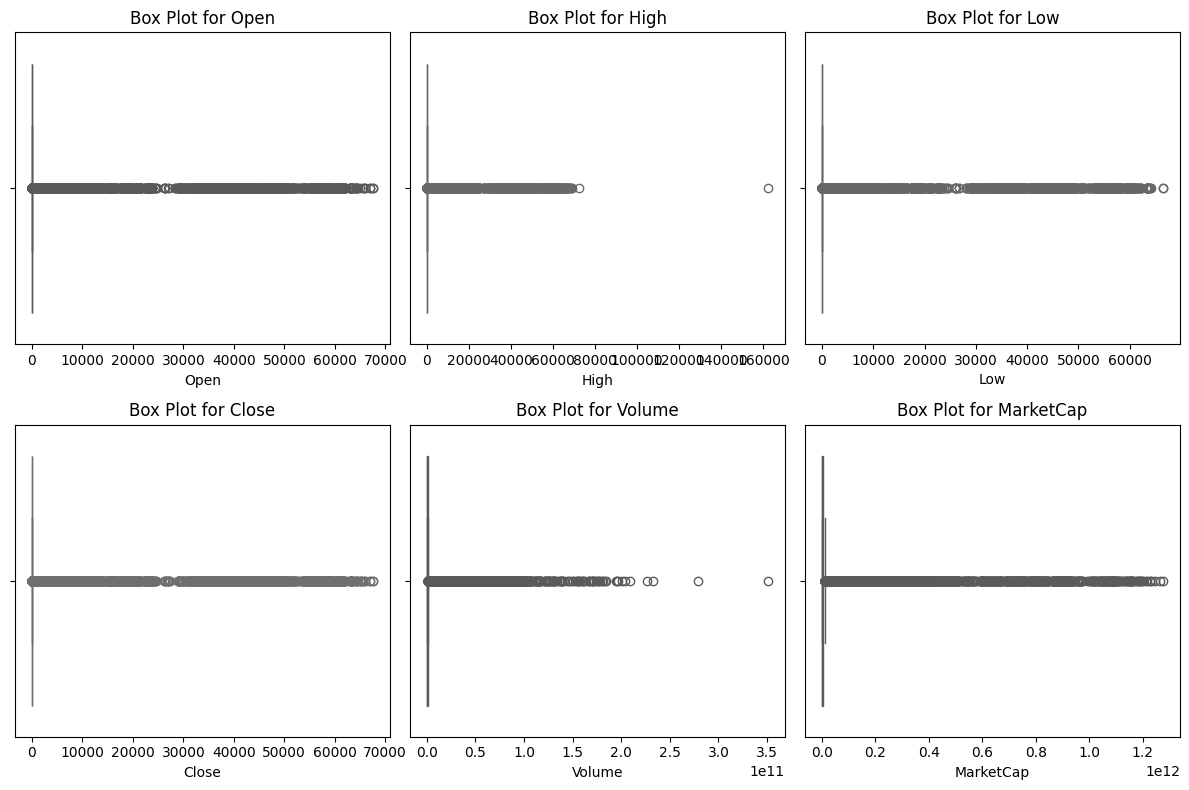

In [27]:
# General analysis of the concat dataset.
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical columns to create box plots for
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'MarketCap']

# Create a color palette with a distinct color for each numerical column
palette = sns.color_palette("Set2", len(numerical_columns))

# Create a figure with subplots in a 2x3 layout
plt.figure(figsize=(12, 8))

# Loop over the numerical columns to create a box plot for each one
for i, column in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)  # i starts at 0, so add 1 for subplot indexing
    sns.boxplot(x=bitcoin_crypto_concat_df[column], color=palette[i])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

### Analysis of the Box plots - General analysis of the concat dataset.

It provides a general overview of the distribution of values in the entire dataset. It analyzes outliers for each numerical column across the entire concatenated dataset without distinguishing between different cryptocurrencies. It treats the dataset as a whole, looking at the distribution of 'Open', 'High', 'Low', 'Close', 'Volume', and 'MarketCap' across all entries.

#### Box Plot Explanations

- **Box Plot for Open:** This plot shows the distribution of the "Open" prices. The "Open" price is the price at which a stock first trades upon the opening of an exchange on a trading day.

- **Box Plot for High:** This visualizes the distribution of the "High" prices, which represent the highest price at which a stock traded during the course of the day.

- **Box Plot for Low:** This displays the "Low" prices distribution, indicating the lowest price at which a stock traded during the day.

- **Box Plot for Close:** This plot represents the distribution of "Close" prices, the price at which a stock last traded during a regular trading day.

- **Box Plot for Volume:** This shows how the trading volume is distributed. Trading volume represents the total number of shares or contracts traded for a particular security.

- **Box Plot for MarketCap:** This illustrates the distribution of the market capitalization values. Market capitalization is the total market value of a company's outstanding shares of stock.

For each box plot, the central tendency is indicated by the line within the box, which is the median. The box represents the middle 50% of the data, which is the interquartile range (between the 25th and 75th percentile). The whiskers extend to the rest of the distribution, except for points that are determined to be outliers, which are plotted as individual points.

**Observations from the plots suggest that:**

- The distributions for "Open," "High," "Low," and "Close" seem to be very similar, with the median close to the lower end of the data range, indicating a skewed distribution. In practical terms, this suggests that for these financial price variables ('Open,' 'High,' 'Low,' and 'Close'), there may be occasional extremely high values (outliers) that are driving the median higher, but the majority of the data points are concentrated in the lower price range.

- The "Volume" and "MarketCap" plots show a different scale, suggesting different units or magnitudes of data. The distribution of "Volume" is also skewed with the median closer to the lower end of the range.

- There are outliers present in all the plots, seen as individual points beyond the whiskers.

**Decision why Not handle the Outliers:**

- The objective of this assignment is to provide knowledge in time series. To handle these outliers, it is important to understand the financial market, and what happened during the period the cryptocurrencies were analyzed that made the prices fluctuate. In financial datasets, what might appear as an outlier could be the result of significant market events, such as a company's breakthrough product launch, a market crash, or regulatory changes affecting the industry. In summary, some outliers are essential to the analysis because they may represent critical market movements.

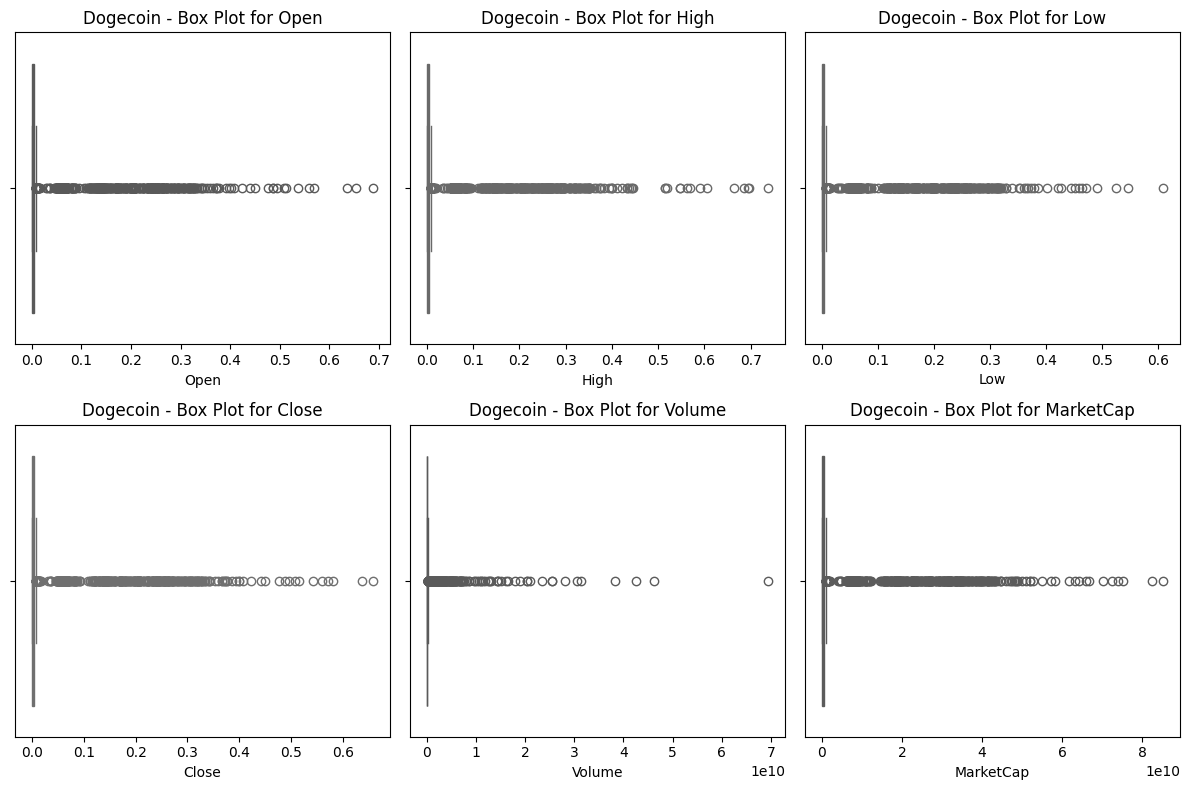

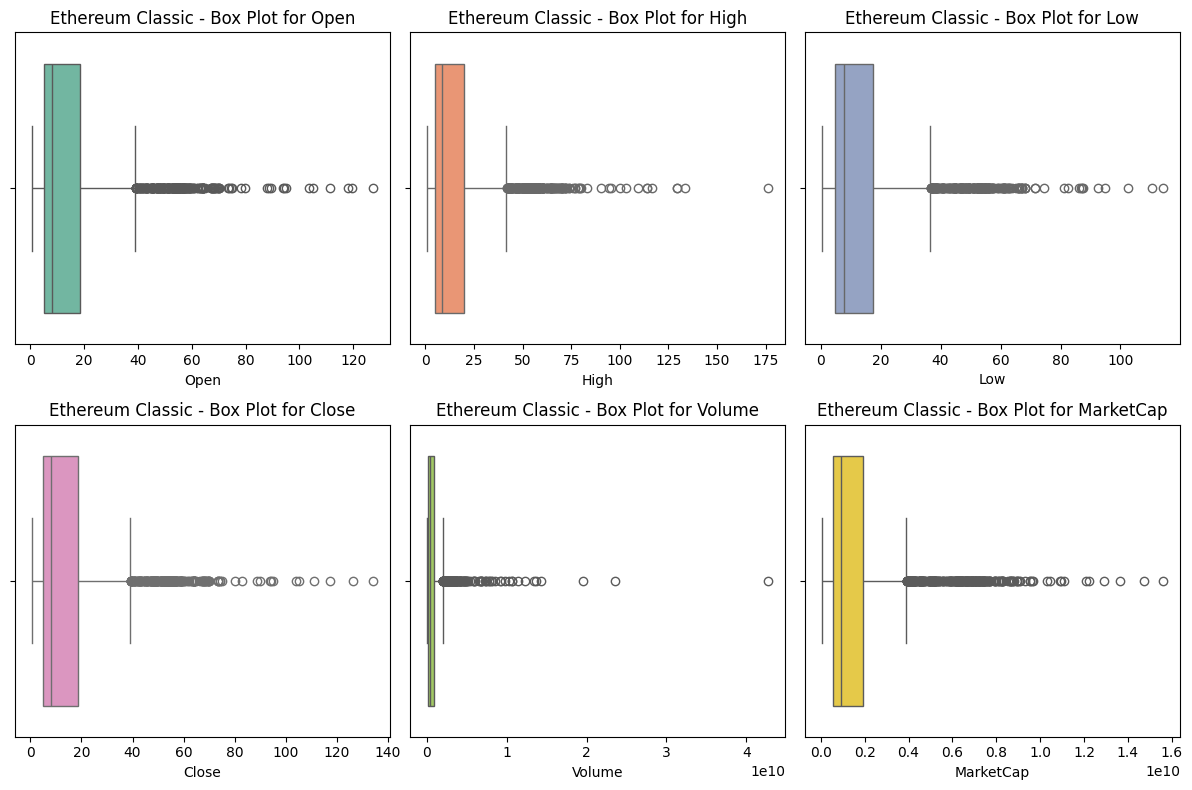

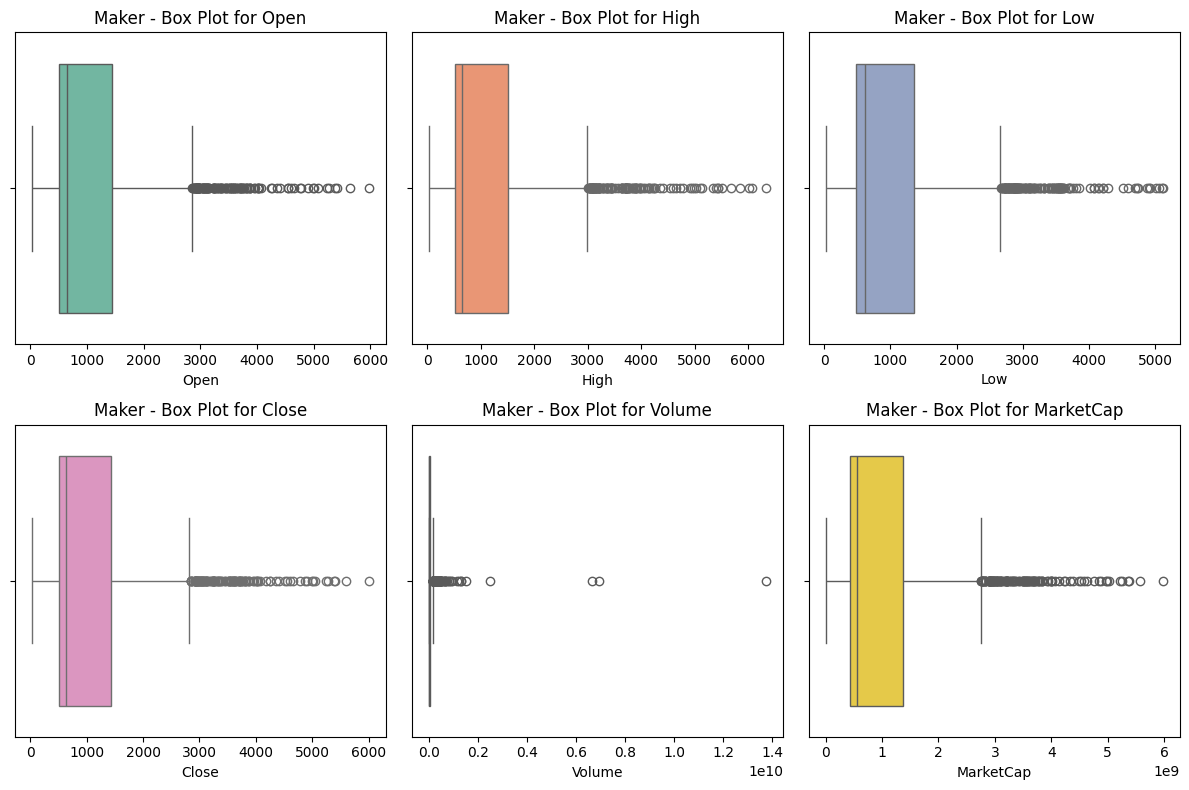

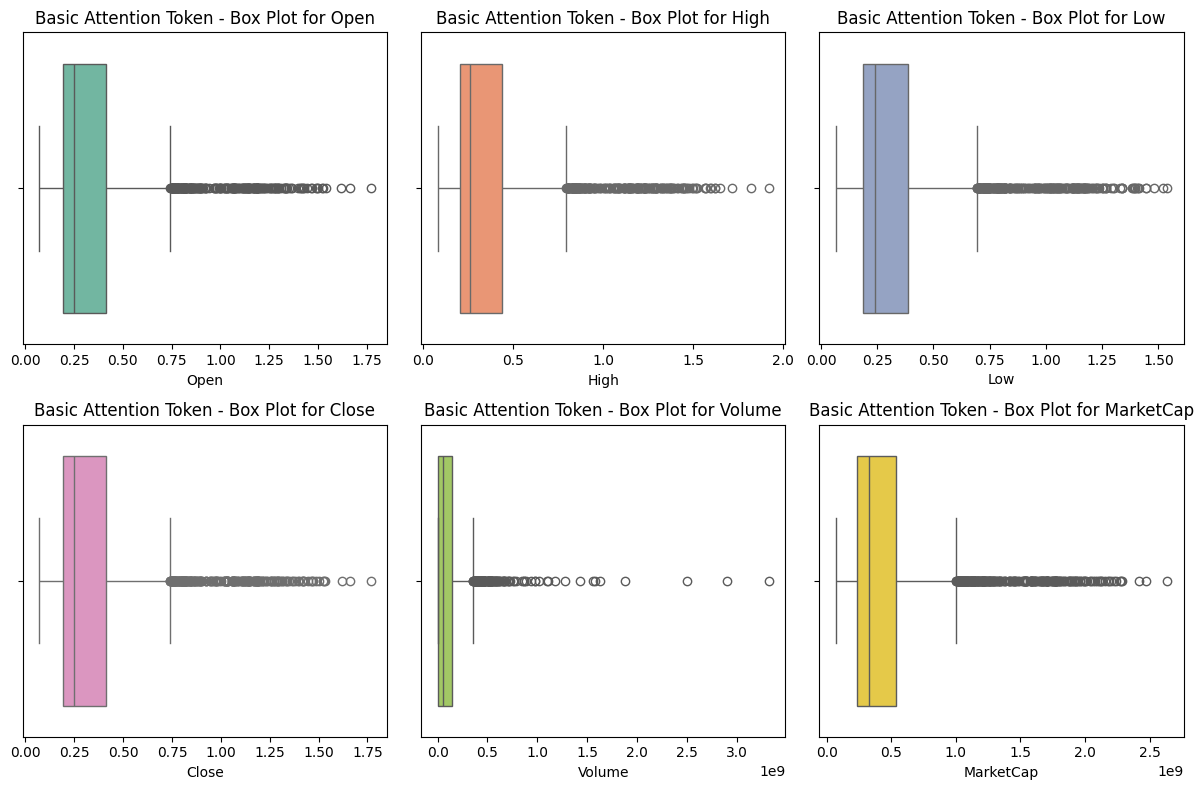

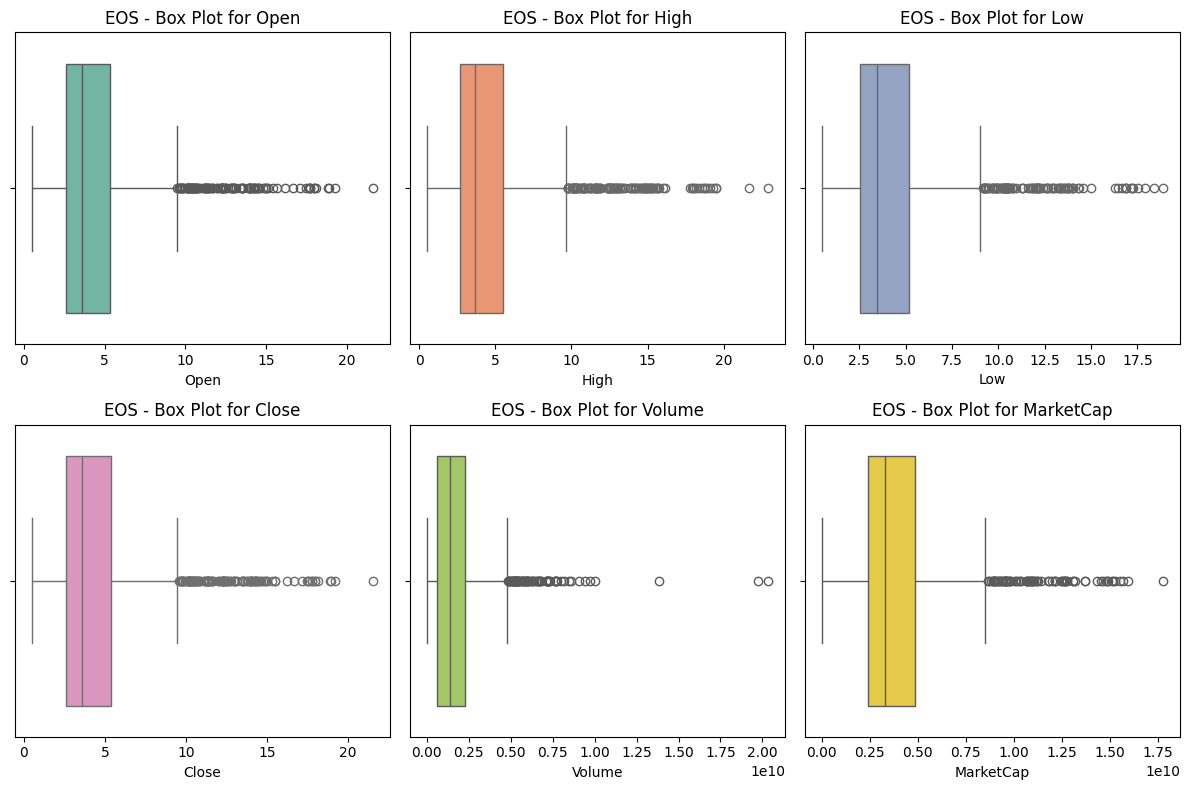

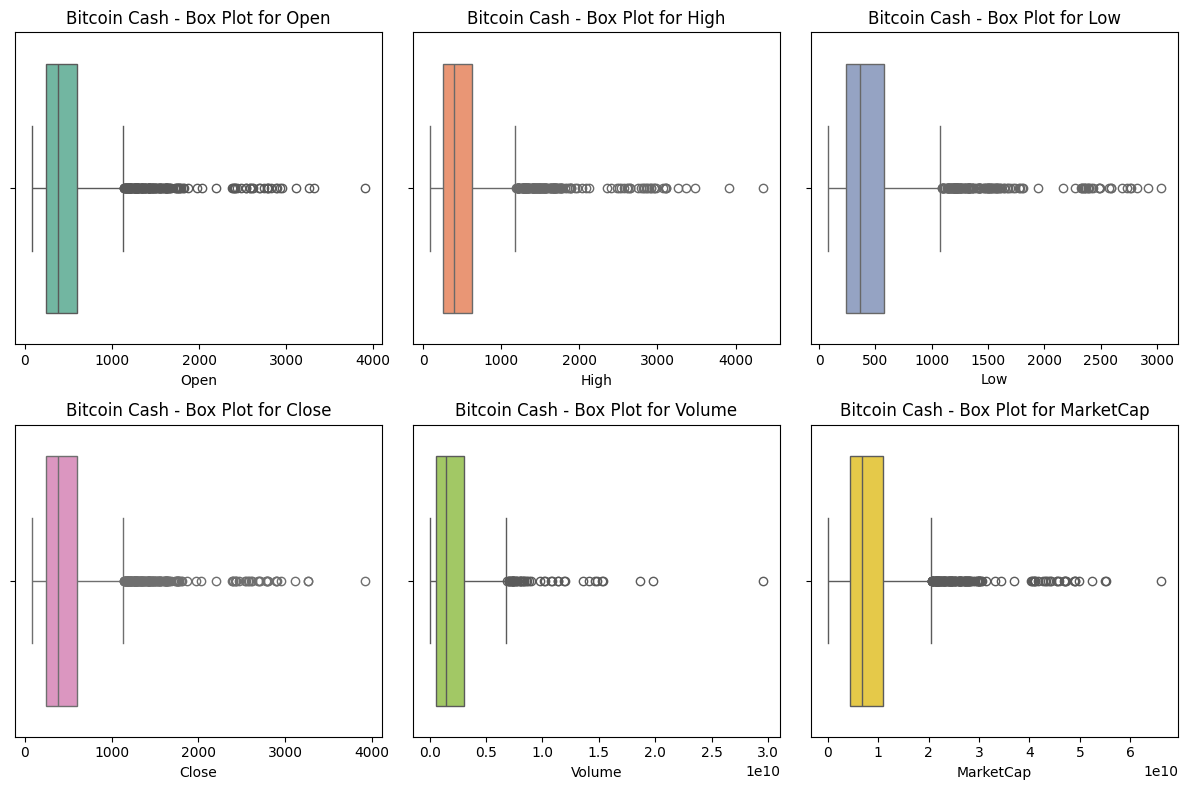

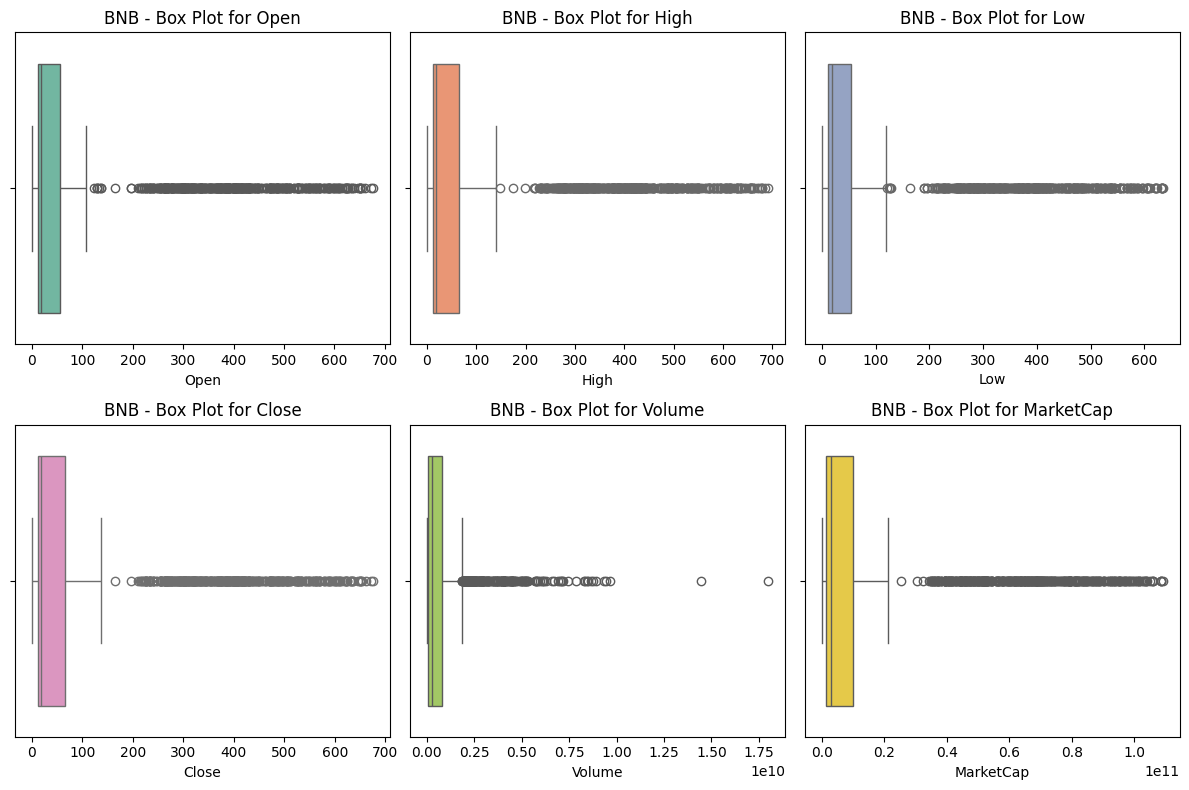

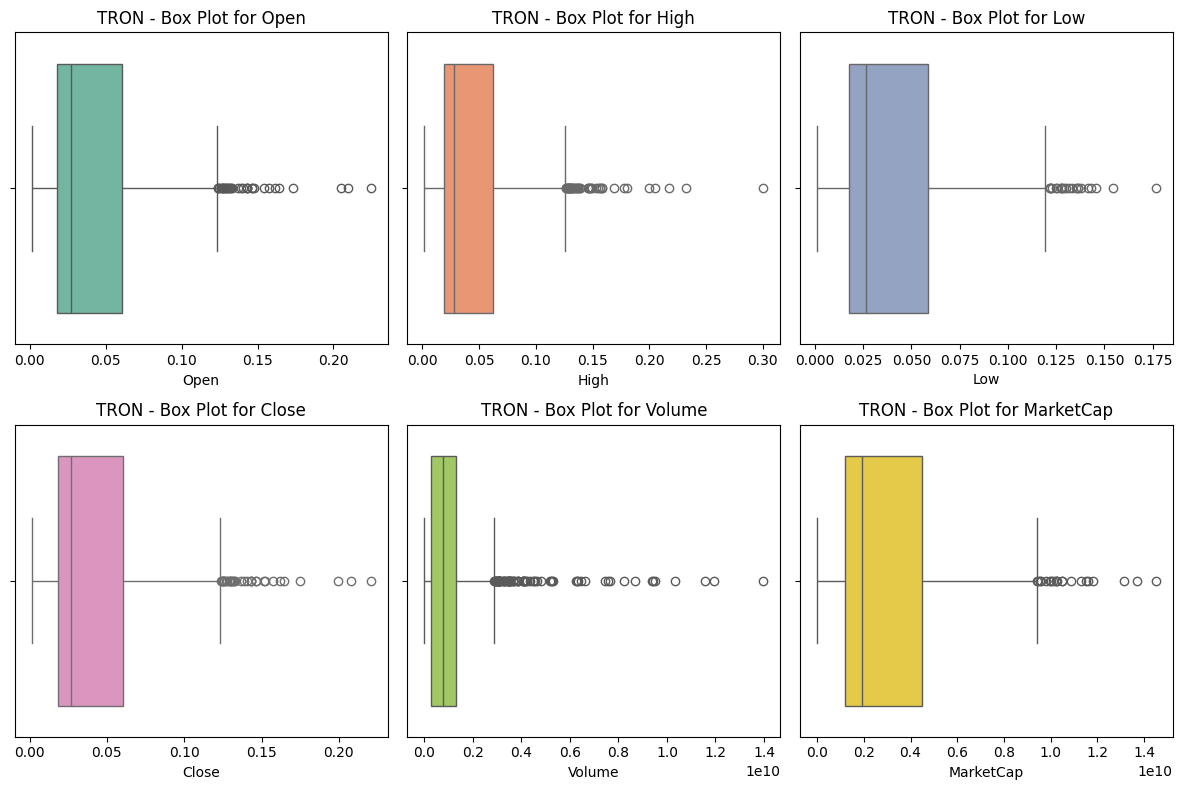

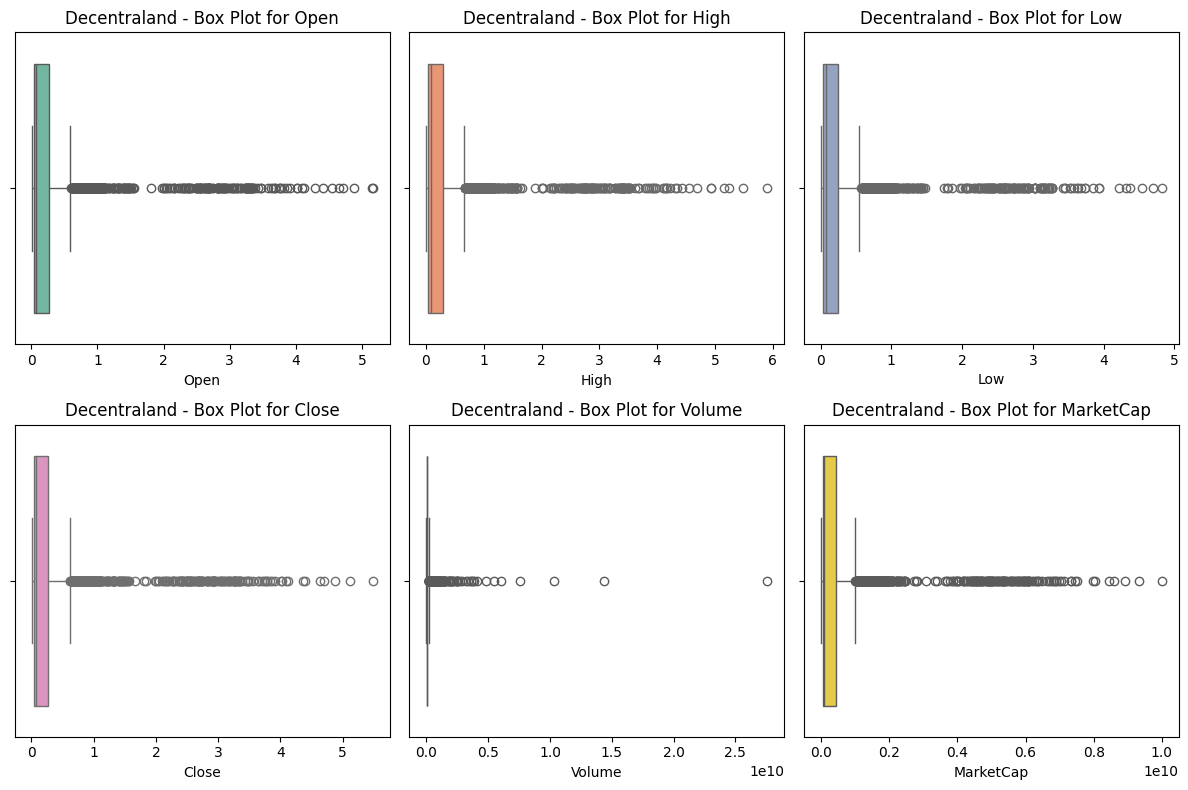

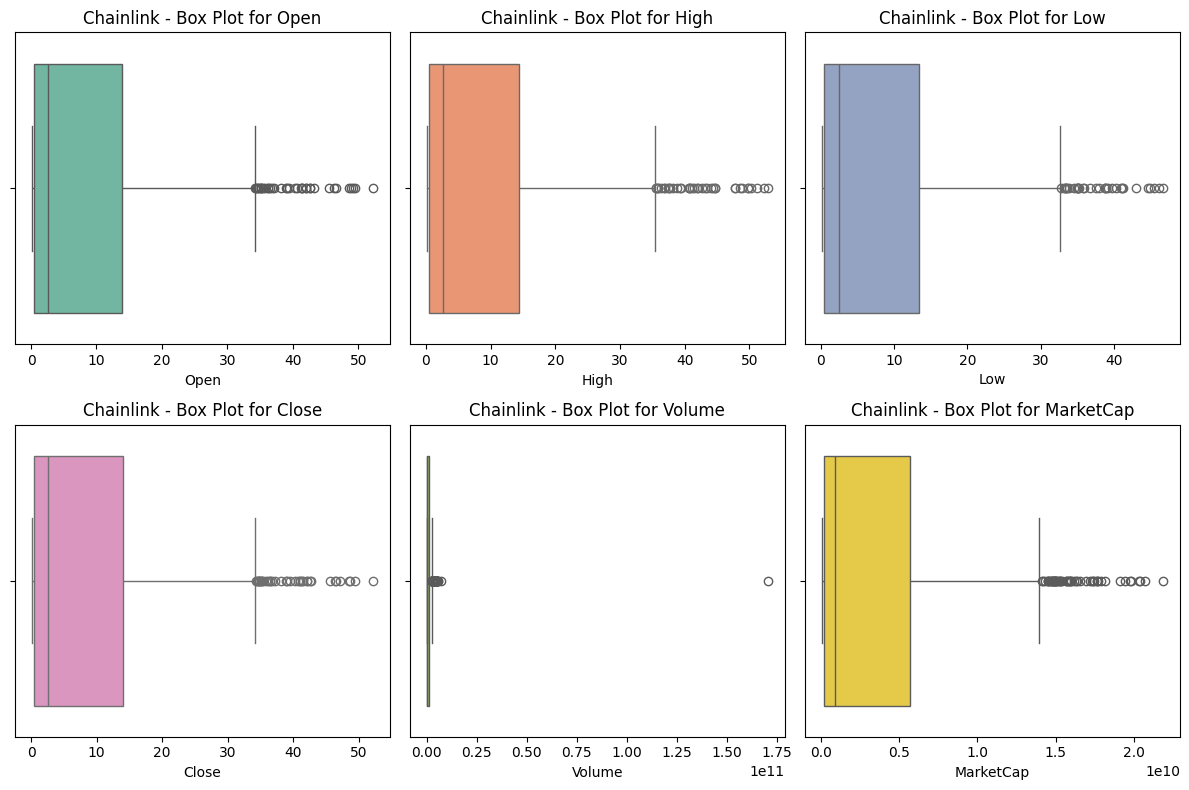

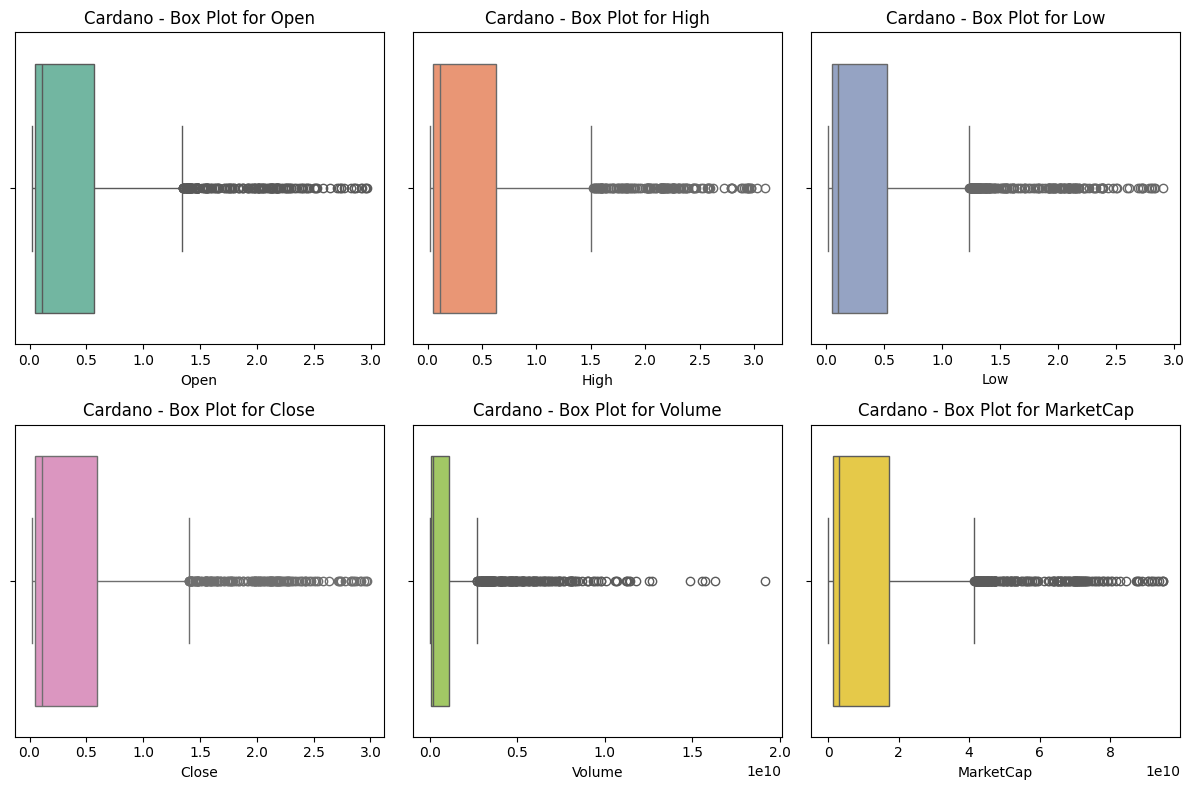

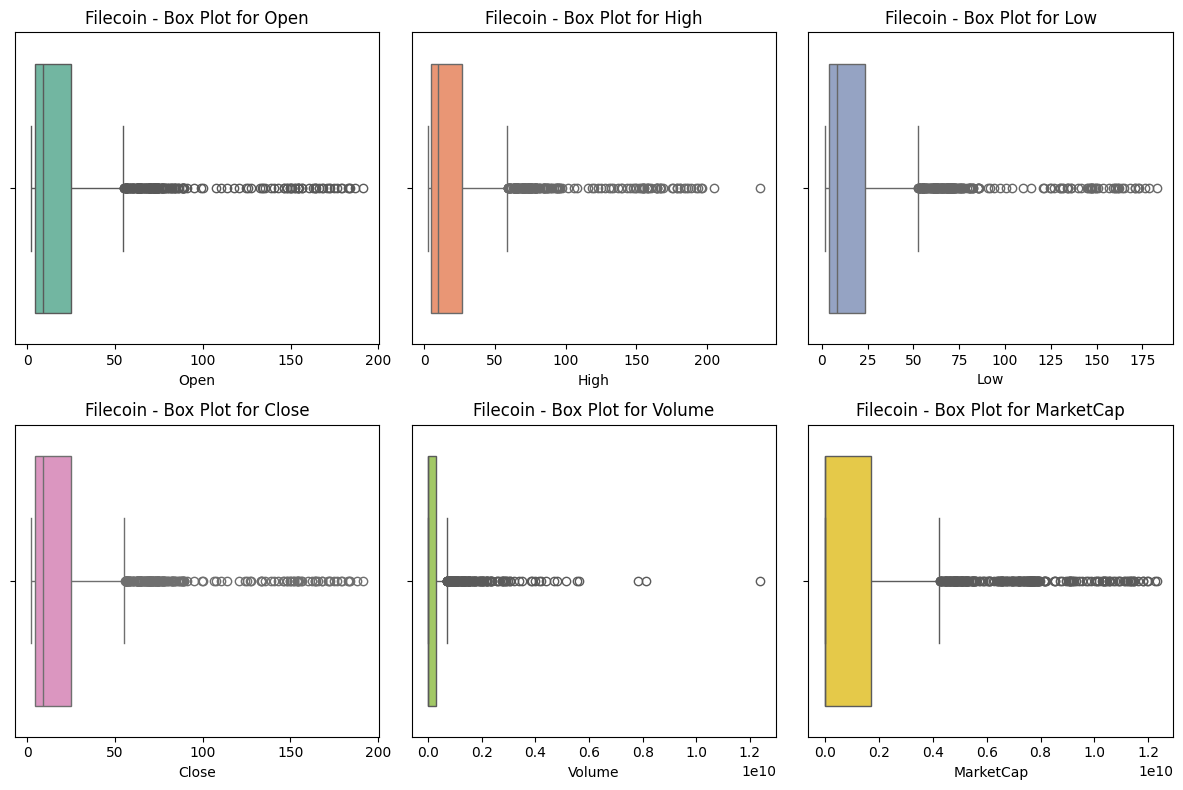

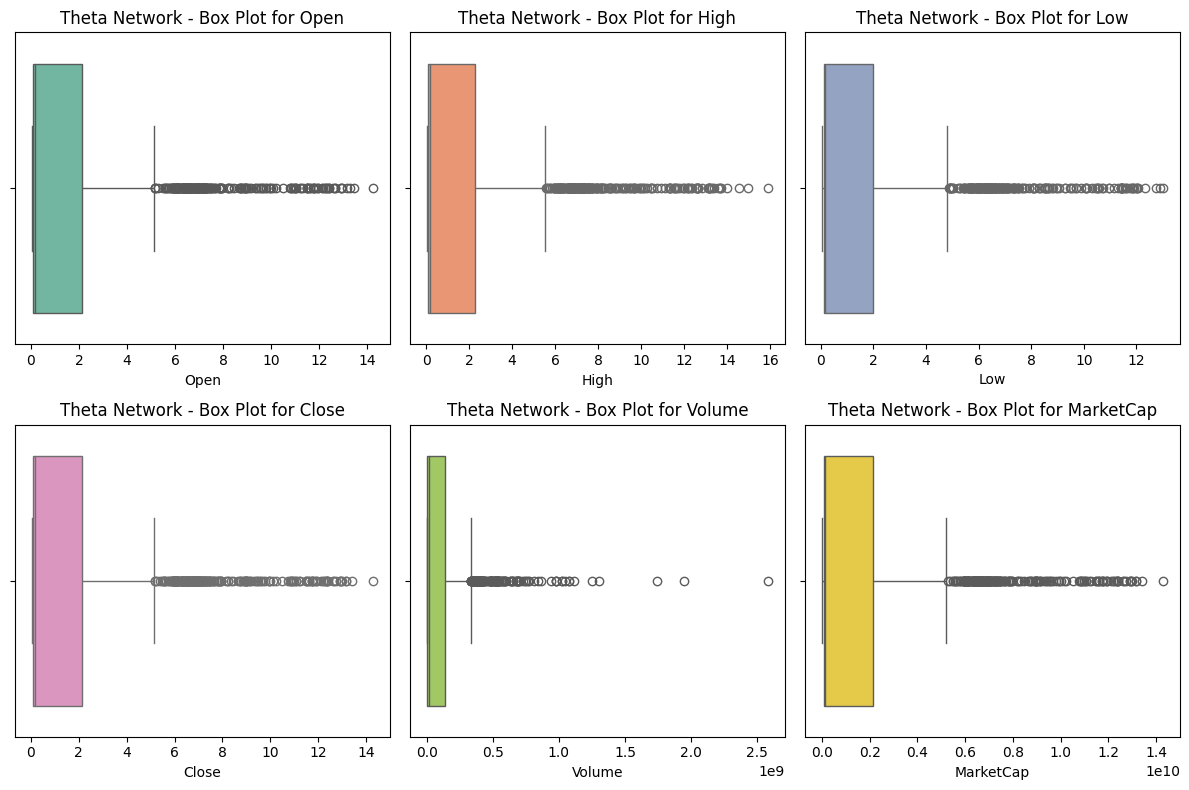

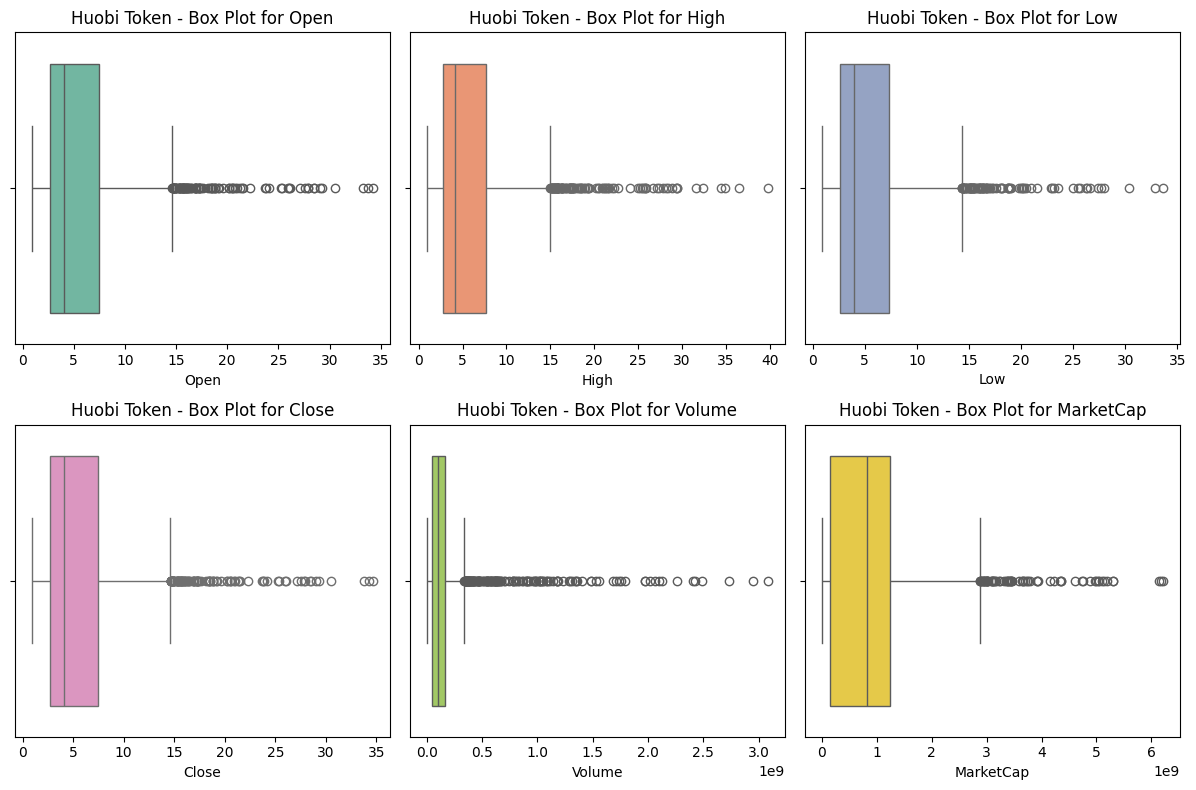

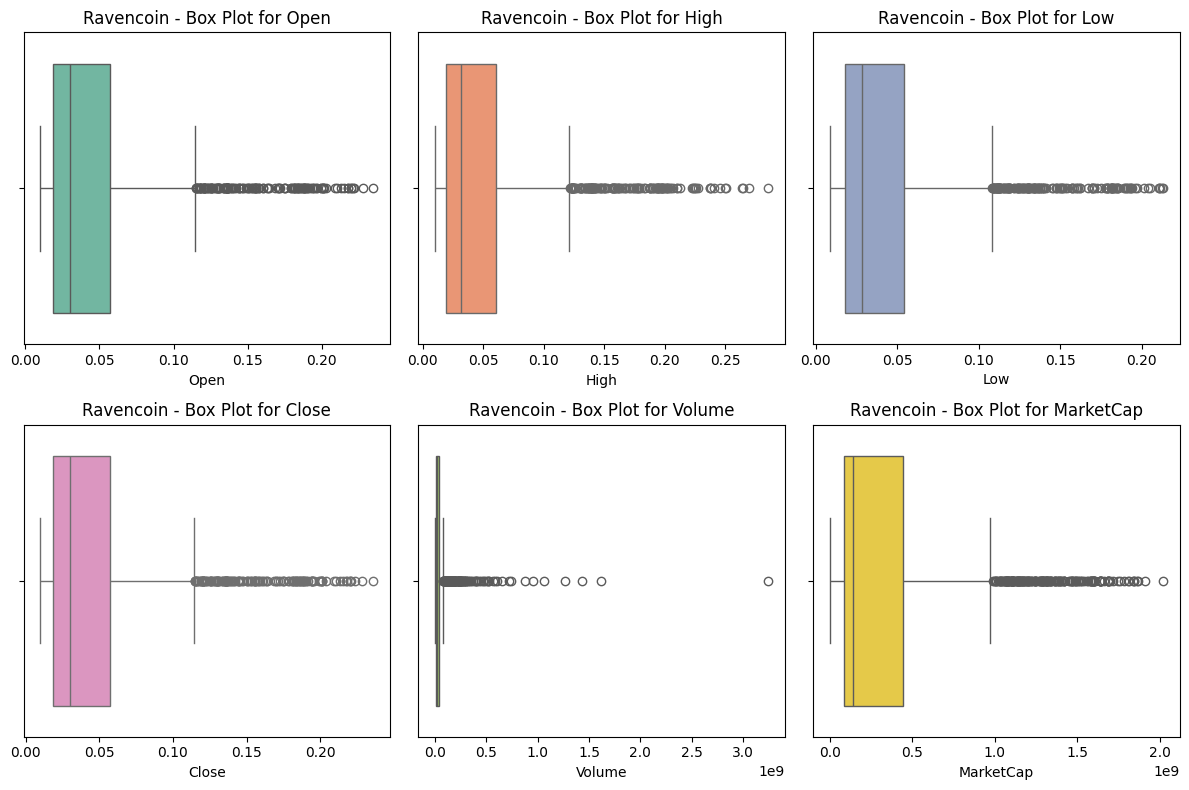

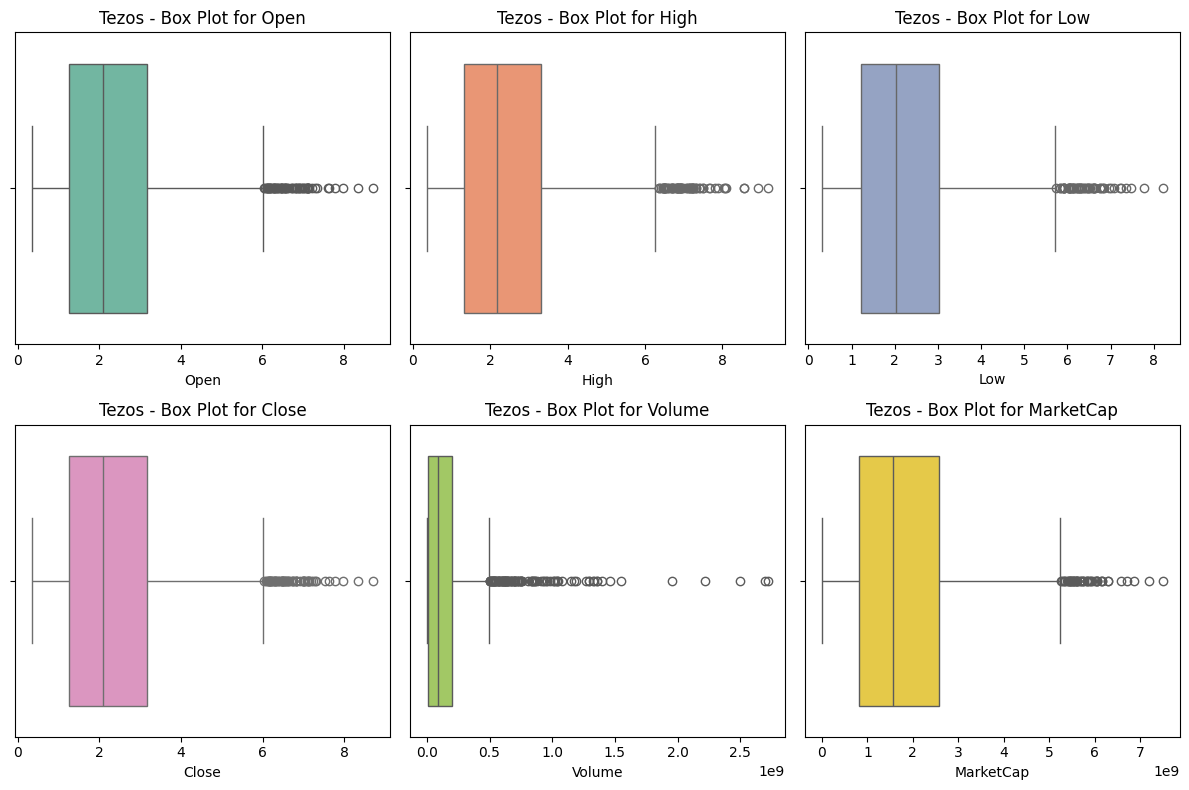

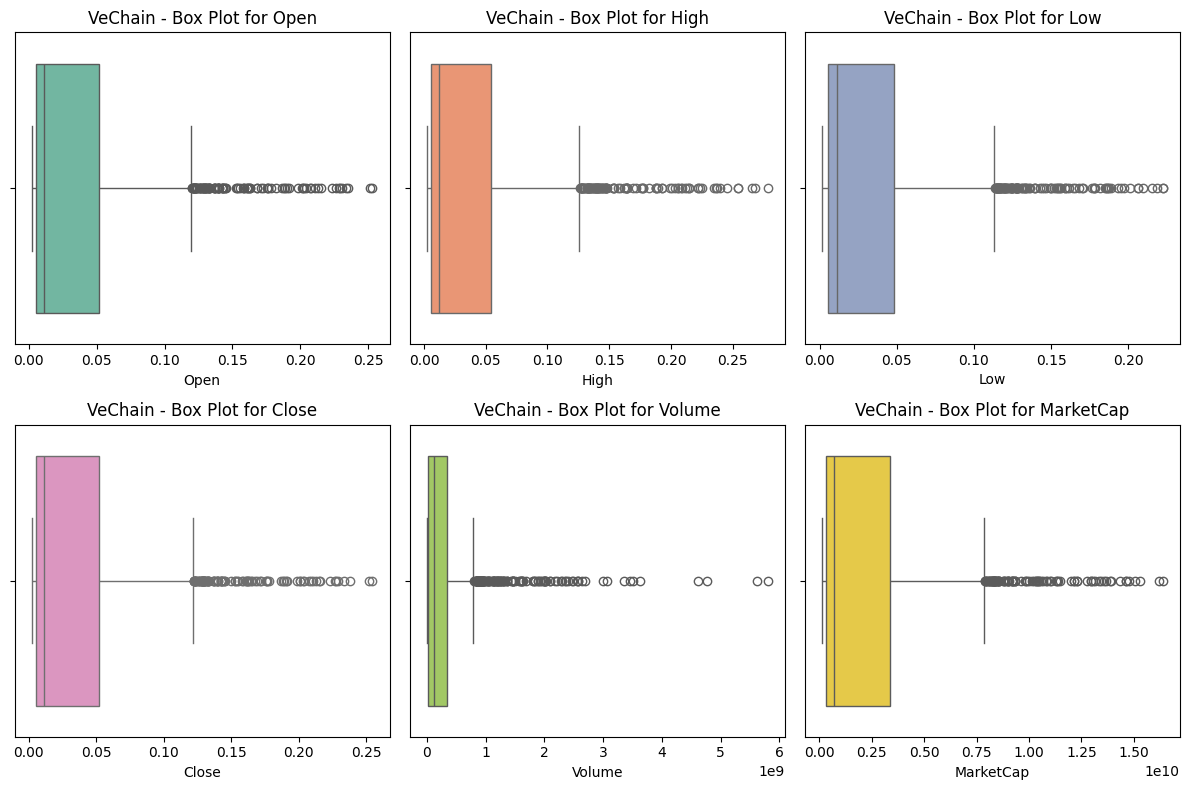

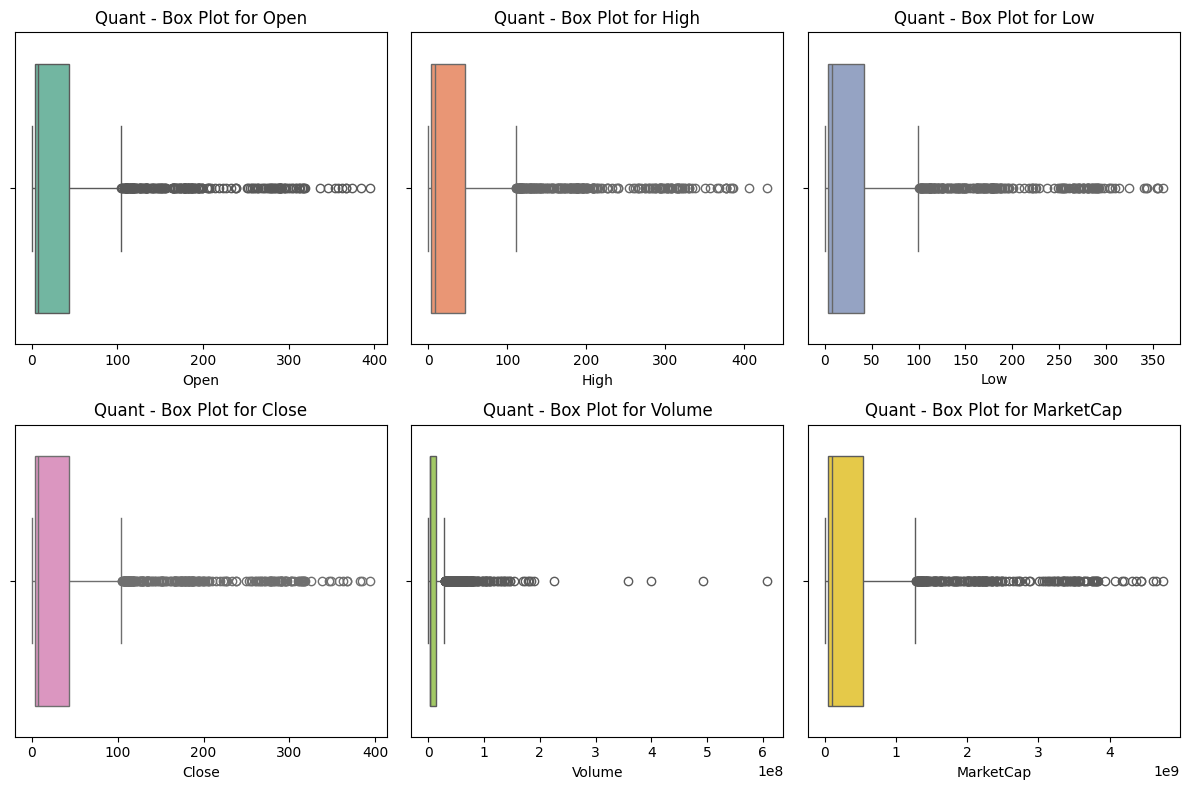

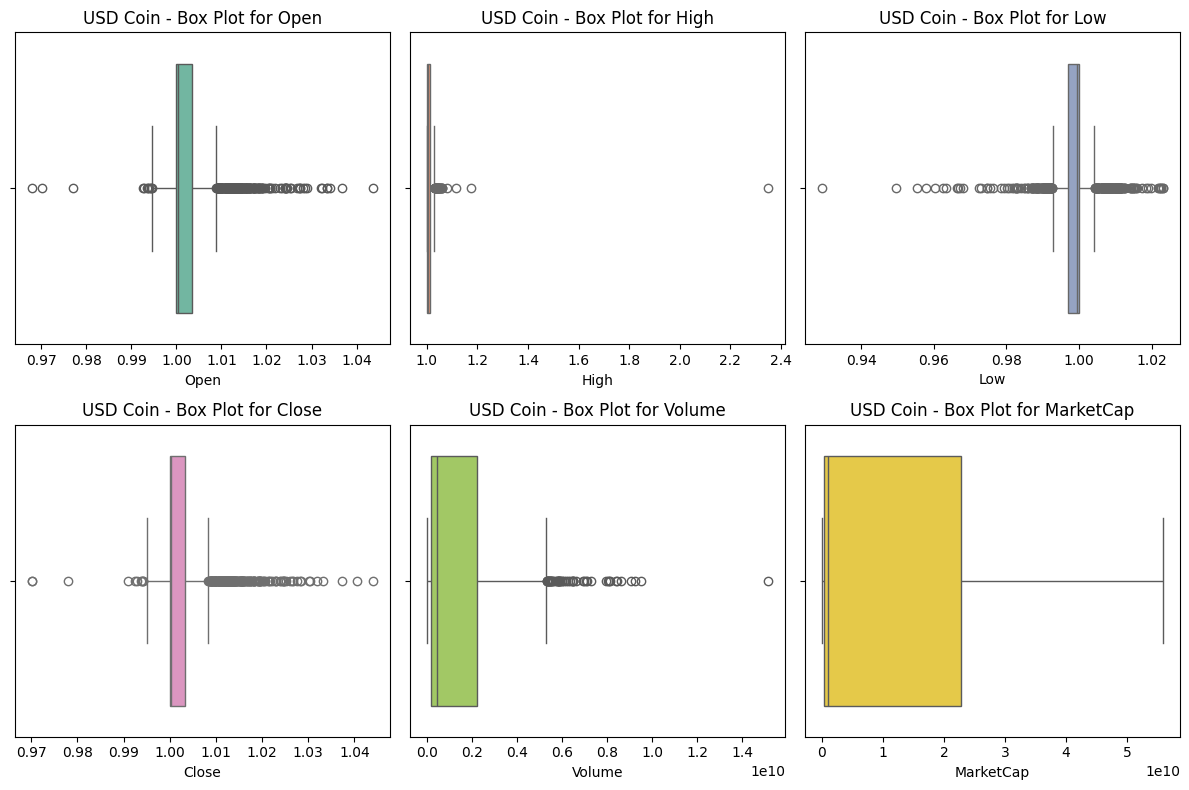

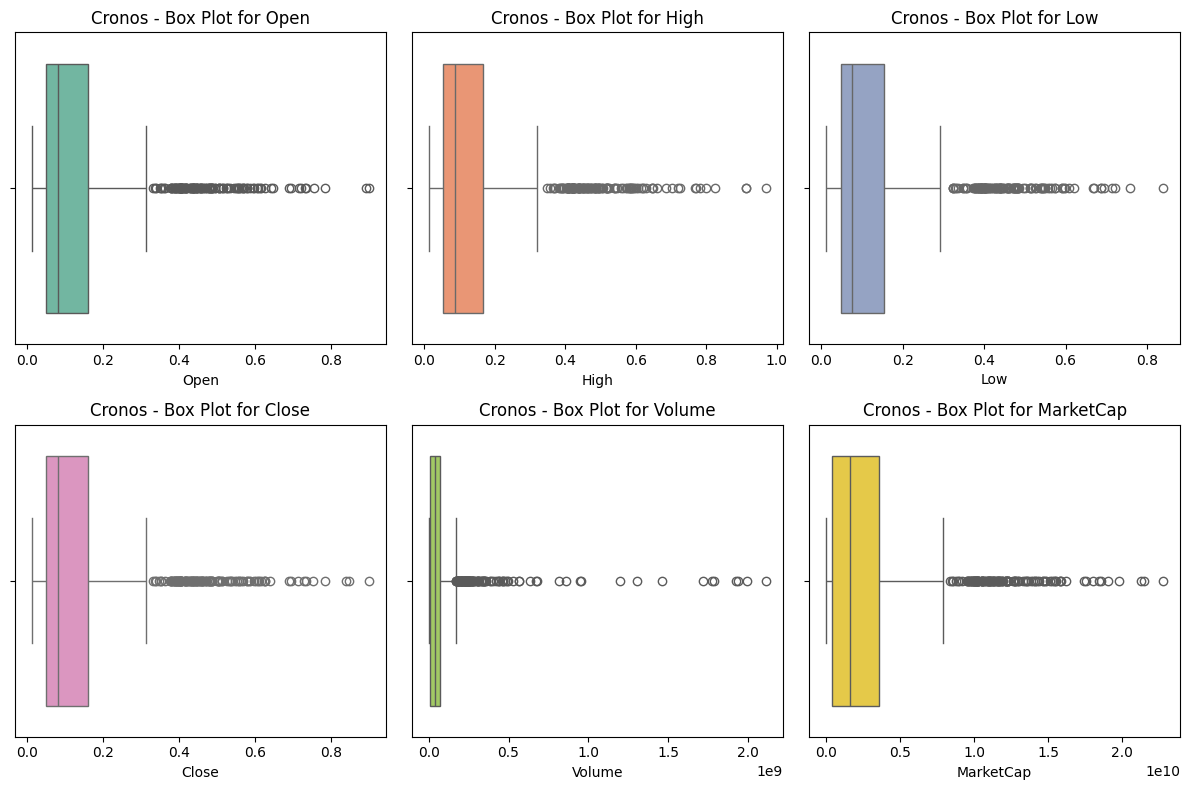

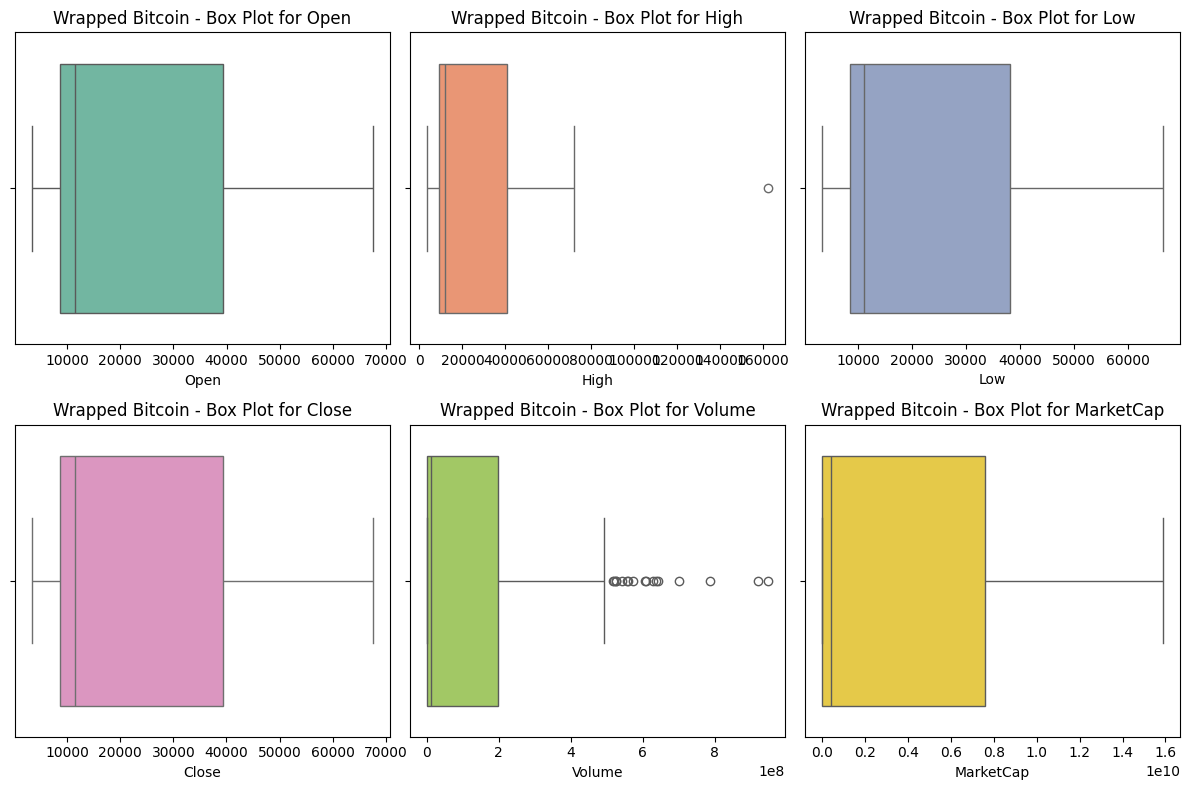

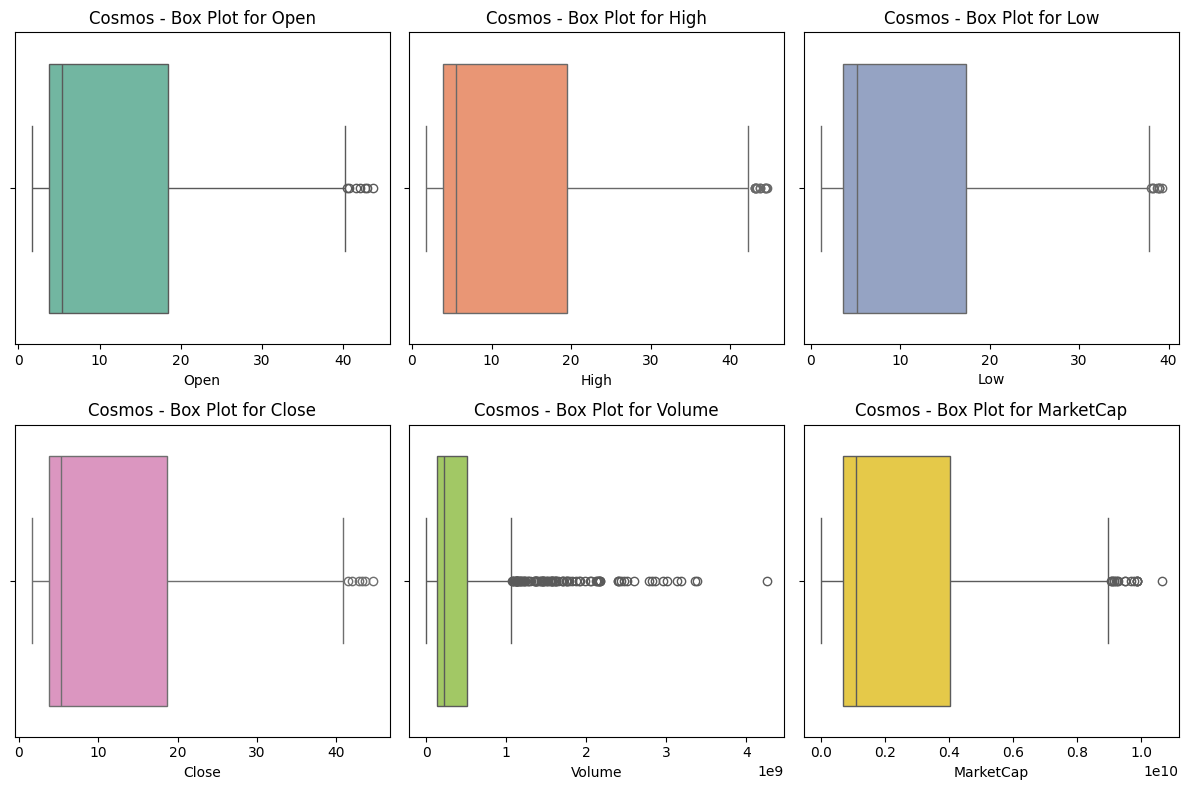

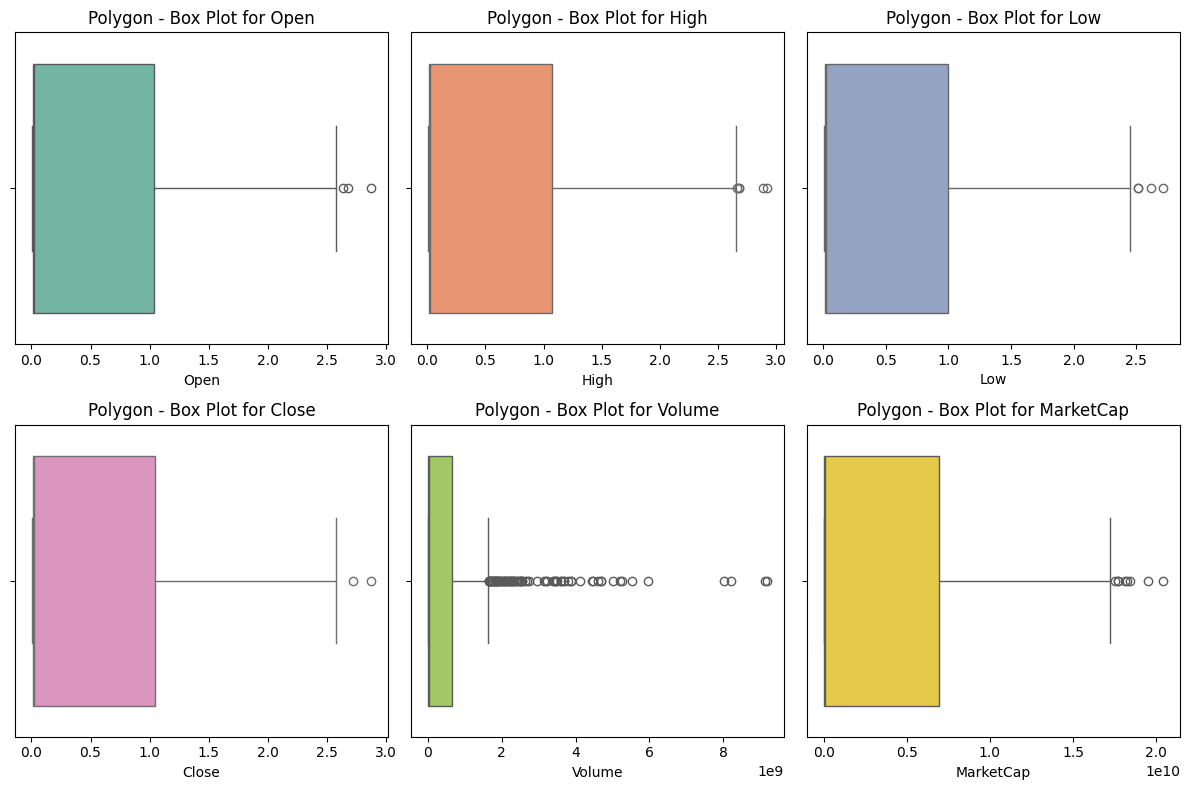

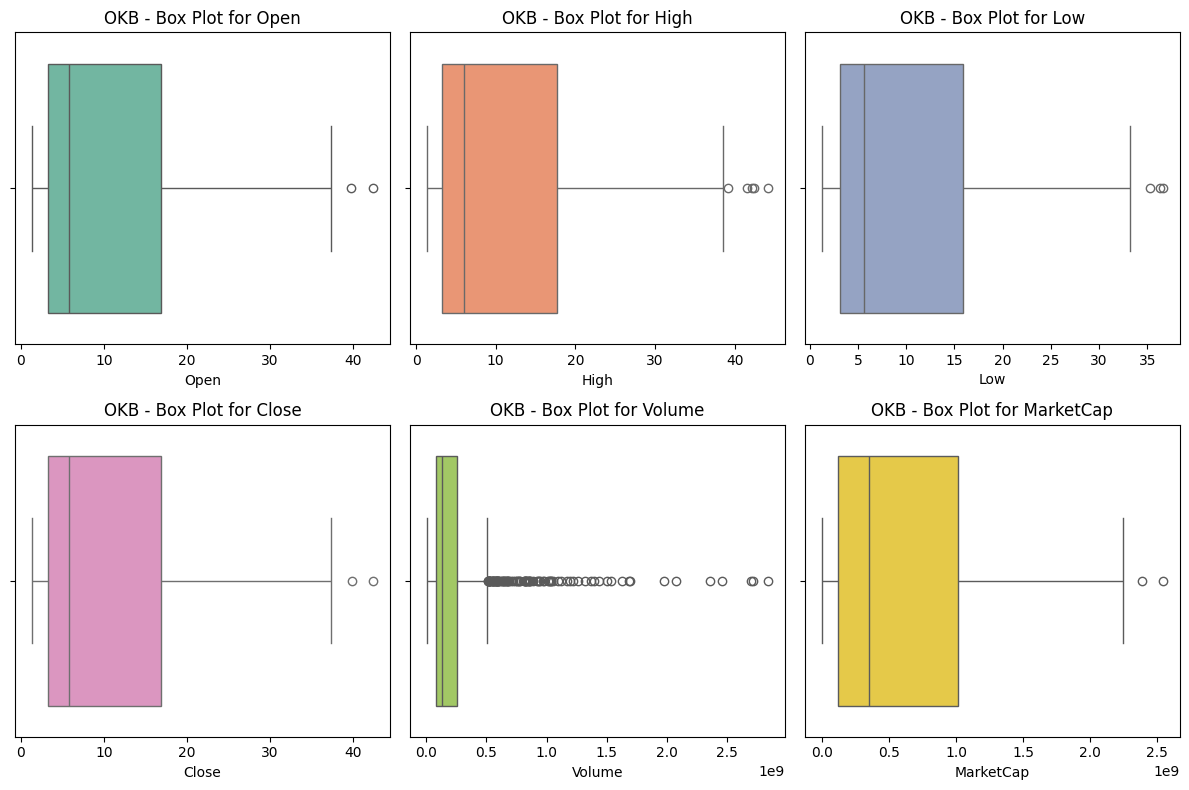

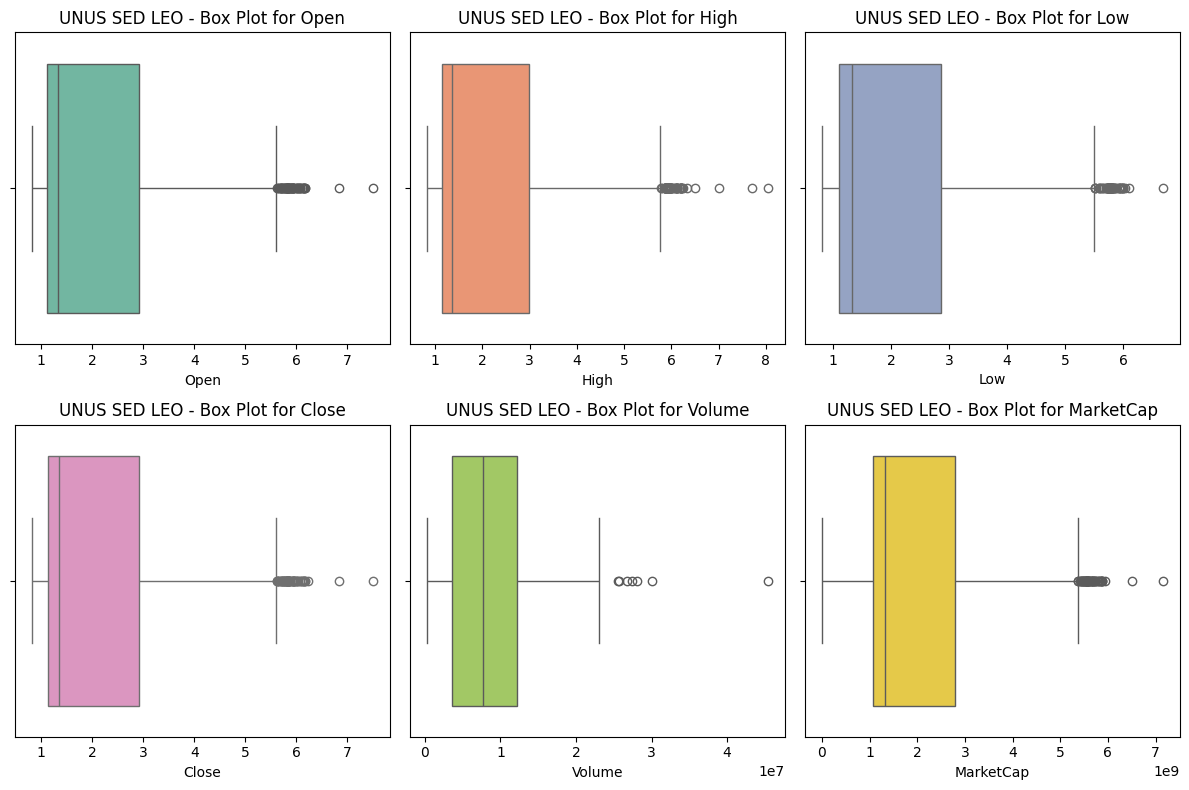

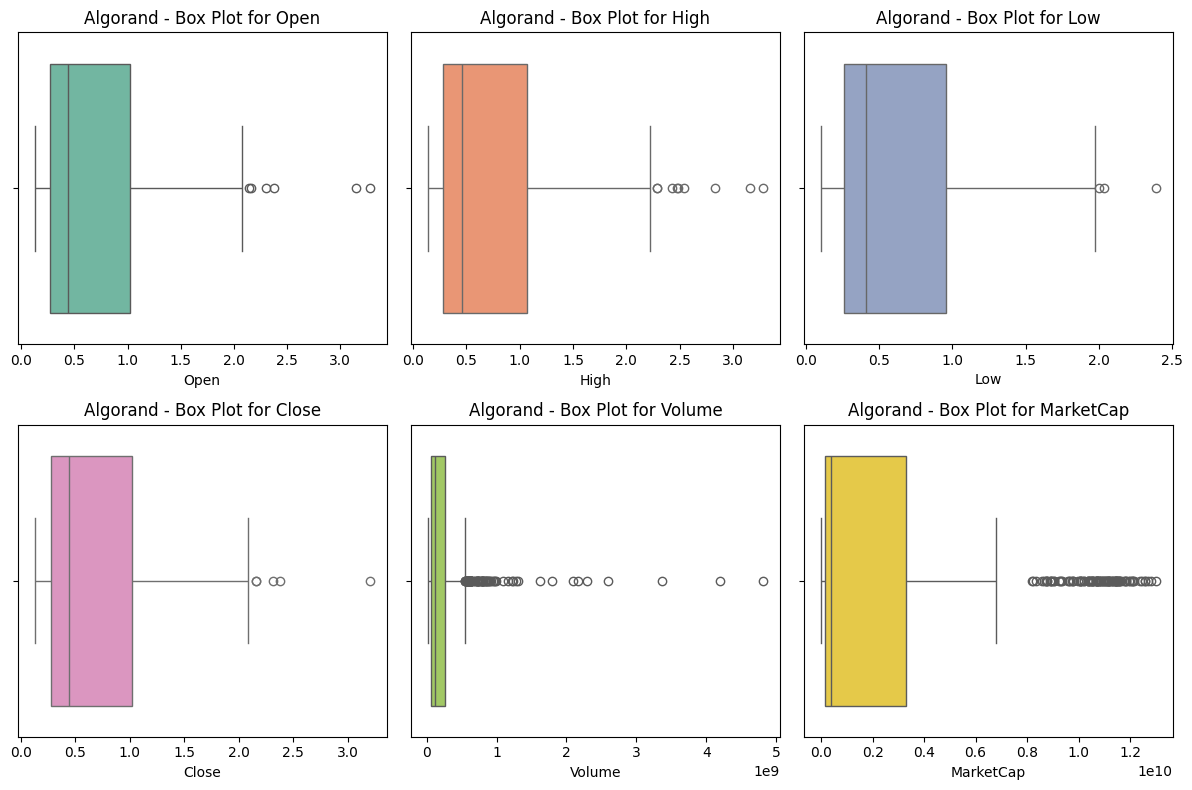

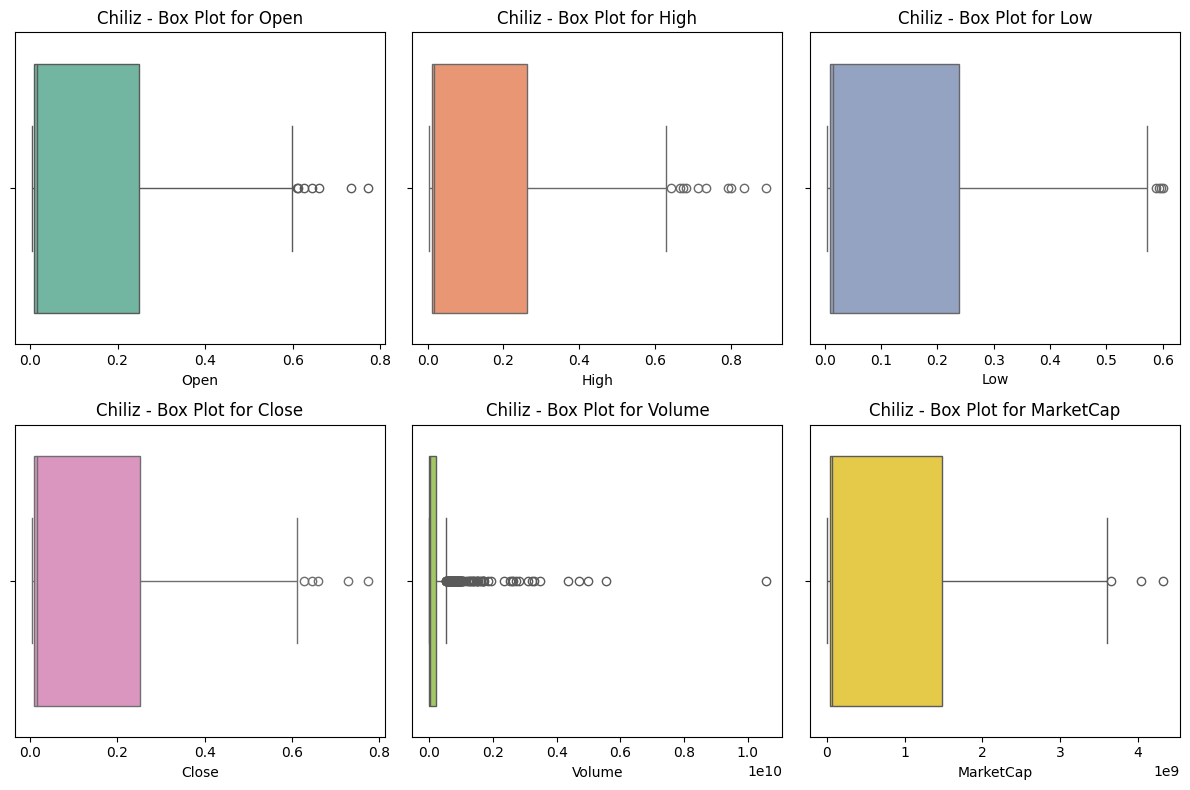

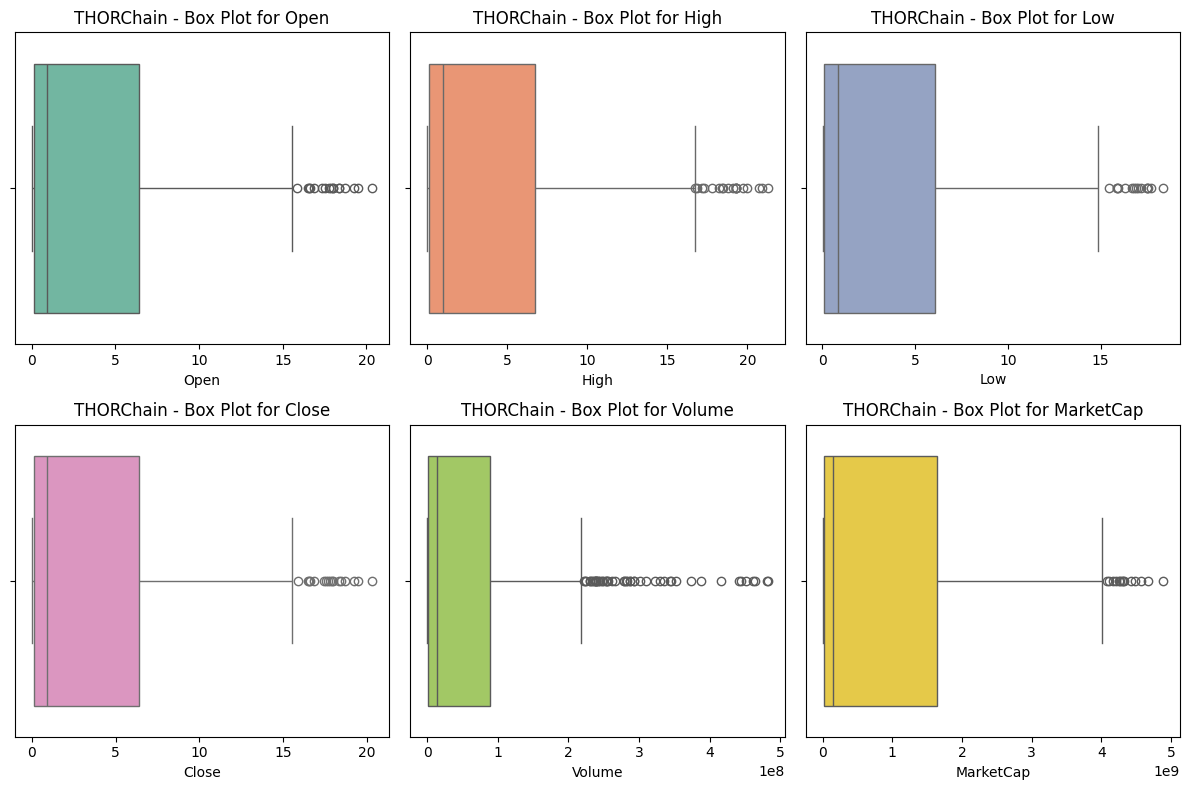

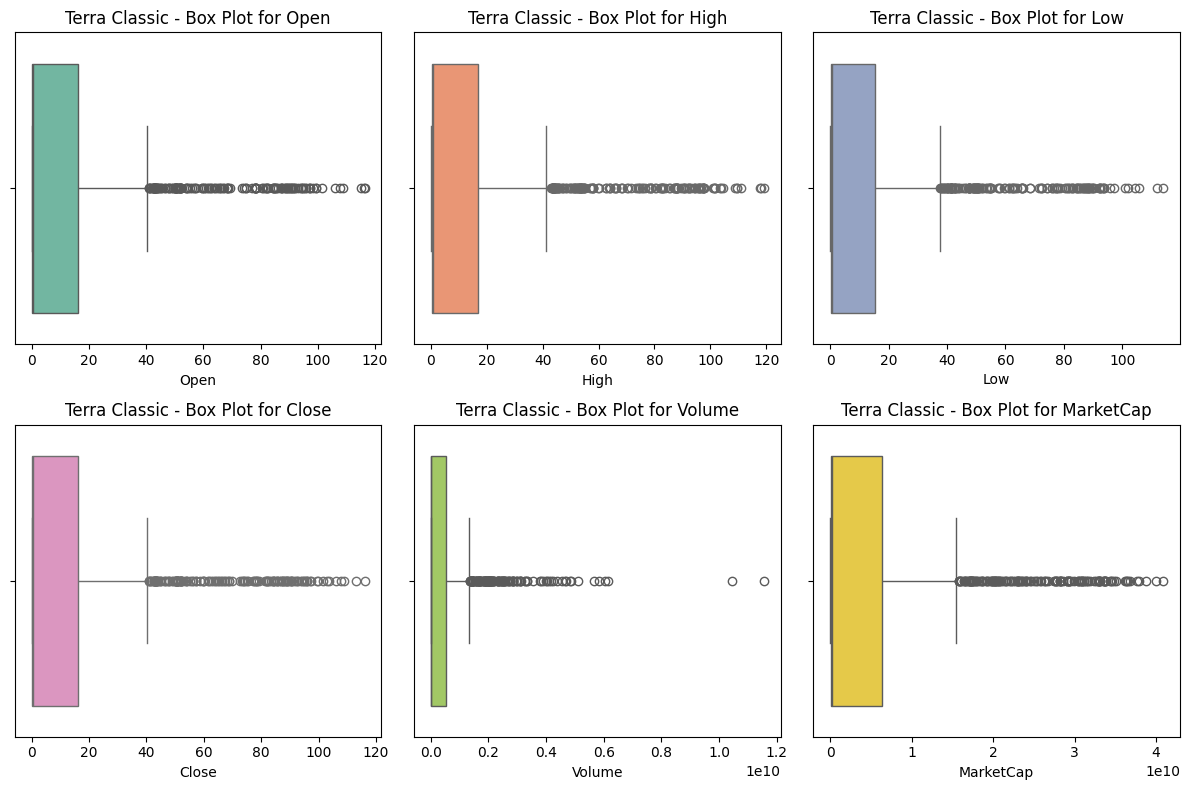

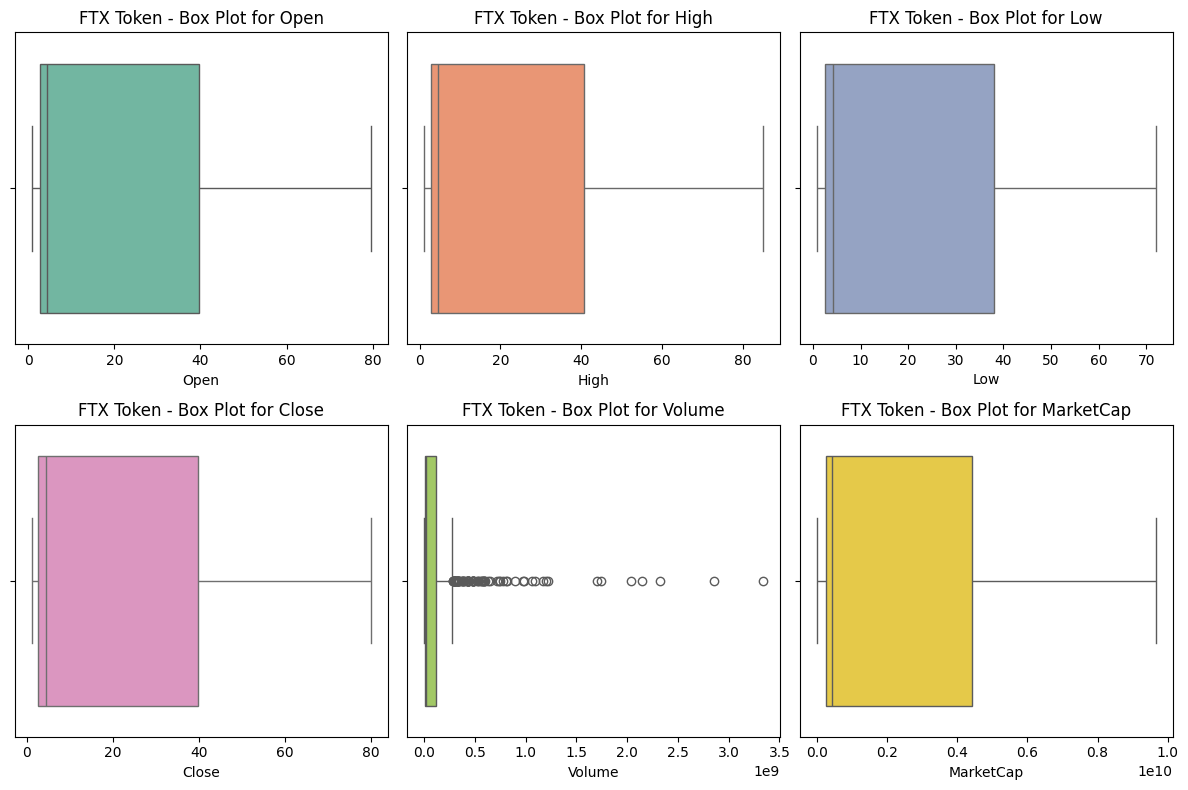

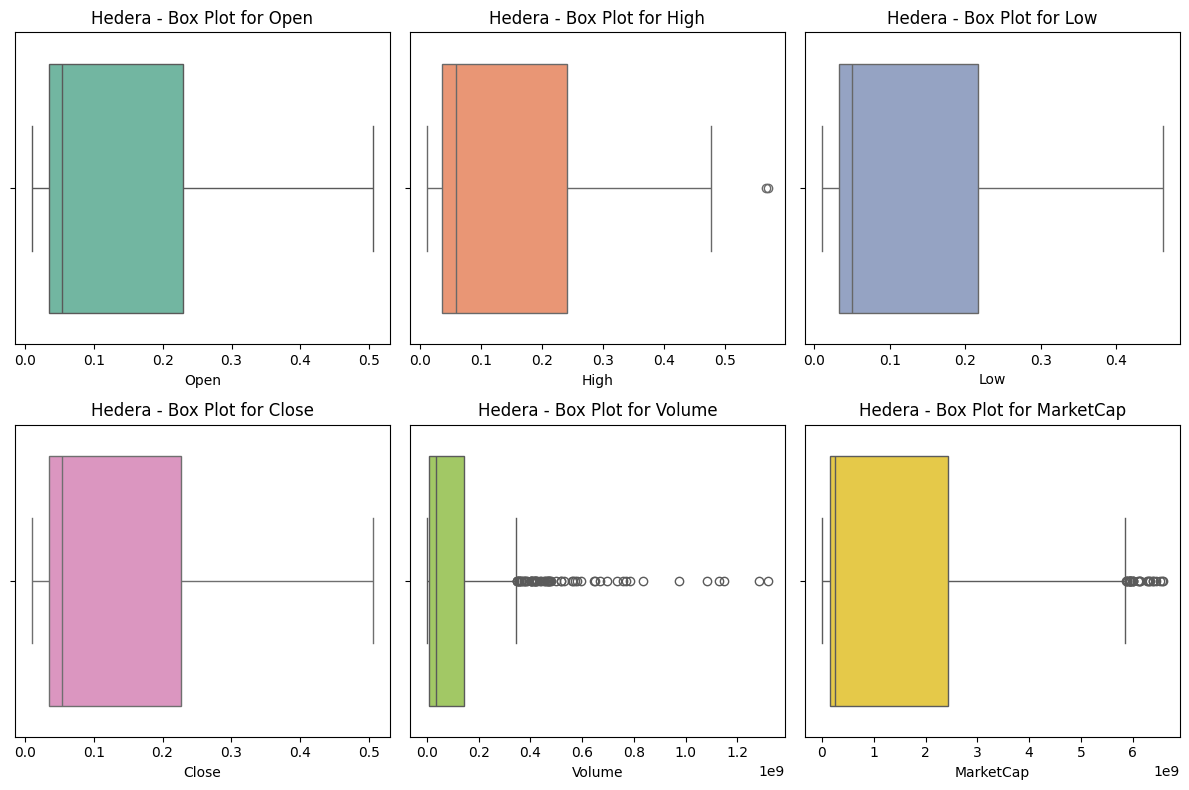

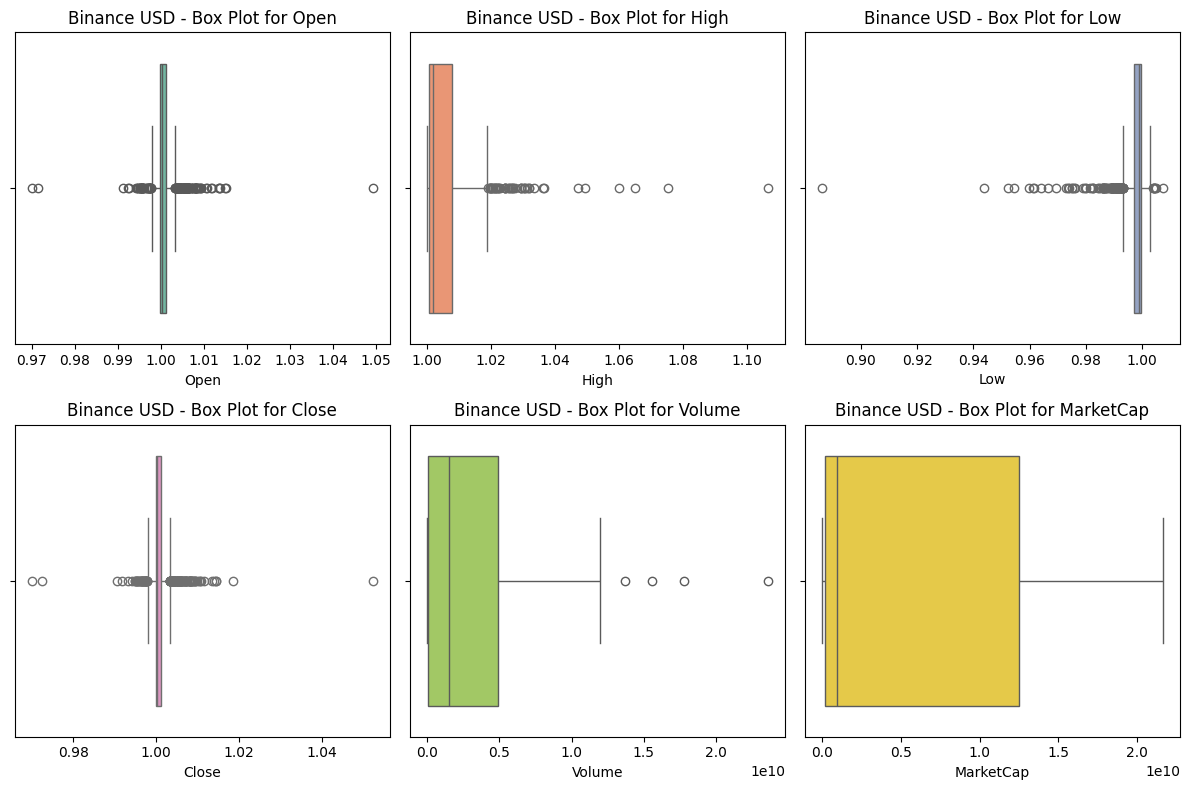

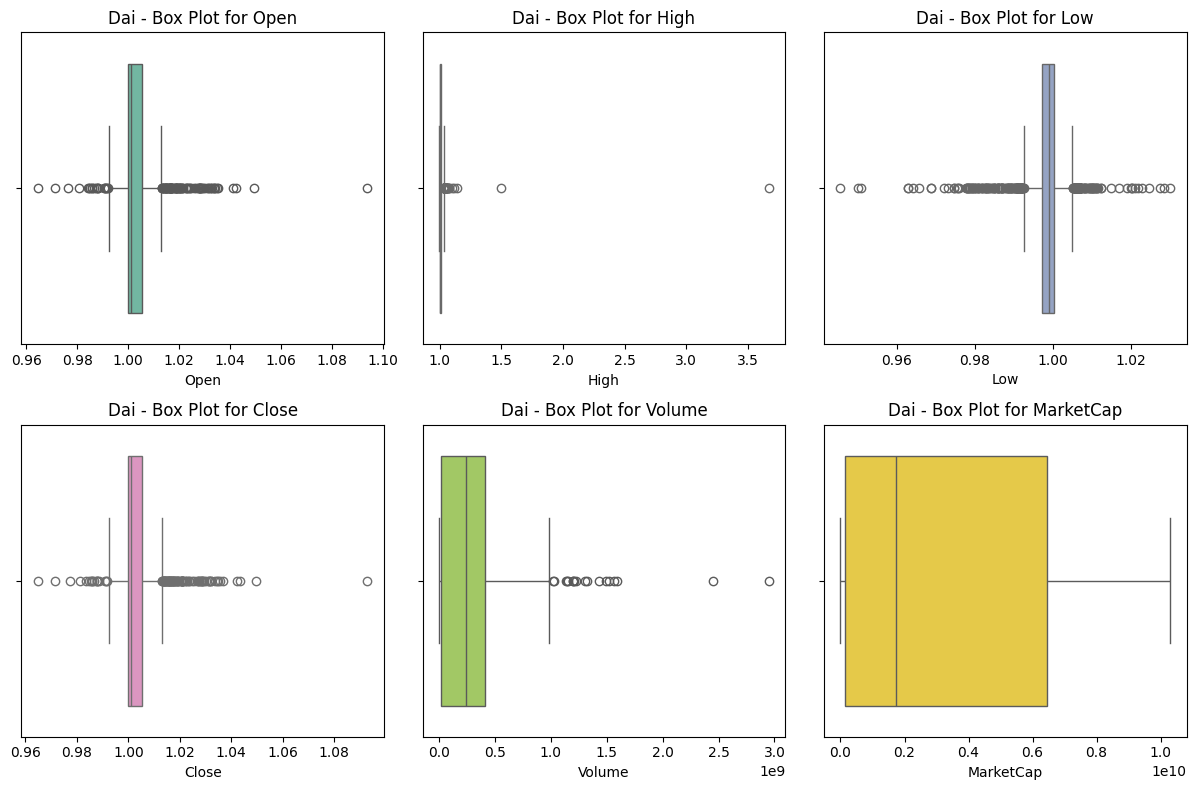

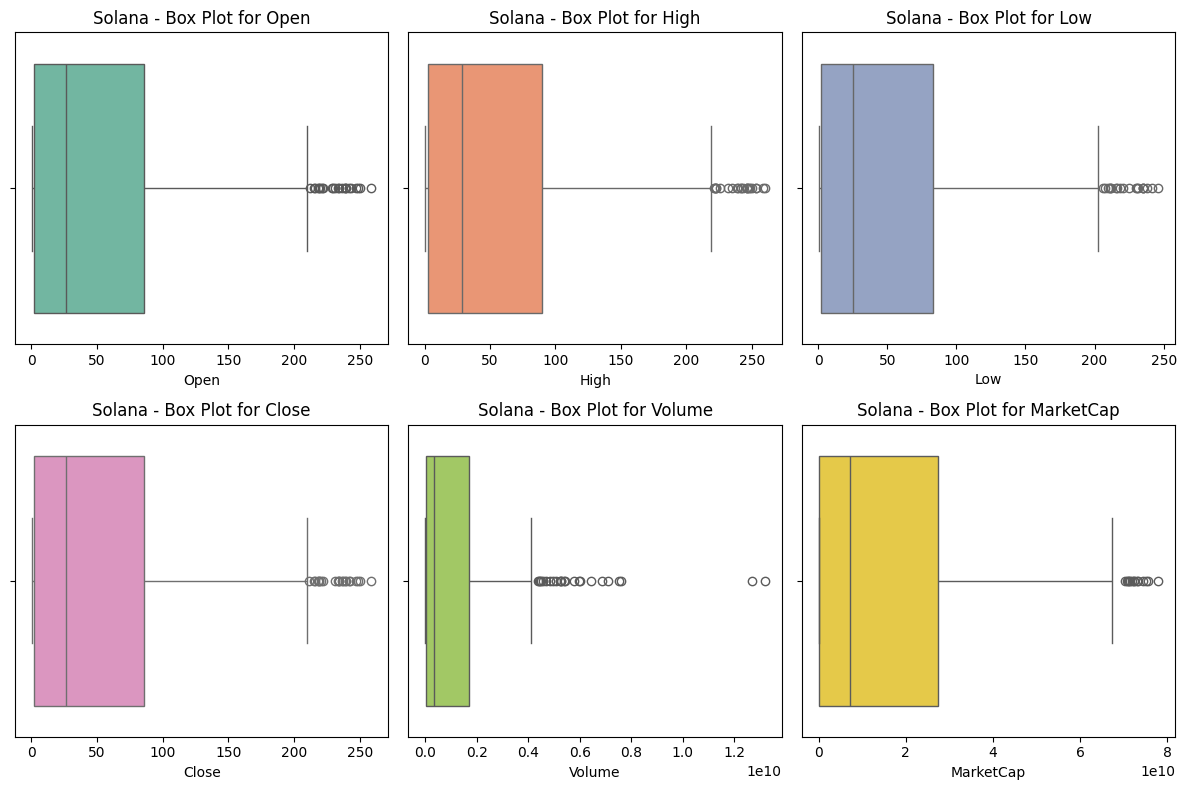

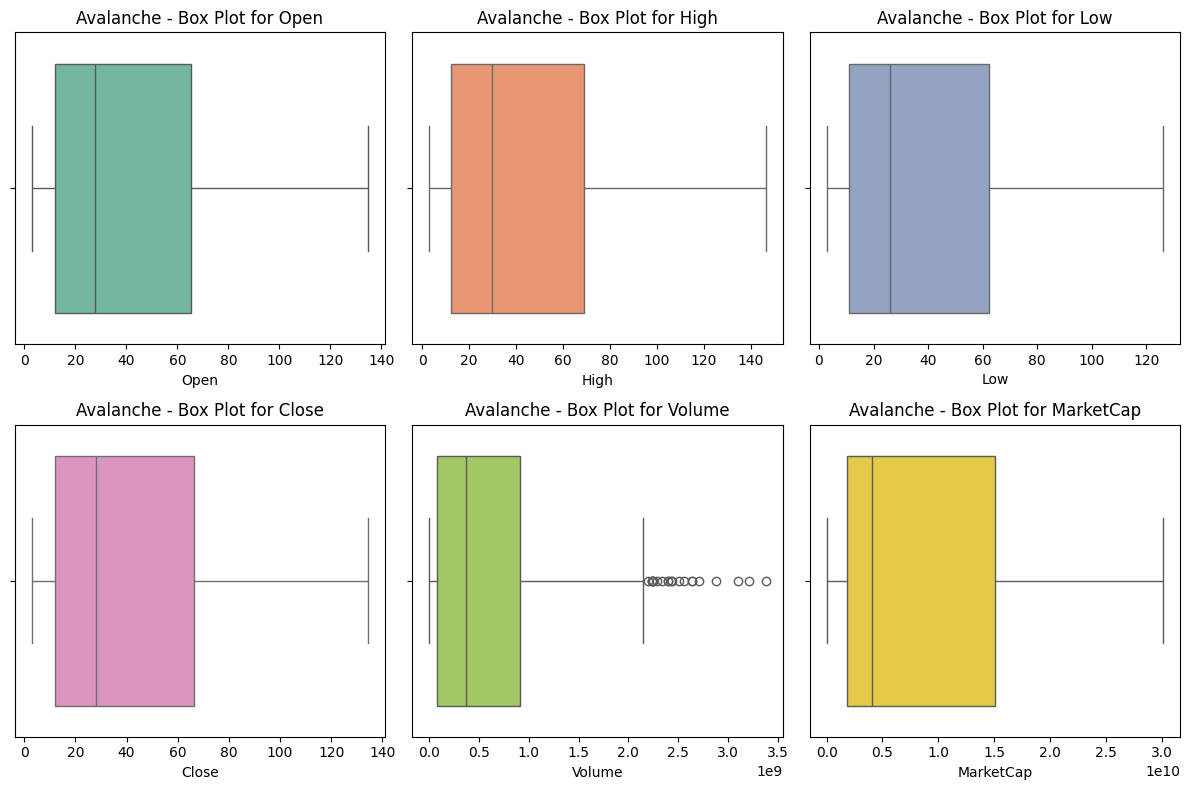

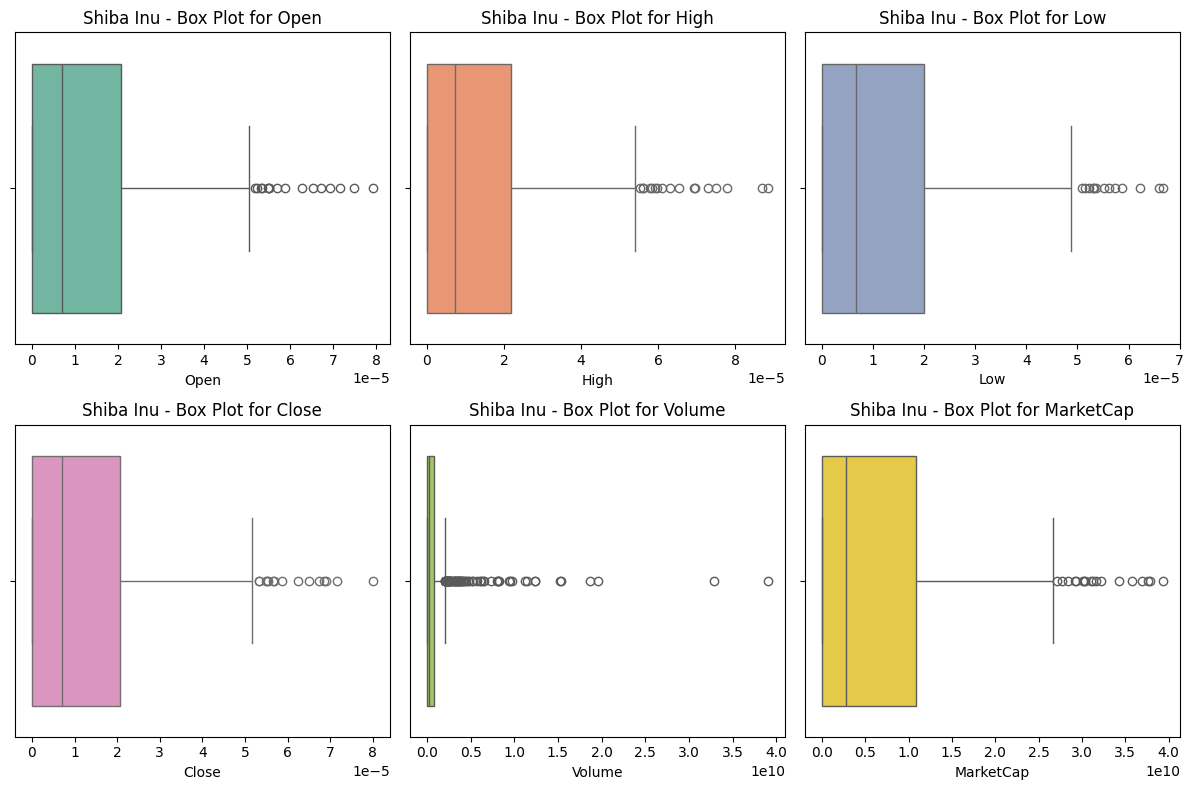

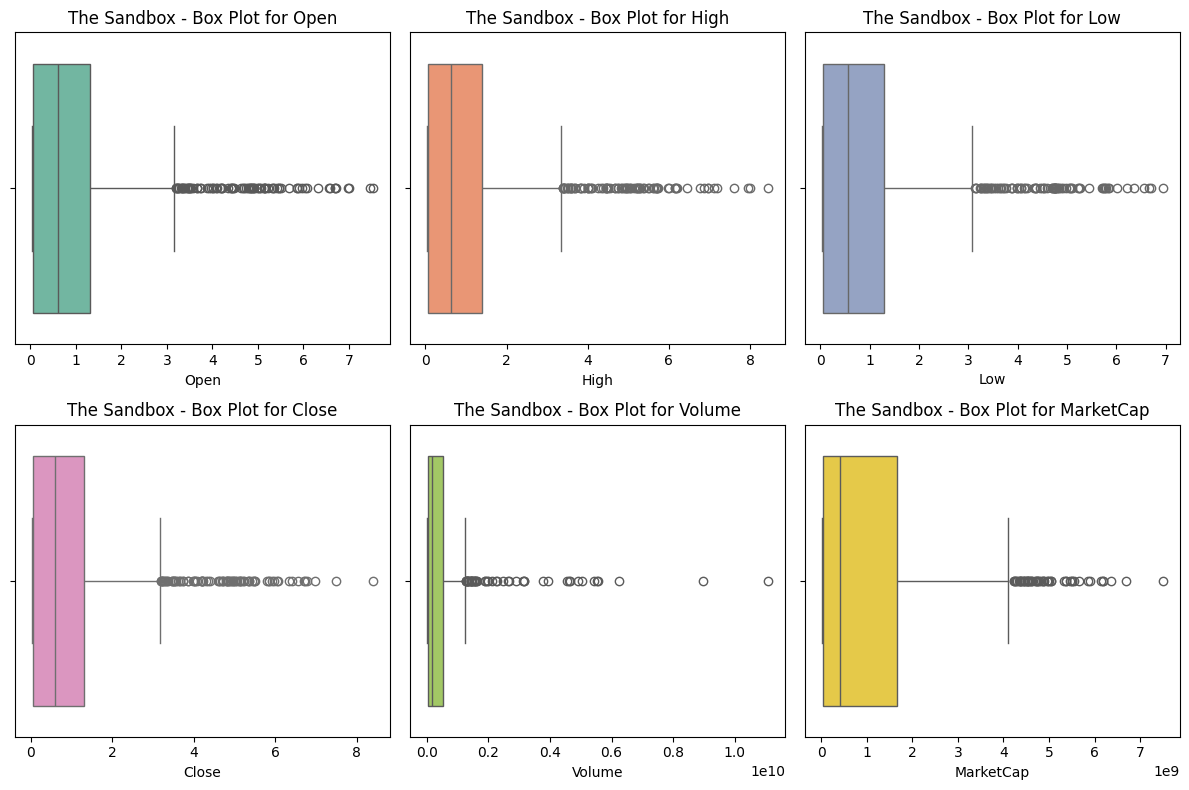

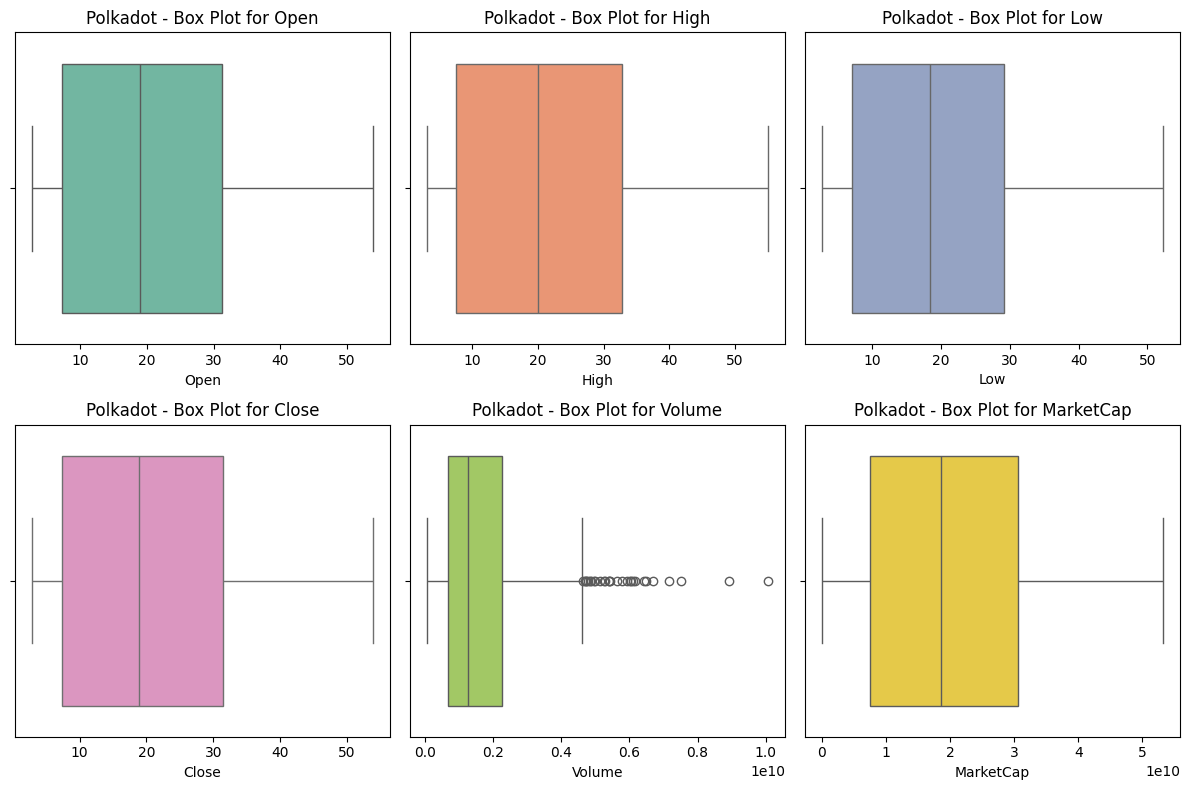

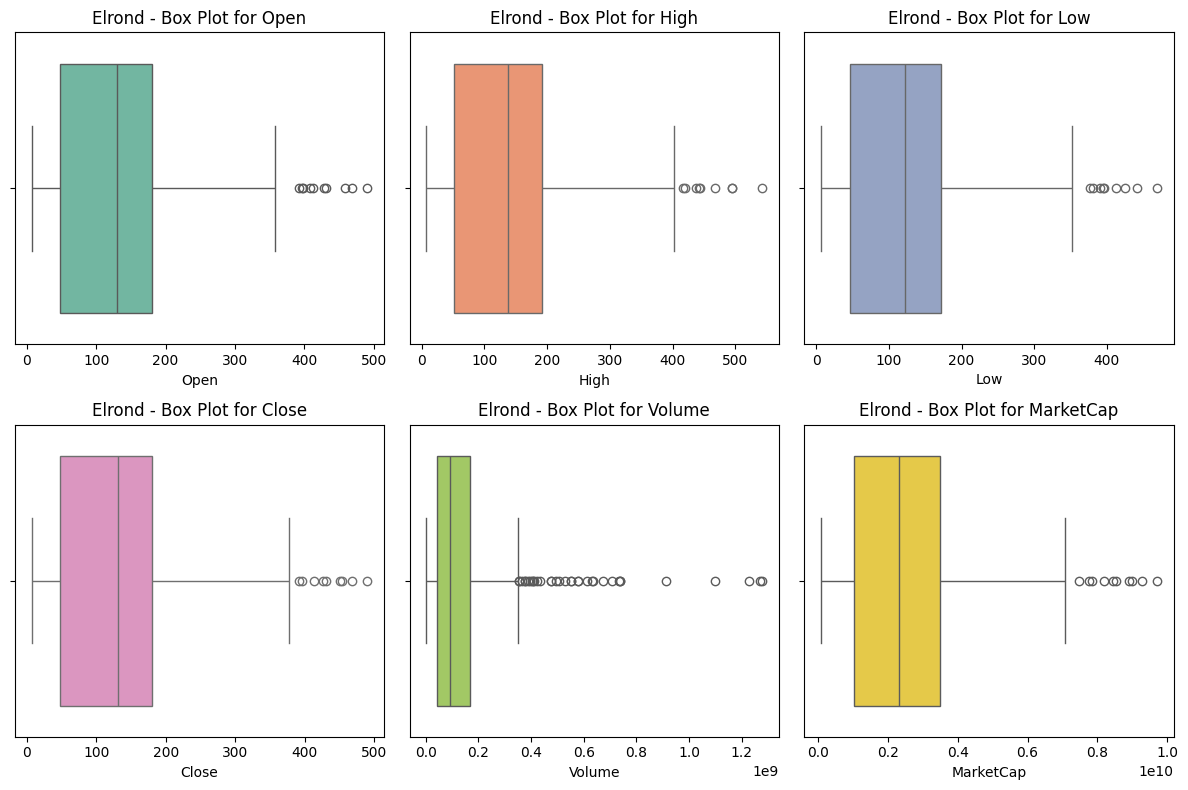

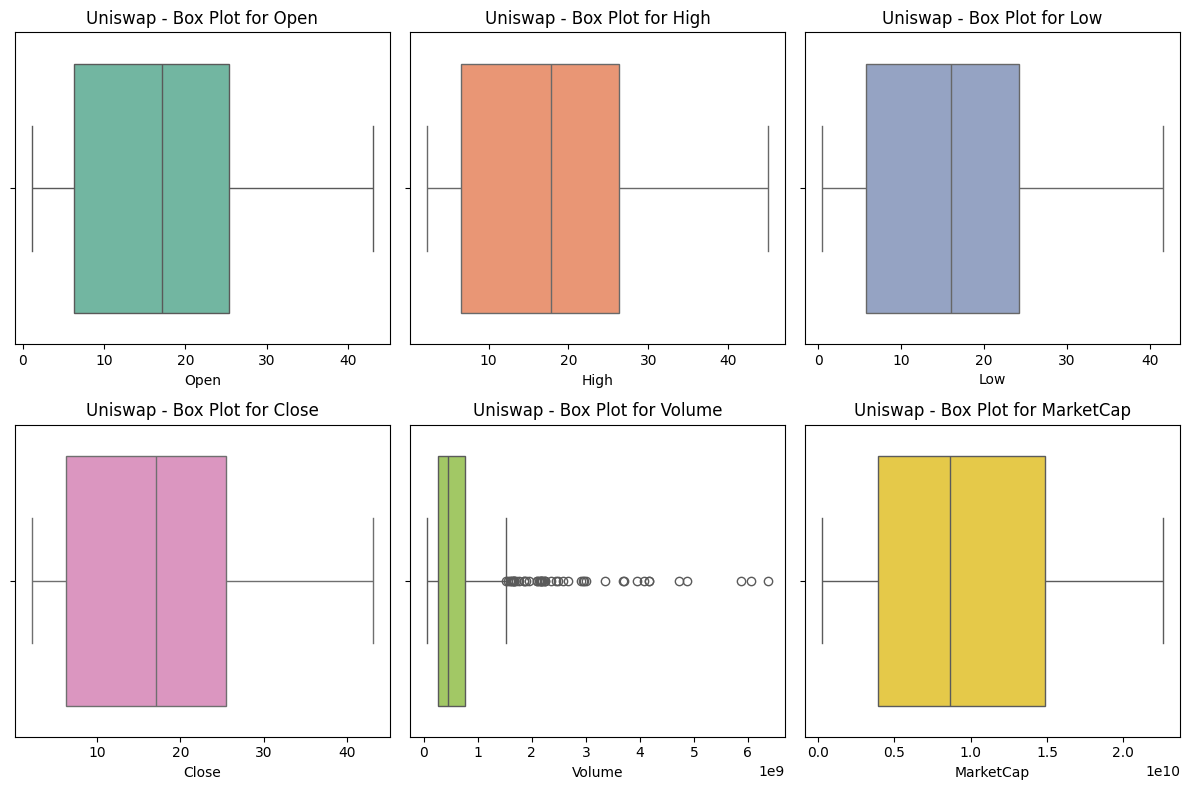

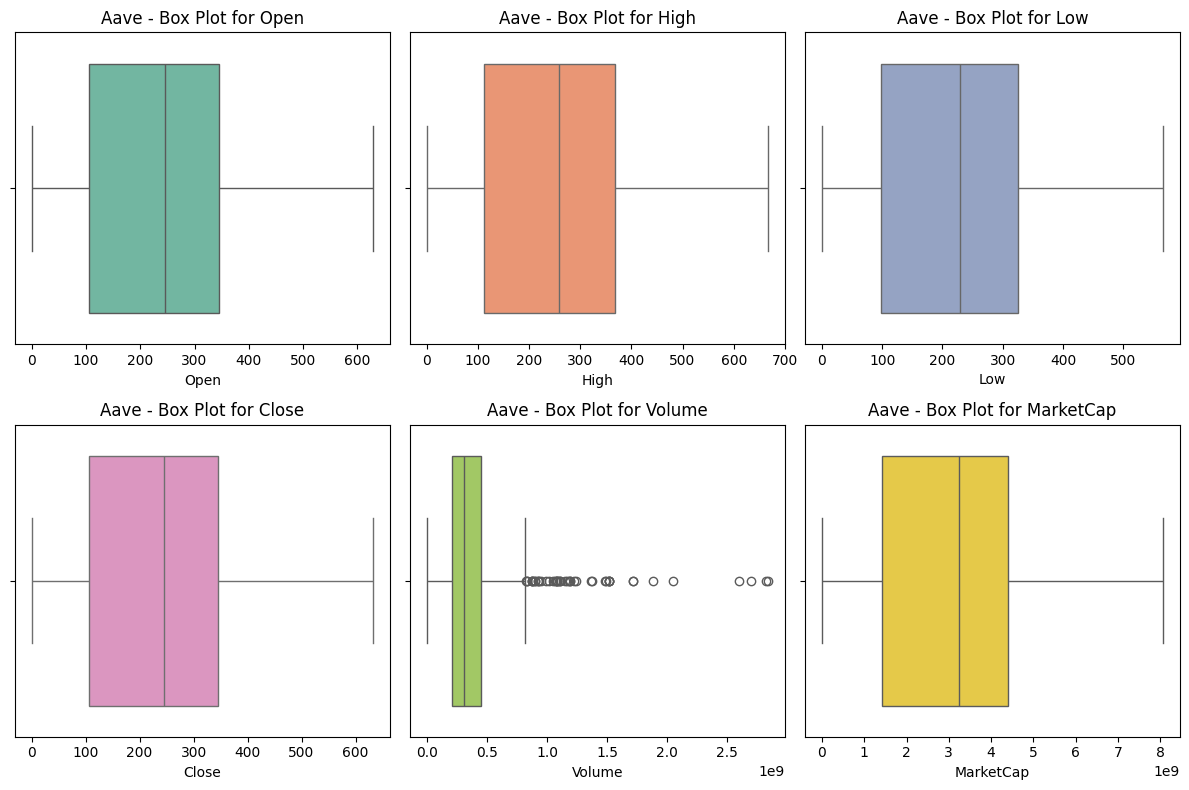

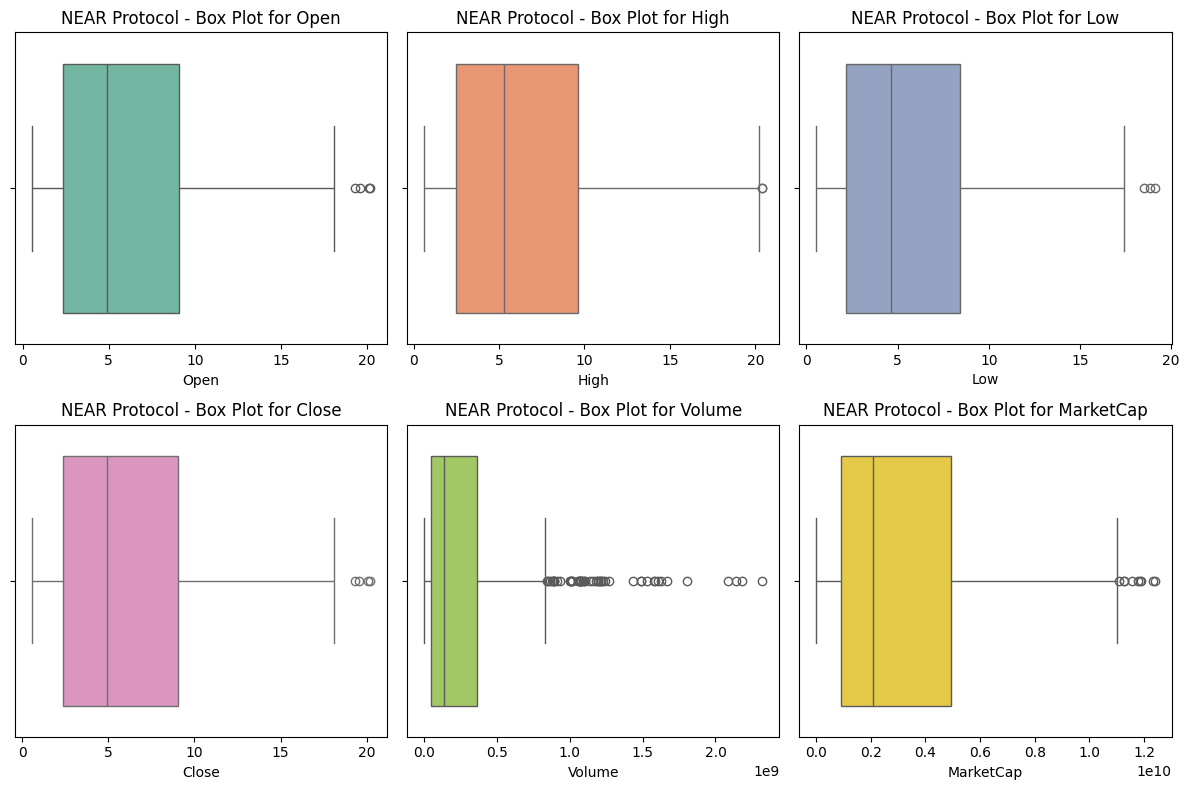

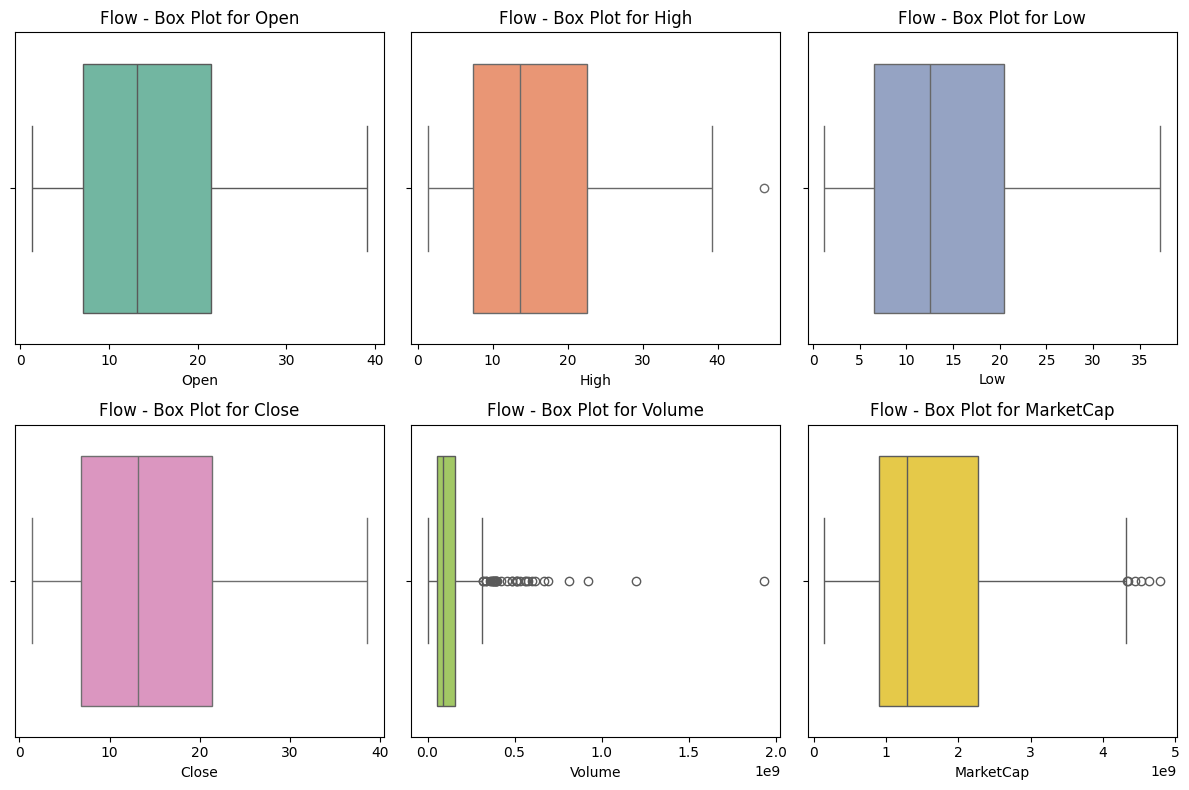

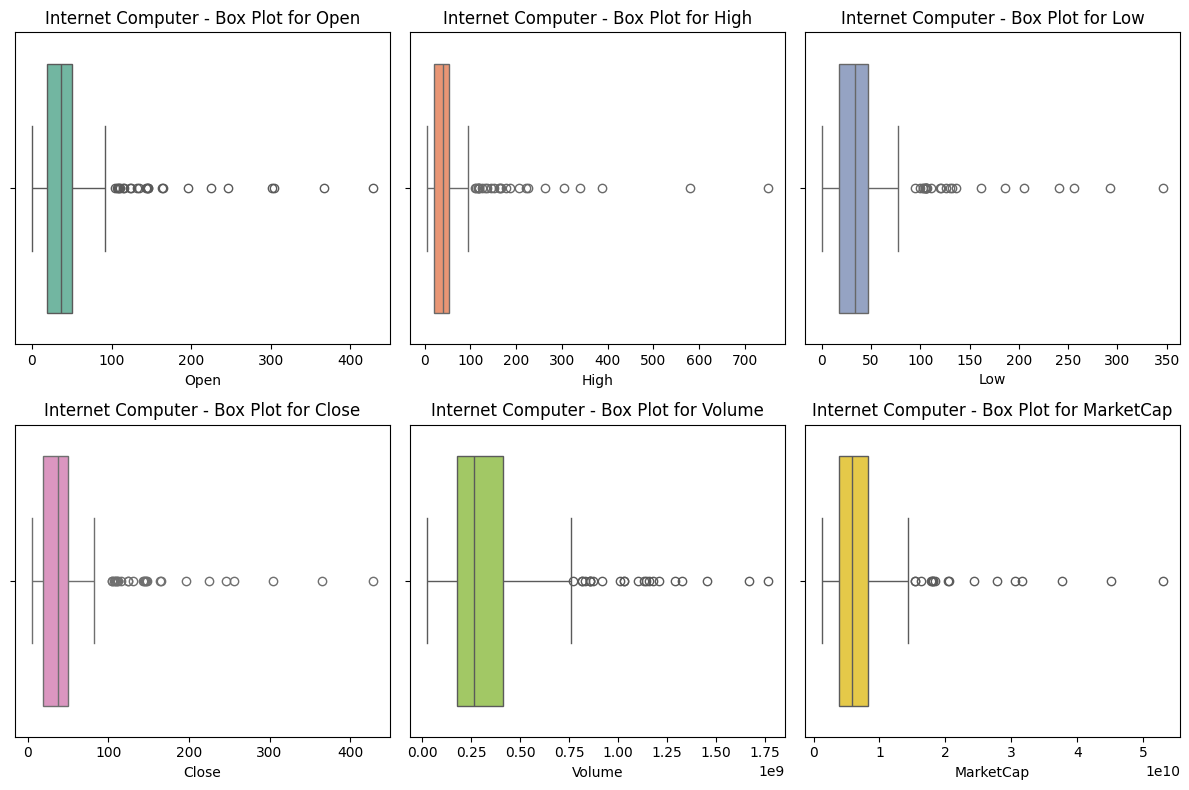

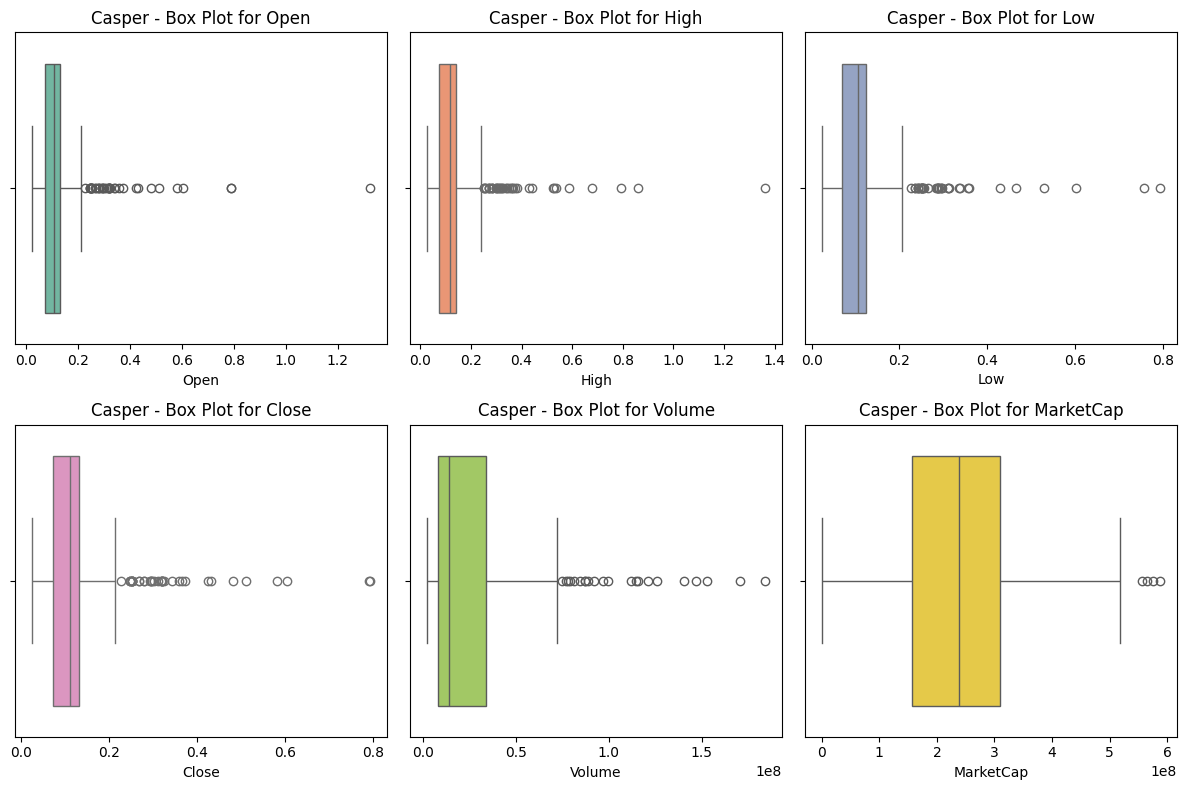

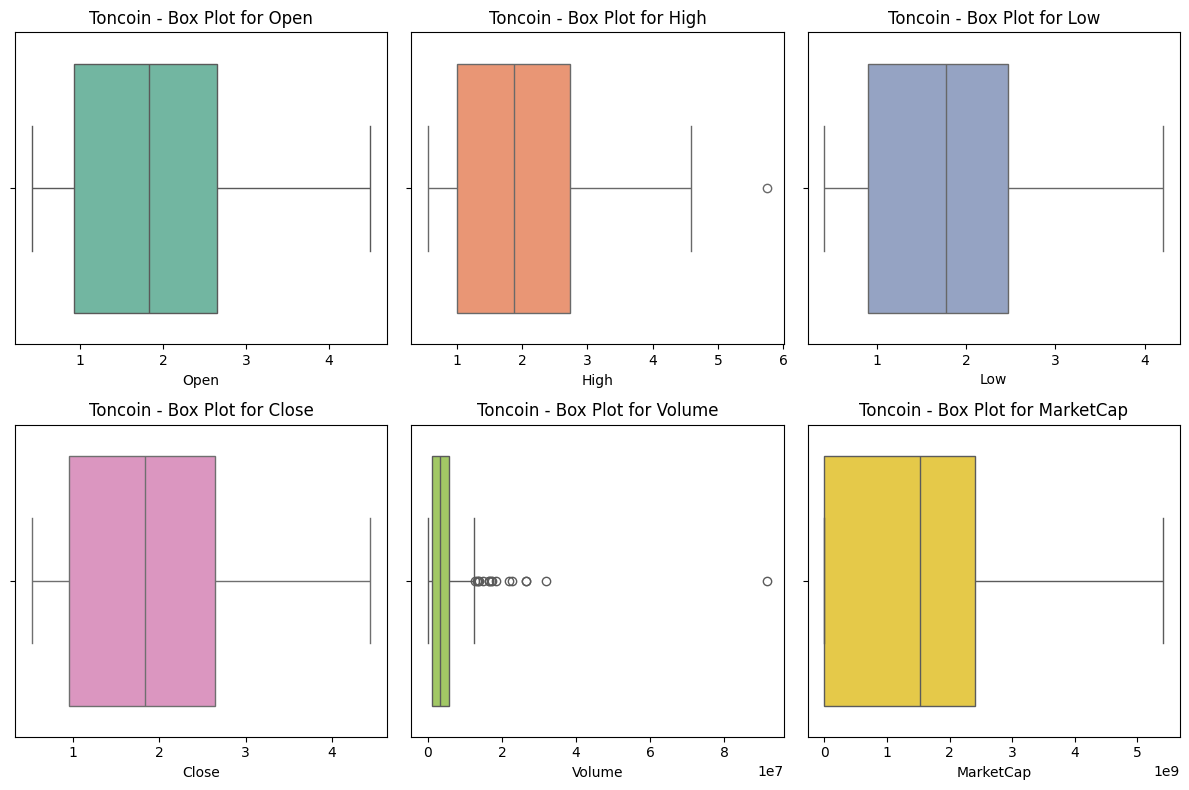

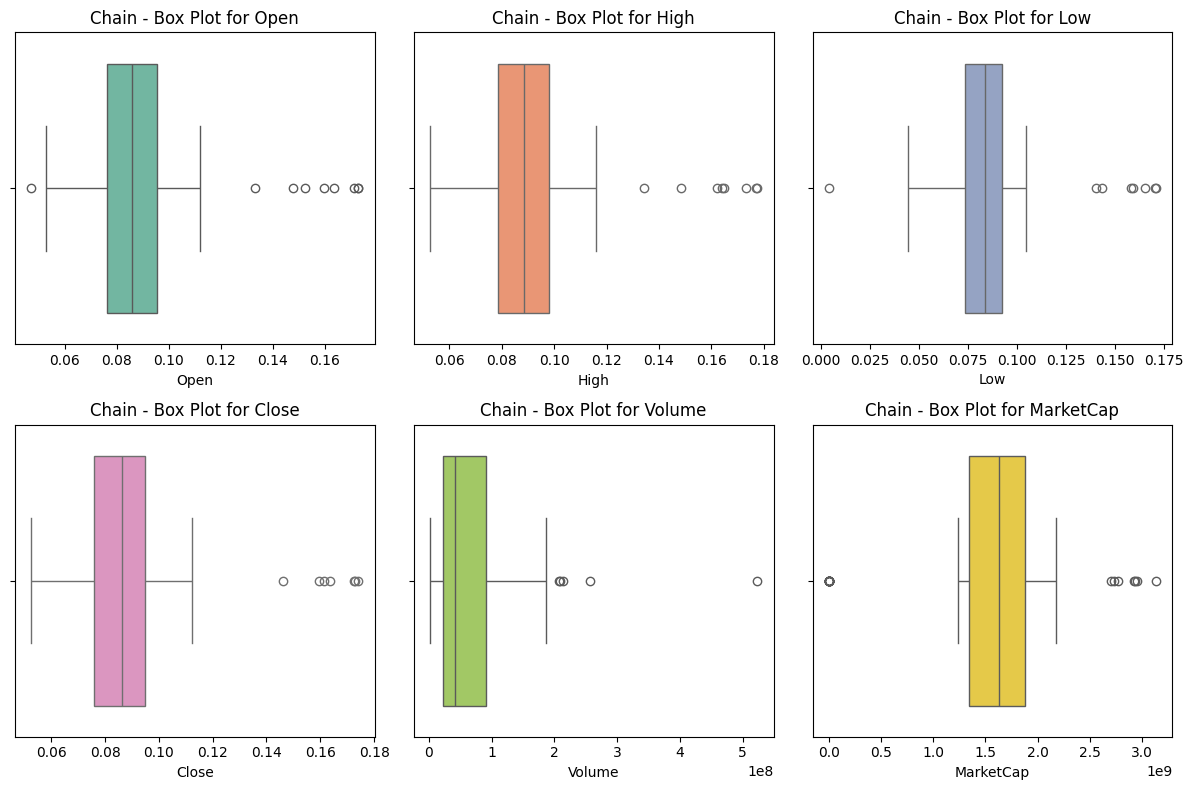

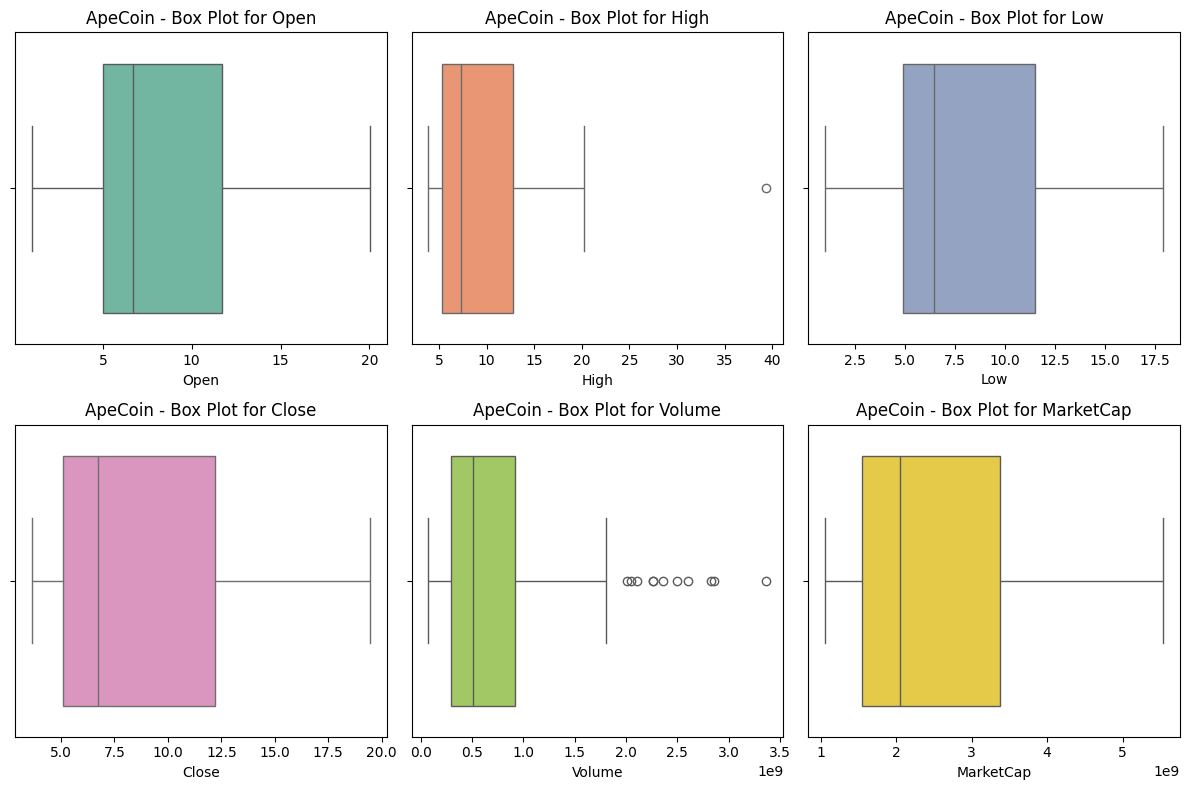

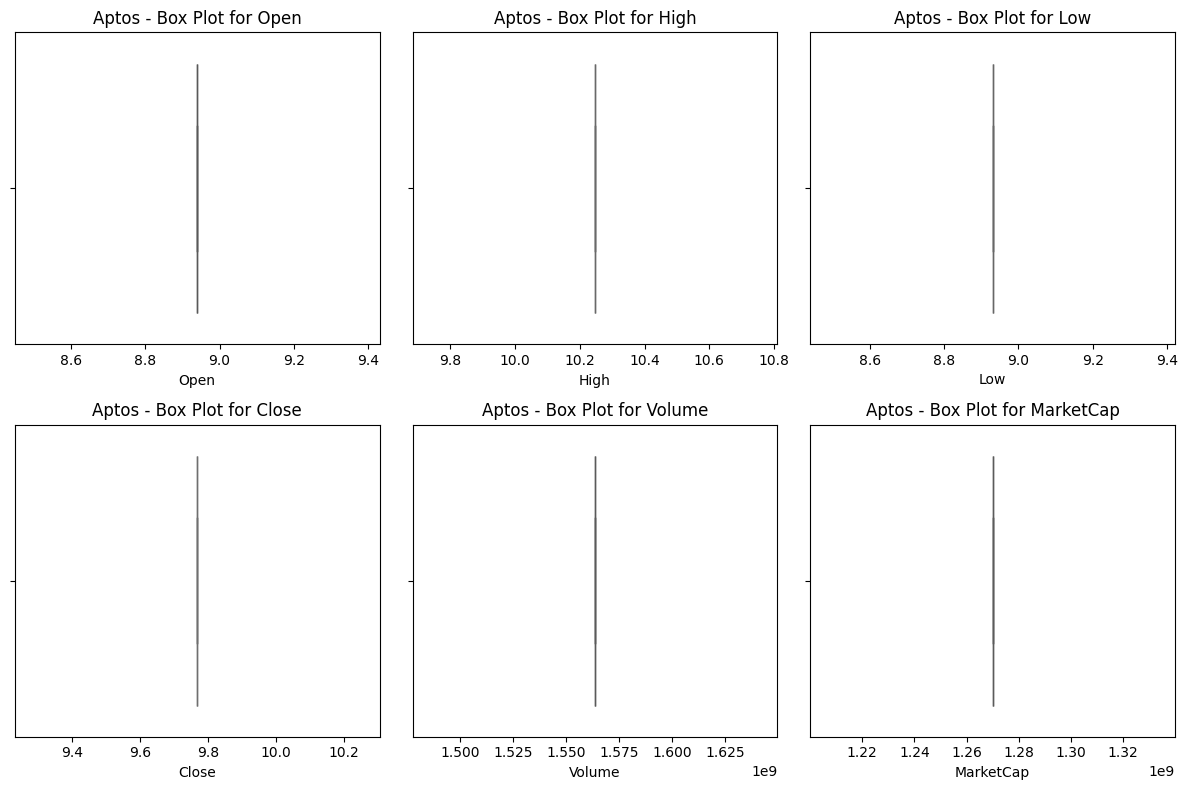

In [28]:
# Outliers by Cryptocurrency Name (Specific Analysis):
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'MarketCap']

# Create a color palette with a distinct color for each numerical column
palette = sns.color_palette("Set2", len(numerical_columns))

cryptocurrencies = bitcoin_crypto_concat_df['crypto_name'].unique()  # Adjust the column name if necessary

for crypto in cryptocurrencies:
    crypto_df = bitcoin_crypto_concat_df[bitcoin_crypto_concat_df['crypto_name'] == crypto]

    plt.figure(figsize=(12, 8))
    for i, column in enumerate(numerical_columns):
        plt.subplot(2, 3, i + 1)
        sns.boxplot(x=crypto_df[column], color=palette[i])  # Use the color palette here
        plt.title(f'{crypto} - Box Plot for {column}')
    plt.tight_layout()
    plt.show()

### Analyis of the Outliers by Cryptocurrency Name (Specific Analysis):
For further studies, the 'Outliers by Cryptocurrency Name (Specific Analysis)' provides a detailed view that allows us to compare the financial characteristics of each cryptocurrency separately.


- **Box plot for Dogecoin:** The box plots for 'Open', 'High', 'Low', and 'Close' share a similar profile, these metrics are often closely related. The median of these distributions is near the lower quartile, which indicates a right-skewed distribution with a concentration of data points at the lower end of the price range. The whiskers, which represent the variability outside the upper and lower quartiles, extend a significant distance from the box, suggesting a wide range of prices. There are also numerous points beyond the whiskers, indicating the presence of outliers; these could represent periods of high volatility or price spikes.

The presence of outliers in all metrics suggests that `Dogecoin`, like many cryptocurrencies, is subject to periods of high volatility and rapid changes in price, volume, and market capitalization.

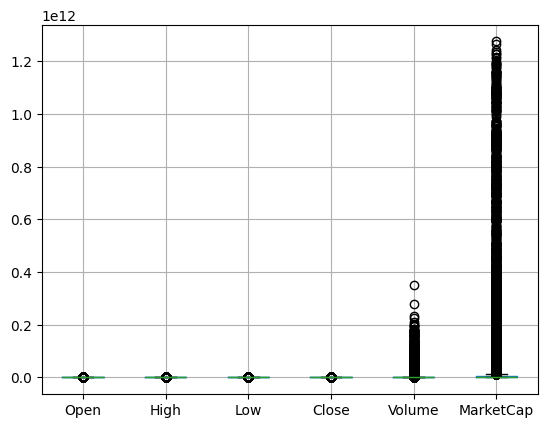

In [29]:
# Box Plot of the numeric columns:
bitcoin_crypto_concat_df.boxplot()
plt.show()

### Explanation for the 'Box Plot for the numeric columns:'

**Observations:**

- 'Open', 'High', 'Low', and 'Close' represent the opening, highest, lowest, and closing prices of a cryptocurrency for certain time periods.
- 'Volume' represents the number of shares or contracts traded for the cryptocuiesrency in a day.
- 'MarketCap' is the market capitalization, which is the total market value of the cryptocurrency's circulating supply.
  
It appears that 'Volume' has a much wider range and larger outliers compared to other categories, suggesting that trading volume varies significantly from day to day or over the observed time periods.

'MarketCap' also has a significant range, indicating variability in the market valuation of the cryptocurrency.

The 'Open', 'High', 'Low', and 'Close' values are relatively similar in terms of their median values and range, which is common for financial time series data where these values are often close to each other within a given ime period.
period.

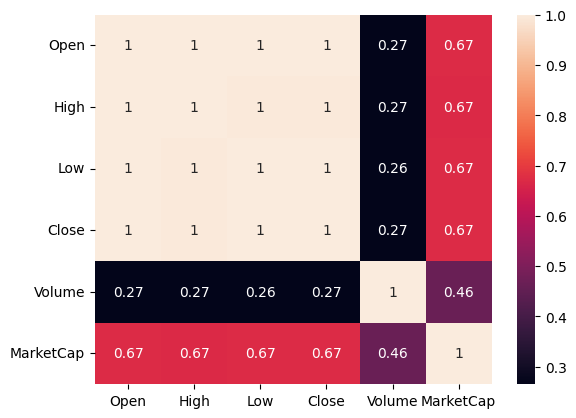

In [30]:
# Heatmap - Select only numeric columns for correlation
numeric_columns = bitcoin_crypto_concat_df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_columns.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Analysis of the Heatmap:
**Interesting Points:**

- **Correlation Among Price Metrics:** The opening (Open), high (High), low (Low), and closing (Close) prices are highly correlated with each other, as expected, since they are all related to the price movement within the same trading period. This high correlation indicates that these metrics often move in sync, reflecting consistent price behavior within each trading period.

- **Volume and Price Correlation:** Volume does not show a strong correlation with the opening, high, low, or closing prices. This observation suggests that the trading volume might be influenced by factors not directly related to the price changes within the same period. Such factors could include external market events, investor sentiment, or other cryptocurrencies' activities.

- **MarketCap and Price Correlation:** MarketCap shows a strong positive correlation with the opening, high, low, and closing prices. This correlation is logical because the market capitalization of a cryptocurrency is typically calculated by multiplying the price by the circulating supply. Therefore, MarketCap tends to move in tandem



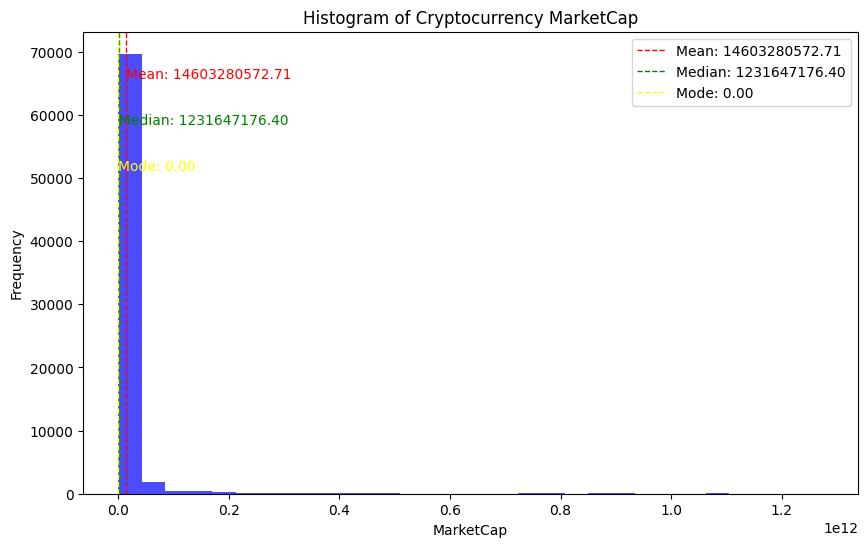

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Calculating the mean, median, and mode of the bitcoin_crypto_concat_df
mean_value = bitcoin_crypto_concat_df['MarketCap'].mean()
median_value = bitcoin_crypto_concat_df['MarketCap'].median()
mode_value = bitcoin_crypto_concat_df['MarketCap'].mode()[0]  

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(bitcoin_crypto_concat_df['MarketCap'], bins=30, color='blue', alpha=0.7)

# Adding a vertical line for mean, median, and mode
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.axvline(mode_value, color='yellow', linestyle='dashed', linewidth=1, label=f'Mode: {mode_value:.2f}')

# Annotating the mean, median, and mode on the plot
plt.text(mean_value, plt.ylim()[1]*0.9, f'Mean: {mean_value:.2f}', color='red')
plt.text(median_value, plt.ylim()[1]*0.8, f'Median: {median_value:.2f}', color='green')
plt.text(mode_value, plt.ylim()[1]*0.7, f'Mode: {mode_value:.2f}', color='yellow')

# Setting the title and labels
plt.title('Histogram of Cryptocurrency MarketCap')
plt.xlabel('MarketCap')
plt.ylabel('Frequency')

# Show legend
plt.legend()

# Show the plot
plt.show()

### Analysis of Market Capitalization Distribution

- **Right-Skewed Distribution:** The histogram indicates a right-skewed (positively skewed) distribution. This is evident from the concentration of data on the left side of the histogram and the long tail extending to the right. In practical terms, this means there are a few cryptocurrencies with very high market capitalization values and a large number of cryptocurrencies with relatively low market capitalization values.

- **Central Tendency Measures:** The mean is greater than the median, which is also a characteristic of a right-skewed distribution. Since the mean is influenced by extreme values, the higher market cap outliers push the mean to the right of the median.

- **Mode:** The mode is indicated as zero, which suggests that the most common value for market capitalization in the dataset is 0. This could be dseveralber of cryptocurrencies that are new, inactive, or otherwise have no market capitalizataset.

- **Analysis Impact:** In financial data like this, a right-skewed distribution is common because a small number of entities (cryptocurrencies, in this case) tend to dominate the market. However, using the mean as a measure of central tendency can be misleading because it doesn't accurately represent the typical market cap for most cryptocurrenci`es. Th`e median is a better measure here because it is less affected by extreme outliers and gives a more realistic picture of the central tendency of the market capitalization of a "typical" cryptocurrency.


# Part 3: Focus on creating meaningful visualizations 

**Objectives:**
- Create meaningful visualizations (e.g., time series plots, spectrograms for audio, image histograms)
to represent key features and patterns in the data or a subset of interest. Discuss the insights gained
from these visuazisations. Identify and describe any notable patterns or anomalies observed ithe n
analysis. Discuss their potential implications or significance within the context of your analy

**Challenges:**Create exceptional and 
insightful visualzsations 
effectively highlighting k y
features and patter s.
Provide a detailed and
profound discussi n of
insights gained fr m the
zisualisations.tions.sis

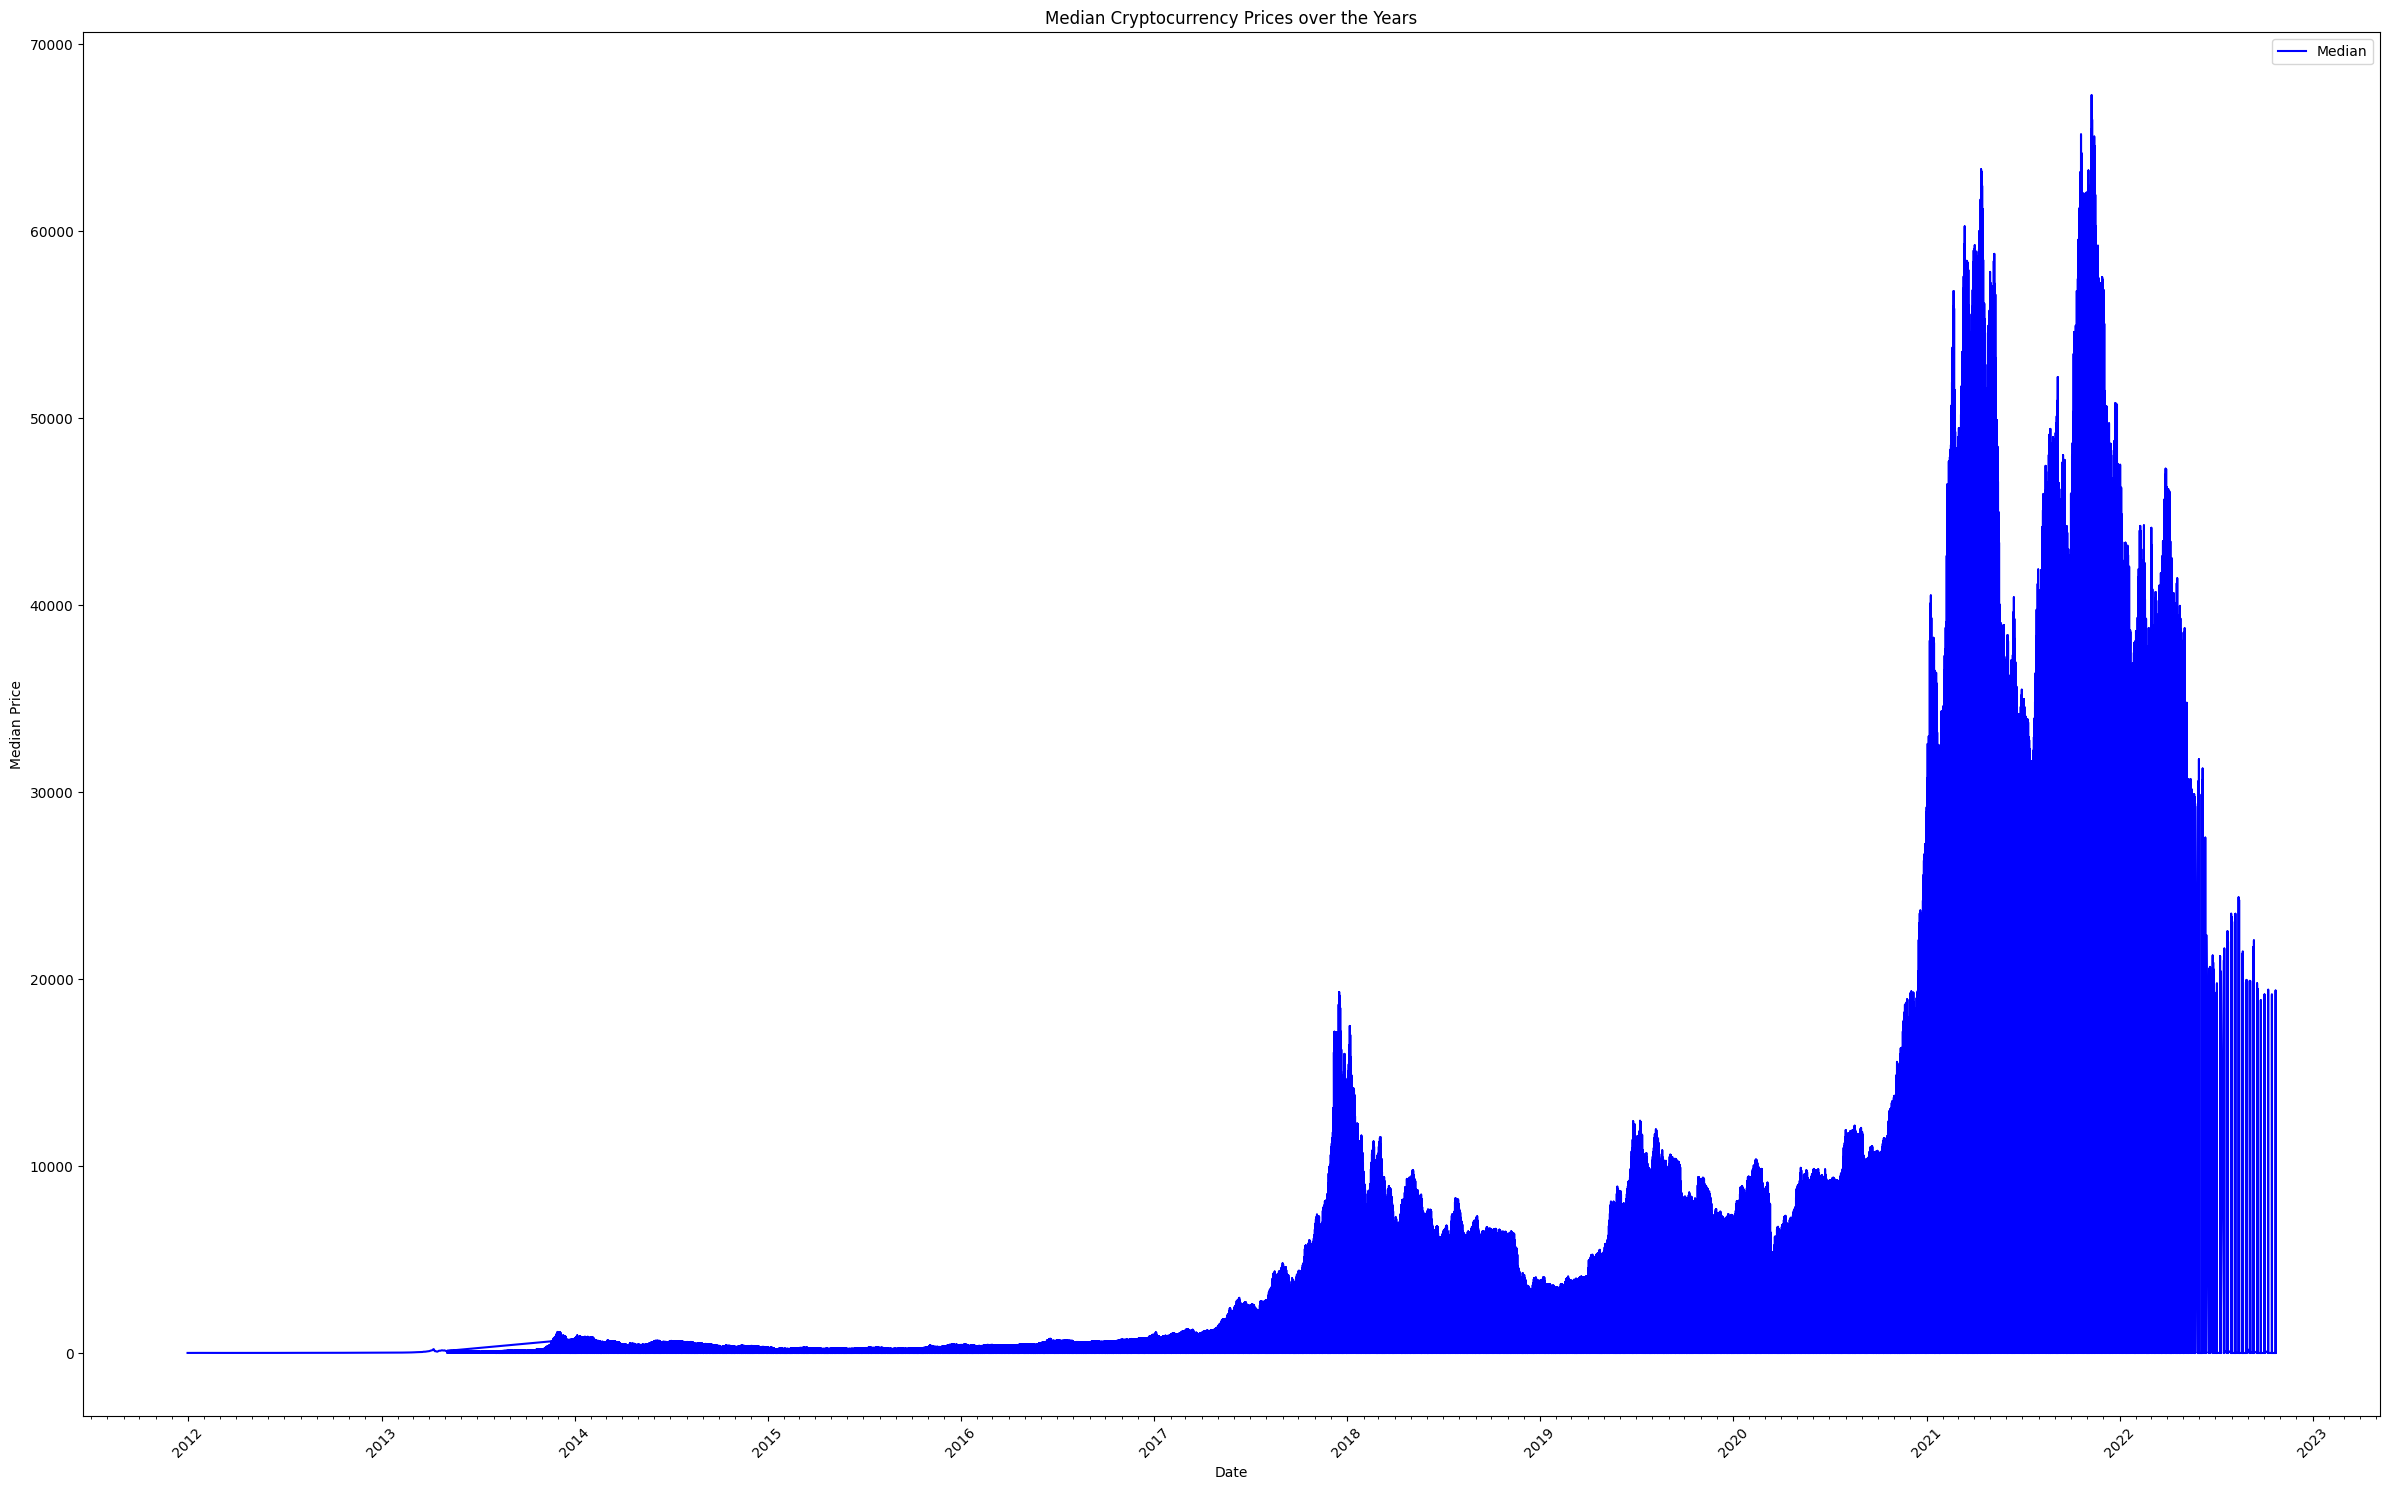

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Reset the current MultiIndex
bitcoin_crypto_concat_df = bitcoin_crypto_concat_df.reset_index()

# Convert the 'Date' column to datetime
bitcoin_crypto_concat_df['Date'] = pd.to_datetime(bitcoin_crypto_concat_df['Date'])

# Set 'Date' as the new index
bitcoin_crypto_concat_df.set_index('Date', inplace=True)

# Calculate the median of 'Open', 'High', 'Low', and 'Close' prices
bitcoin_crypto_concat_df['Median'] = bitcoin_crypto_concat_df[['Open', 'High', 'Low', 'Close']].median(axis=1)

# Create a figure and set its size
plt.figure(figsize=(24, 15))

# Plot the median prices
plt.plot(bitcoin_crypto_concat_df.index, bitcoin_crypto_concat_df['Median'], label='Median', color='blue')

# Define the date format
years = mdates.YearLocator()   # Every year
years_fmt = mdates.DateFormatter('%Y')

ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(mdates.MonthLocator())

plt.xticks(rotation=45)
plt.tick_params(axis='x', which='major', labelsize=10)

plt.title('Median Cryptocurrency Prices over the Years')
plt.xlabel('Date')
plt.ylabel('Median Price')
plt.legend()
plt.tight_layout()
plt.show()


### Explanation of the 'Historical Median Cryptocurrency Prices over the Years':

**Time Span:** The graph covers roughly 11 years of Crypto's price history.

**Price Fluctuations:** There are significant fluctuations in the median price, with several peaks and troughs. The highest peaks are seen in the right half of the chart, suggesting significant price increases during these periods.

**Price Scale:** The price is scaled from 0 to approximately 160,000, which suggests that the currency experienced periods of extremely high valuation.

**Volatility:** The thin spikes, especially the ones representing the 'High' price, indicate days with large ranges between the high and low prices, which is characteristic of high volatility in the market.

**General Trend:** The prices appear to rise over time with a few significant peaks, suggesting periods of rapid price increase followed by declines.

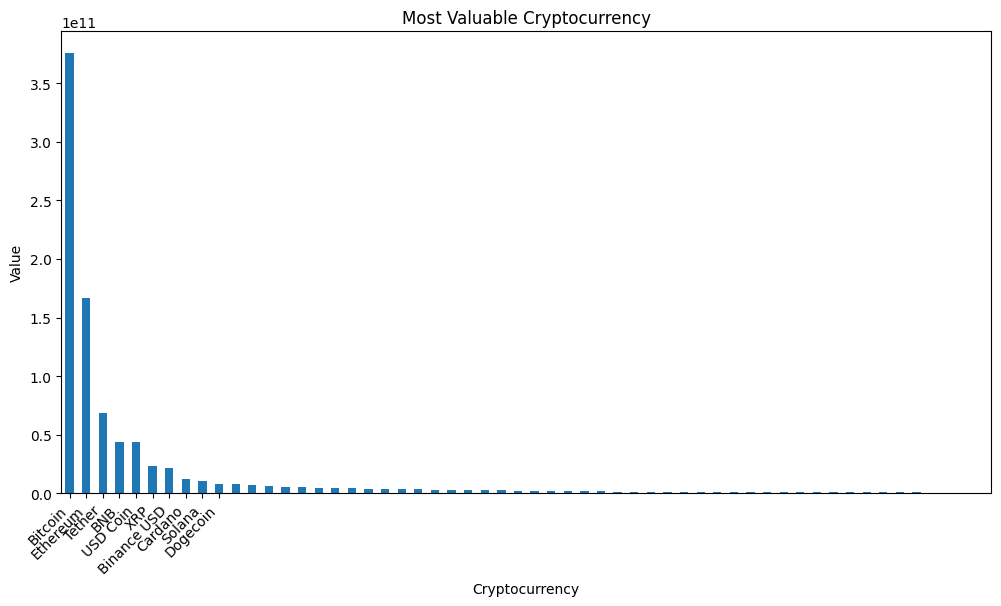

In [33]:
# Most Valuable Cryptocurrency
crypto_values = bitcoin_crypto_concat_df.groupby('crypto_name')['MarketCap'].last()

# Sort the values to get the most valuable cryptocurrencies
crypto_values_sorted = crypto_values.sort_values(ascending=False)

# Create a bar graph with more granular settings
plt.figure(figsize=(12, 6))  # Adjust the figure size
ax = crypto_values_sorted.plot(kind='bar')
plt.title('Most Valuable Cryptocurrency')
plt.xlabel('Cryptocurrency')
plt.ylabel('Value')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Limit the number of cryptocurrencies displayed (for example, top 10)
num_cryptos_to_display = 10
ax.set_xticks(range(len(crypto_values_sorted.index[:num_cryptos_to_display])))
ax.set_xticklabels(crypto_values_sorted.index[:num_cryptos_to_display])

plt.show()

crypto_name  Aave  Algorand  ApeCoin  Aptos  Avalanche  BNB  \
Date                                                          
2011            0         0        0      0          0    0   
2012            0         0        0      0          0    0   
2013            0         0        0      0          0    0   
2014            0         0        0      0          0    0   
2015            0         0        0      0          0    0   
2016            0         0        0      0          0    0   
2017            0         0        0      0          0  160   
2018            0         0        0      0          0  365   
2019            0       193        0      0          0  364   
2020           88       358        0      0        100  358   
2021          323       323        0      0        323  323   
2022          136       136       80      1        136  136   

crypto_name  Basic Attention Token  Binance USD  Bitcoin  Bitcoin Cash  ...  \
Date                                  

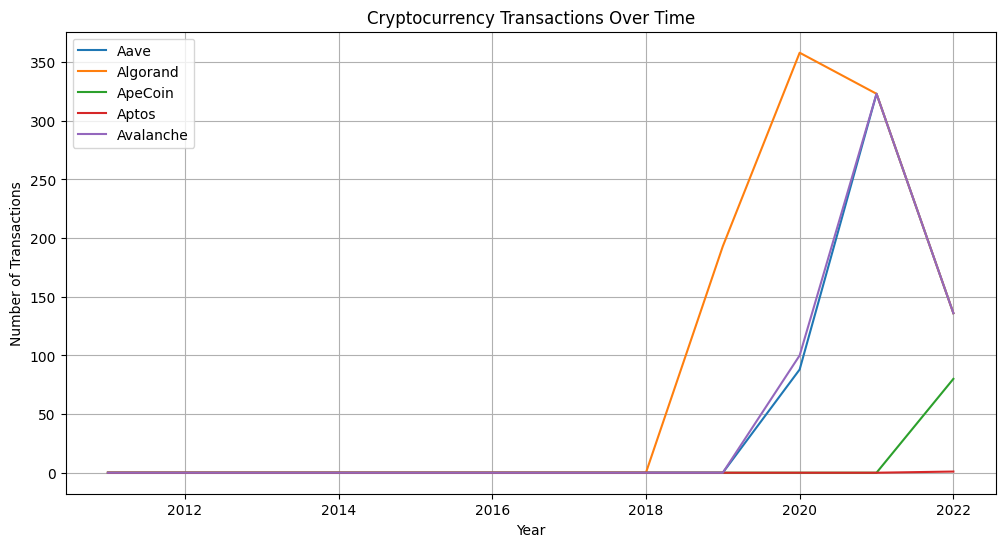

In [34]:
#Cryptocurrency Transactions Over Time:

# Group by cryptocurrency name and year, then count the number of occurrences
counts = bitcoin_crypto_concat_df.groupby([bitcoin_crypto_concat_df.index.year, 'crypto_name']).size()

# Unstack the groupby results to create a DataFrame where each column is a cryptocurrency
counts_df = counts.unstack(level='crypto_name', fill_value=0)

# Now you have your counts_df where the index is the year and each column represents a cryptocurrency.
print(counts_df)

# Example of how to plot this data (for the first 5 cryptocurrencies for clarity in the example)
plt.figure(figsize=(12, 6))
for crypto_name in counts_df.columns[:5]:  # Just plot the first 5 for a cleaner plot
    plt.plot(counts_df.index, counts_df[crypto_name], label=crypto_name)

plt.title('Cryptocurrency Transactions Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.legend()
plt.grid(True)
plt.show()




### Explanation of the 'Cryptocurrency Transactions Over Time' Graph

The 'Cryptocurrency Transactions Over Time' graph is a visual representation of the transaction counts for various cryptocurrencies across different years. It allows a comparison of the activity levels associated with each cryptocurrency and shows how they have changed over time.

- **X-Axis (Horizontal):** This axis represents time, specifically years, over which the transaction data has been collected.

- **Y-Axis (Vertical):** This axis shows the number of transactions that have been recorded for each cryptocurrency. 

- **Lines:** Each line represents a different cryptocurrency. The trends observed in these lines can provide insights into the transactional activity of each cryptocurrency:
  
  - A **rising line**, such as what we might observe for Algorand, suggests an increase in transactions during a specific period (e.g., 2018). This could be indicative of the growing popularity or utility of that particular cryptocurrency.

  - A **falling line**, such as what might be observed for Avalanche, would indicate a decrease in transactions during the observed period. This might reflect declining interest or utility.

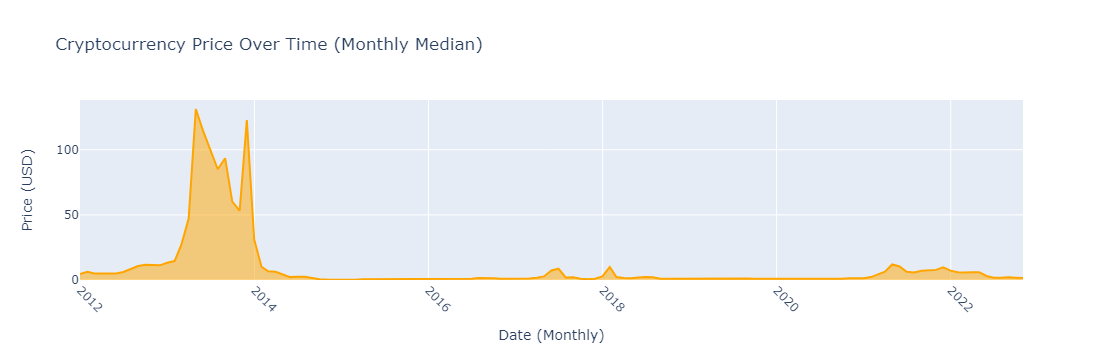

In [35]:
# Resample the data by month ('M') and calculate the median of 'Close' for each month
import plotly.express as px

# Resample the data by month ('M') and calculate the median of 'Close' for each month
monthly_data = bitcoin_crypto_concat_df.resample('M')['Close'].median().reset_index()

# Create an interactive figure using Plotly Express
fig = px.line(monthly_data, x='Date', y='Close', title='Cryptocurrency Price Over Time (Monthly Median)',
              labels={'Close': 'Price (USD)'}, line_shape='linear')

# Customize the appearance of the plot
fig.update_traces(fill='tozeroy', fillcolor='rgba(255,165,0,0.5)', line=dict(color='orange'))
fig.update_xaxes(title_text='Date (Monthly)', showgrid=True)
fig.update_yaxes(showgrid=True)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=45)

# Show the interactive plot
fig.show()


### Explanation of the 'Cryptocurrency Price Over Time (Monthly Median)':

**The Goal:** The primary goal of this analysis is to understand the general behavior of the cryptocurrency market as a whole. Utilizing the median as a metric can provide insights into the central tendency of prices across multiple currencies. This approach helps in smoothing out anomalies that are specific to any single cryptocurrency, offering a clearer view of the market's overall trends.

**Chart Overview:**
- The chart is a historical representation of the median monthly price of a list of cryptocurrencies.
- It highlights the volatile nature of cryptocurrency prices in the earlier years, characterized by significant fluctuations.
- In the later years, the chart shows a more stable pattern, indicating a possible maturation of the market or a decrease in volatility.

**Why Use the Median:**
- The median was chosen for this analysis to provide a more robust measure of central tendency.
- It is less affected by extreme values and outliers than the mean, making it a more reliable indicator in markets known for high price al currencies


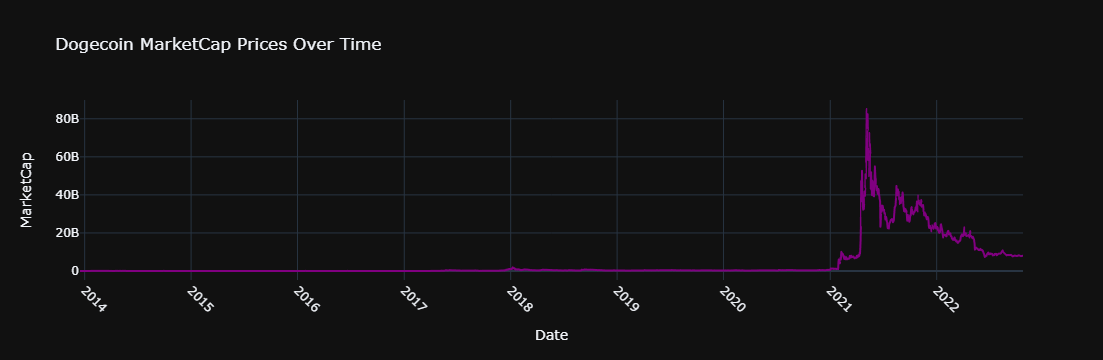

In [45]:
# A closer look at a specific cryptocurrency,  plot of Dogecoin over the years:
# Define the target cryptocurrency
target_crypto = 'Dogecoin'
# Filter the data for the specific cryptocurrency 'Dogecoin'
crypto_data = bitcoin_crypto_concat_df[bitcoin_crypto_concat_df['crypto_name'] == target_crypto]

# Create an interactive line plot using Plotly Express
fig = px.line(crypto_data, x='Timestamp', y='MarketCap', 
              labels={'Timestamp': 'Date', 'MarketCap': 'MarketCap'},
              title=f'{target_crypto} MarketCap Prices Over Time',
              line_shape='linear',
              template='plotly_dark')  # You can choose different templates for the plot's appearance

# Customize the appearance of the plot
fig.update_traces(line=dict(color='purple'), mode='lines')
fig.update_xaxes(showgrid=True, title_text='Date')
fig.update_yaxes(showgrid=True, title_text='MarketCap')

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=45)

# Show the interactive plot
fig.show()

### Analysis of Dogecoin's 'MarketCap Prices Over Time':

- **Sharp Rise in Late 2020 and Peak in 2021:**
  The market capitalization of Dogecoin begins to rise sharply in late 2020, reaching a peak in 2021. This spike represents a dramatic increase in the value of Dogecoin, which could be attributed to a variety of factors, including increased investor interest, media attention,andrso ons.

- **Volatility in 2021:**
  Following the initial peak, the market capitalization experidnces several sharp rises and falls, indicating a period of high volatility. This could be due to market reactions to news events, changes in the regulatory environment, or shifts in investor sentiment.

- **Decline and Fluctuations Post-2021:**
  After the volatile period in 2021, there is a general decline in market capitalization, accompanied by some fluctuations. This trend might suggest a cooling off of the initial enthusiasm and a correction in the market value of Doe results.



In [38]:
# Finding the maximum variance in bitcoin_crypto_concat_df MarketCap per Year and Month. 

# Extract year and month from the 'Date' column
bitcoin_crypto_concat_df['Year'] = bitcoin_crypto_concat_df['Timestamp'].dt.year
bitcoin_crypto_concat_df['Month'] = bitcoin_crypto_concat_df['Timestamp'].dt.month

# Calculate the variance of MarketCap for each year
annual_variance = bitcoin_crypto_concat_df.groupby('Year')['MarketCap'].var()

# Calculate the variance of MarketCap for each month (across all years)
monthly_variance = bitcoin_crypto_concat_df.groupby('Month')['MarketCap'].var()

# Find the year with the maximum variance
max_variance_year = annual_variance.idxmax()

# Find the month with the maximum variance
max_variance_month = monthly_variance.idxmax()

print(f"The period with the most variance in MarketCap is: Year {max_variance_year}, Month {max_variance_month}")


The period with the most variance in MarketCap is: Year 2021, Month 4


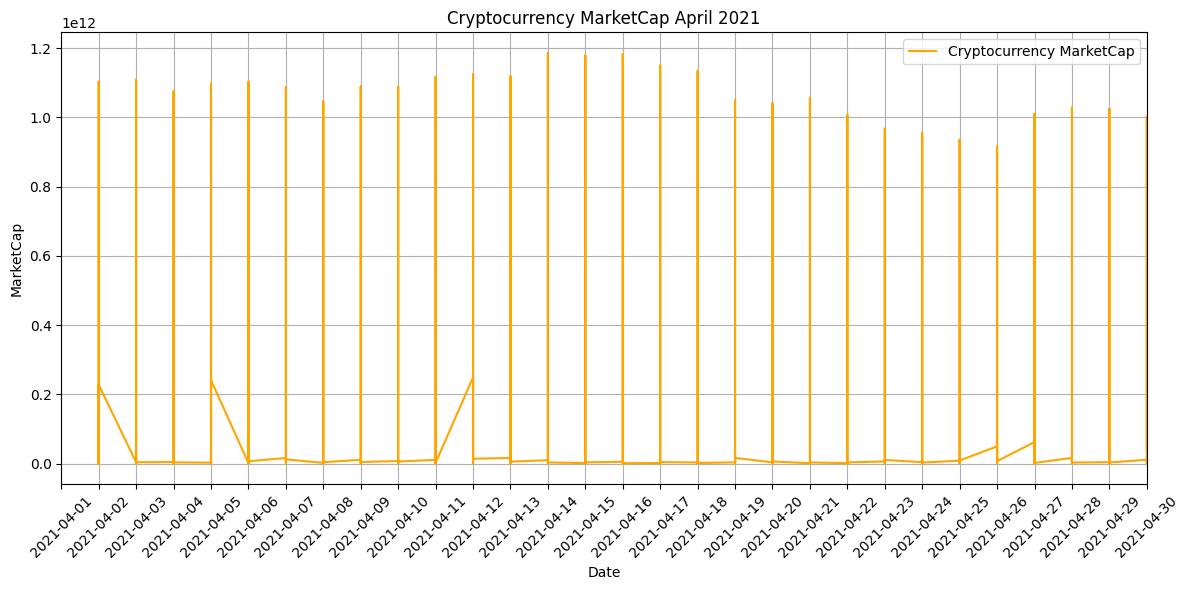

In [39]:
import matplotlib.dates as mdates
# Visualizing the maximum variance in bitcoin_crypto_concat_df MarketCap per Year and Month. 

# Convert start and end dates to timezone-aware datetime objects
start_date = pd.to_datetime('2021-04-01').tz_localize('UTC')
end_date = pd.to_datetime('2021-04-30').tz_localize('UTC')

# Filter the DataFrame
mask = (bitcoin_crypto_concat_df['Timestamp'] >= start_date) & (bitcoin_crypto_concat_df['Timestamp'] <= end_date)
filtered_df = bitcoin_crypto_concat_df.loc[mask]

dates = filtered_df['Timestamp']
closing_prices = filtered_df['MarketCap']

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(dates, closing_prices, label='Cryptocurrency MarketCap', color='orange')

# Formatting Date on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))

# Set the x-axis limits
plt.xlim(start_date, end_date)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('MarketCap')
plt.title('Cryptocurrency MarketCap April 2021')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Analysis of the 'Cryptocurrency MarketCap April 2021'

**Significant Spikes:**
- There are notable spikes in MarketCap, especially arouAprilber. These pronounced increases could be attributed to a sudden surge in the cryptocurrency's price, a dramatic rise in circulating supply, or a combination of both factors.

**Period of Stability:**
- The MarketCap shows periods of relative stability, where fluctuations are minimal. This suggests there were intervals of decreased activity or stable pricing during those times.

**Analysis Insight:**
- The line graph indicaApril November 2021 was a period of significant dynamism within the cryptocurrency markets, characterized by phases of high volatility and periods of stability. To fully understand the forces behind these market movements, one would need to consider additional information and external events not shown in the graph, such as market news, economic factors, or changes in investor sent.
h.s.

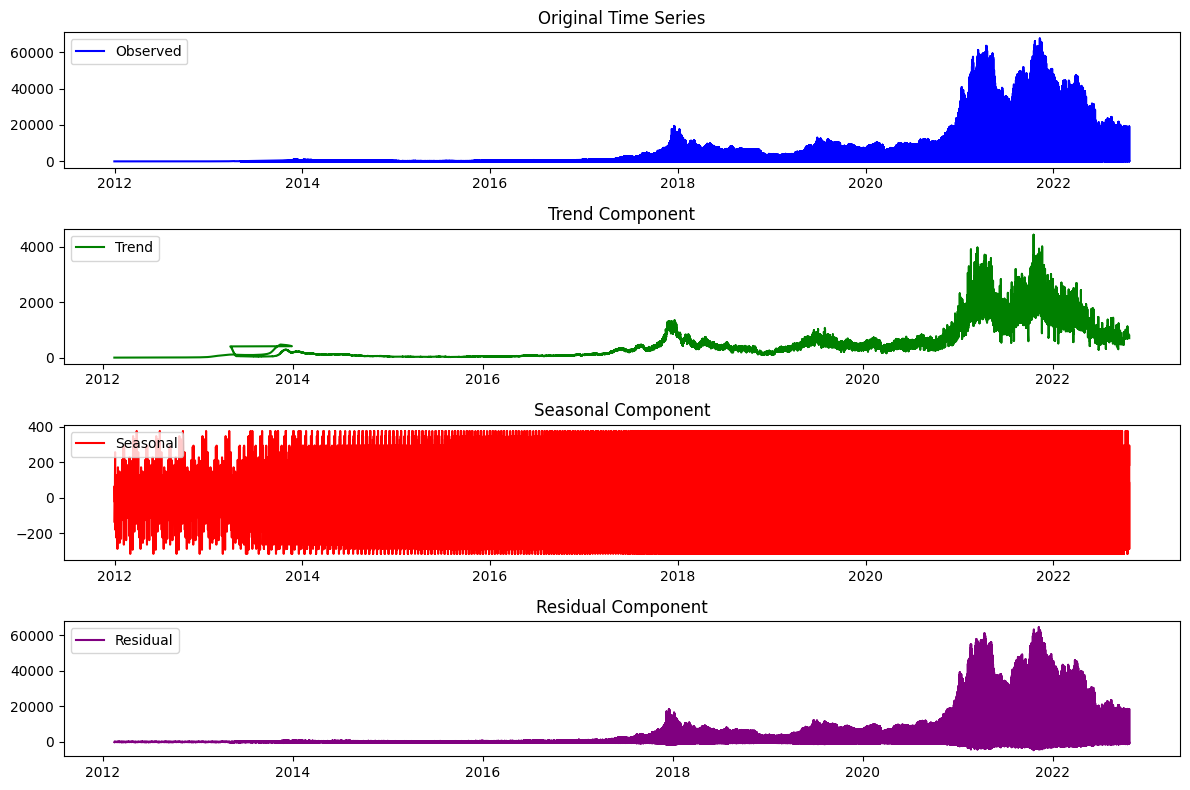

interactive(children=(IntSlider(value=90, description='Seasonal Period:', max=365, min=1), Output()), _dom_cla…

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import ipywidgets as widgets
from IPython.display import display

# Define the plot_seasonal_decomposition function
def plot_seasonal_decomposition(period):
    result = seasonal_decompose(bitcoin_crypto_concat_df['Open'], model='additive', period=period)  

# Perform seasonal decomposition
result = seasonal_decompose(bitcoin_crypto_concat_df['Open'], model='additive', period=90)  

# Plot the original time series, trend, seasonal, and residual components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(result.observed, label='Observed', color='blue')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(result.trend, label='Trend', color='green')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color='red')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(result.resid, label='Residual', color='purple')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()
# Create an interactive widget for selecting the period
period_slider = widgets.IntSlider(value=90, min=1, max=365, step=1, description='Seasonal Period:')
widgets.interactive(plot_seasonal_decomposition, period=period_slider)

### The graph includes several plots, each representing different components of the data Sesaonal Period (90):

- **Blue Plot (Observed Data):** This plot shows the actual observed data, which appears volatile and exhibits a pattern that repeats with some regularity. The cyclical nature of the blue plot suggests the presence of seasonality within the dataset.

- **Green Plot (Trend Component):** The trend component is illustrated by the green plot. It appears relatively flat, which suggests that there is no strong overarching trend in the data over the observed time period.

- **Red Plot (Seasonal Component):** The seasonal component is depicted by the red plot. It clearly shows regular peaks and troughs at consistent intervals, confirming the initial observation of seasonality in the data.

- **Purple Plot (Residual Component):** The residual component is shown in purple. In an ideal decomposition model, this plot would show random noise with no discernible pattern, indicating that all seasonality and trend have been adequately captured by the model.

These components are derived from a time series decomposition, where the original signal is separated into these distinct elements to better understand and analyze the underlying patterns and structures inthe data.


In [49]:
bitcoin_crypto_concat_df.head()

level_0  level_1  Open  High  Low  Close  Volume  MarketCap  \
Date                                                                      
2011-12-31  Bitcoin        0  4.39  4.58 4.39   4.58   95.32       4.47   
2012-01-01  Bitcoin        1  4.58  5.00 4.58   5.00   21.60       4.81   
2012-01-02  Bitcoin        2  5.00  5.00 5.00   5.00   19.05       5.00   
2012-01-03  Bitcoin        3  5.32  5.32 5.14   5.29   88.04       5.25   
2012-01-04  Bitcoin        4  4.93  5.57 4.93   5.57  107.23       5.21   

           crypto_name                 Timestamp  Median  Year  Month  
Date                                                                   
2011-12-31     Bitcoin 2011-12-31 07:52:00+00:00    4.48  2011     12  
2012-01-01     Bitcoin 2012-01-01 04:16:00+00:00    4.79  2012      1  
2012-01-02     Bitcoin 2012-01-02 20:04:00+00:00    5.00  2012      1  
2012-01-03     Bitcoin 2012-01-03 11:45:00+00:00    5.30  2012      1  
2012-01-04     Bitcoin 2012-01-04 04:17:00+00:00    5.25  2012      1

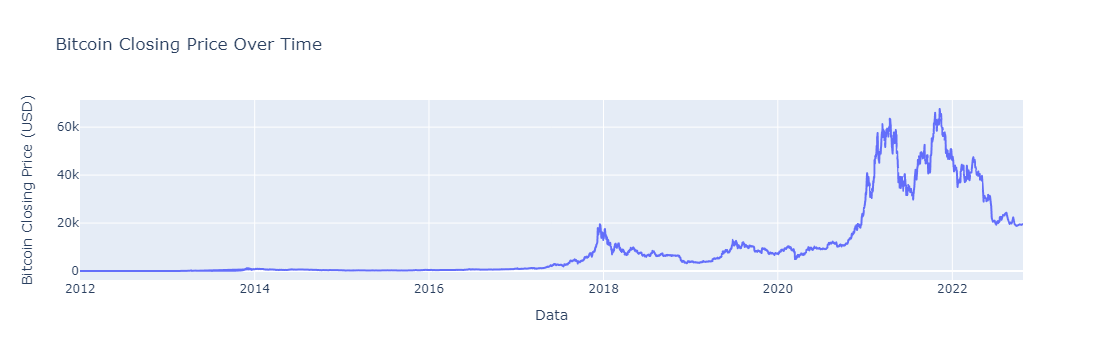

In [56]:
import plotly.express as px
import pandas as pd

# 
bitcoin_df = bitcoin_crypto_concat_df[bitcoin_crypto_concat_df['crypto_name'] == 'Bitcoin']

# Create an line graph
fig = px.line(bitcoin_df, x='Timestamp', y='Close', title='Bitcoin Closing Price Over Time')

# Personalize o layout do gráfico (opcional)
fig.update_xaxes(title_text='Data')
fig.update_yaxes(title_text='Bitcoin Closing Price (USD)')

# Create an interactive graph
fig.show()

### Bitcoin Closing Price Over Time

- **Initial Stability:** From the beginning of the chart until around 2017, Bitcoin's price was relatively stable, hovering around the lower end of the price spectrum.

- **Significant Increase:** There's a notable increase in price beginning around 2017, where Bitcoin's value starts to rise sharply.

- **Peak Value:** The graph shows that Bitcoin reached its peak value between late 2017 and early 2018, and then again around early 2021. These peaks appear to be the highest points on the graph, suggesting that Bitcoin reached its highest closing prices during these periods.

- **Volatility:** After each peak, there is significant volatility, with sharp rises and falls in the closing price of Bitcoin.

- **Recent Trend:** The most recent part of around 2022 tbly 2022, shows a downward trend, indicating a decrease in Bitcoin's closing price from previ

- **Prediction** Without access to additional context, such as news events or market changes, this analysis is purely based on the visual trends presented in the graph. For a detailed financial analysis, historical market data and context would be essential.us highs.


### Predictive Analysis Disclaimer

Please note that the analysis presented is based solely on the observable trendbased on historical price h and does not take into account additional market data, news events, or other external factors that could influencCryptocurrencyin's price. The insights offered here are for academic purposes within the scope of a postgraduate project and are not intended to predict actual cryptocurrency price movements. Due to the inherent volatility of cryptocurrency markets, any predictive models would necessitate a comprehensive approach that integrates a wide array of variables beyond just historical price trend


